# Adding Required Libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sb
import os 
from sklearn.impute import SimpleImputer
import warnings

# Uploading Dataset

In [2]:
df= pd.read_csv('zomato_restaurants_in_India.csv')

# Reading Dataset

In [3]:
df

res_id                            name      establishment  \
0        3400299                     Bikanervala    ['Quick Bites']   
1        3400005  Mama Chicken Mama Franky House    ['Quick Bites']   
2        3401013                   Bhagat Halwai    ['Quick Bites']   
3        3400290                   Bhagat Halwai    ['Quick Bites']   
4        3401744     The Salt Cafe Kitchen & Bar  ['Casual Dining']   
...          ...                             ...                ...   
211939   3202251  Kali Mirch Cafe And Restaurant  ['Casual Dining']   
211940   3200996                      Raju Omlet    ['Quick Bites']   
211941  18984164                The Grand Thakar  ['Casual Dining']   
211942   3201138                          Subway    ['Quick Bites']   
211943  18879846     Freshco's - The Health Cafe           ['Café']   

                                                      url  \
0       https://www.zomato.com/agra/bikanervala-khanda...   
1       https://www.zomato.com/agra/mama-chicken-mama-...   
2       https://www.zomato.com/agra/bhagat-halwai-2-sh...   
3       https://www.zomato.com/agra/bhagat-halwai-civi...   
4       https://www.zomato.com/agra/the-salt-cafe-kitc...   
...                                                   ...   
211939  https://www.zomato.com/vadodara/kali-mirch-caf...   
211940  https://www.zomato.com/vadodara/raju-omlet-kar...   
211941  https://www.zomato.com/vadodara/the-grand-thak...   
211942  https://www.zomato.com/vadodara/subway-1-akota...   
211943  https://www.zomato.com/vadodara/freshcos-the-h...   

                                                  address      city  city_id  \
0       Kalyani Point, Near Tulsi Cinema, Bypass Road,...      Agra       34   
1             Main Market, Sadar Bazaar, Agra Cantt, Agra      Agra       34   
2       62/1, Near Easy Day, West Shivaji Nagar, Goalp...      Agra       34   
3       Near Anjana Cinema, Nehru Nagar, Civil Lines, ...      Agra       34   
4             1C,3rd Floor, Fatehabad Road, Tajganj, Agra      Agra       34   
...                                                   ...       ...      ...   
211939  Manu Smriti Complex, Near Navrachna School, GI...  Vadodara       32   
211940  Mahalaxmi Apartment, Opposite B O B, Karoli Ba...  Vadodara       32   
211941  3rd Floor, Shreem Shalini Mall, Opposite Conqu...  Vadodara       32   
211942  G-2, Vedant Platina, Near Cosmos, Akota, Vadodara  Vadodara       32   
211943  Shop 7, Ground Floor, Opposite Natubhai Circle...  Vadodara       32   

           locality   latitude  longitude  ... price_range  currency  \
0          Khandari  27.211450  78.002381  ...           2       Rs.   
1        Agra Cantt  27.160569  78.011583  ...           2       Rs.   
2          Shahganj  27.182938  77.979684  ...           1       Rs.   
3       Civil Lines  27.205668  78.004799  ...           1       Rs.   
4           Tajganj  27.157709  78.052421  ...           3       Rs.   
...             ...        ...        ...  ...         ...       ...   
211939    Fatehgunj  22.336931  73.192356  ...           2       Rs.   
211940   Karelibaug  22.322455  73.197203  ...           1       Rs.   
211941     Alkapuri  22.310563  73.171163  ...           2       Rs.   
211942        Akota  22.270027  73.143068  ...           2       Rs.   
211943     Vadiwadi  22.309935  73.158768  ...           2       Rs.   

                                               highlights aggregate_rating  \
0       ['Lunch', 'Takeaway Available', 'Credit Card',...              4.4   
1       ['Delivery', 'No Alcohol Available', 'Dinner',...              4.4   
2       ['No Alcohol Available', 'Dinner', 'Takeaway A...              4.2   
3       ['Takeaway Available', 'Credit Card', 'Lunch',...              4.3   
4       ['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...              4.9   
...                                                   ...              ...   
211939  ['Dinner', 'Cash', 'Lunch', 'Delivery', 'Ind

# Dataset Preparation & Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211944 entries, 0 to 211943
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   res_id                211944 non-null  int64  
 1   name                  211944 non-null  object 
 2   establishment         211944 non-null  object 
 3   url                   211944 non-null  object 
 4   address               211810 non-null  object 
 5   city                  211944 non-null  object 
 6   city_id               211944 non-null  int64  
 7   locality              211944 non-null  object 
 8   latitude              211944 non-null  float64
 9   longitude             211944 non-null  float64
 10  zipcode               48757 non-null   object 
 11  country_id            211944 non-null  int64  
 12  locality_verbose      211944 non-null  object 
 13  cuisines              210553 non-null  object 
 14  timings               208070 non-null  object 
 15  

In [5]:
df.dtypes

res_id                    int64
name                     object
establishment            object
url                      object
address                  object
city                     object
city_id                   int64
locality                 object
latitude                float64
longitude               float64
zipcode                  object
country_id                int64
locality_verbose         object
cuisines                 object
timings                  object
average_cost_for_two      int64
price_range               int64
currency                 object
highlights               object
aggregate_rating        float64
rating_text              object
votes                     int64
photo_count               int64
opentable_support       float64
delivery                  int64
takeaway                  int64
dtype: object

In [6]:
df.head(10)

res_id                            name      establishment  \
0  3400299                     Bikanervala    ['Quick Bites']   
1  3400005  Mama Chicken Mama Franky House    ['Quick Bites']   
2  3401013                   Bhagat Halwai    ['Quick Bites']   
3  3400290                   Bhagat Halwai    ['Quick Bites']   
4  3401744     The Salt Cafe Kitchen & Bar  ['Casual Dining']   
5  3400275                  Domino's Pizza    ['Quick Bites']   
6  3400296             Honeydew Restaurant    ['Quick Bites']   
7  3400368                  Domino's Pizza    ['Quick Bites']   
8  3401284                      Cake House         ['Bakery']   
9  3400838                   Sugar N Thyme           ['Café']   

                                                 url  \
0  https://www.zomato.com/agra/bikanervala-khanda...   
1  https://www.zomato.com/agra/mama-chicken-mama-...   
2  https://www.zomato.com/agra/bhagat-halwai-2-sh...   
3  https://www.zomato.com/agra/bhagat-halwai-civi...   
4  https://www.zomato.com/agra/the-salt-cafe-kitc...   
5  https://www.zomato.com/agra/dominos-pizza-civi...   
6  https://www.zomato.com/agra/honeydew-restauran...   
7  https://www.zomato.com/agra/dominos-pizza-sika...   
8  https://www.zomato.com/agra/cake-house-2-civil...   
9  https://www.zomato.com/agra/sugar-n-thyme-tajg...   

                                             address  city  city_id  \
0  Kalyani Point, Near Tulsi Cinema, Bypass Road,...  Agra       34   
1        Main Market, Sadar Bazaar, Agra Cantt, Agra  Agra       34   
2  62/1, Near Easy Day, West Shivaji Nagar, Goalp...  Agra       34   
3  Near Anjana Cinema, Nehru Nagar, Civil Lines, ...  Agra       34   
4        1C,3rd Floor, Fatehabad Road, Tajganj, Agra  Agra       34   
5  114/23 G, Deep Shikha Complex, Sanjay Place, C...  Agra       34   
6       Opposite Soami Bagh Temple, Dayal Bagh, Agra  Agra       34   
7              Plot C-1/6, Sector 13, Sikandra, Agra  Agra       34   
8  23/301, Wazirpura Rd, Judge Compound Chowraha,...  Agra       34   
9  1374 K/1375 K, Ground floor, Dinesh Nagar, Fat...  Agra       34   

      locality   latitude  longitude  ... price_range  currency  \
0     Khandari  27.211450  78.002381  ...           2       Rs.   
1   Agra Cantt  27.160569  78.011583  ...           2       Rs.   
2     Shahganj  27.182938  77.979684  ...           1       Rs.   
3  Civil Lines  27.205668  78.004799  ...           1       Rs.   
4      Tajganj  27.157709  78.052421  ...           3       Rs.   
5  Civil Lines  27.201516  78.007556  ...           2       Rs.   
6   Dayal Bagh  27.222175  78.010174  ...           2       Rs.   
7     Sikandra  27.203930  77.954260  ...           2       Rs.   
8  Civil Lines  27.204148  78.009025  ...           2       Rs.   
9      Tajganj  27.158243  78.045591  ...           3       Rs.   

                                          highlights aggregate_rating  \
0  ['Lunch', 'Takeaway Available', 'Credit Card',...              4.4   
1  ['Delivery', 'No Alcohol Available', 'Dinner',...              4.4   
2  ['No Alcohol Available', 'Dinner', 'Takeaway A...              4.2   
3  ['Takeaway Available', 'Credit Card', 'Lunch',...              4.3   
4  ['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...              4.9   
5  ['Credit Card', 'Lunch', 'Delivery', 'Dinner',...              4.0   
6  ['Dinner', 'Delivery', 'Lunch', 'Cash', 'Takea...              4.2   
7  ['Lunch', 'Delivery', 'Credit Card', 'No Alcoh...              3.8   
8  ['Takeaway Available', 'Cash', 'Indoor Seating...              3.4   
9  ['No Alcohol Available', 'Dinner', 'Delivery',...              4.4   

  rating_text  votes  photo_count opentable_support delivery  takeaway  
0   Very Good    814          154               0.0       -1        -1  
1   Very Good   1203          161               0.0       -1        -1  
2   Very Good    801          107               0.0        1        -1  
3   Very Good    693          157               0.0    

In [7]:
df.tail(5)

res_id                            name      establishment  \
211939   3202251  Kali Mirch Cafe And Restaurant  ['Casual Dining']   
211940   3200996                      Raju Omlet    ['Quick Bites']   
211941  18984164                The Grand Thakar  ['Casual Dining']   
211942   3201138                          Subway    ['Quick Bites']   
211943  18879846     Freshco's - The Health Cafe           ['Café']   

                                                      url  \
211939  https://www.zomato.com/vadodara/kali-mirch-caf...   
211940  https://www.zomato.com/vadodara/raju-omlet-kar...   
211941  https://www.zomato.com/vadodara/the-grand-thak...   
211942  https://www.zomato.com/vadodara/subway-1-akota...   
211943  https://www.zomato.com/vadodara/freshcos-the-h...   

                                                  address      city  city_id  \
211939  Manu Smriti Complex, Near Navrachna School, GI...  Vadodara       32   
211940  Mahalaxmi Apartment, Opposite B O B, Karoli Ba...  Vadodara       32   
211941  3rd Floor, Shreem Shalini Mall, Opposite Conqu...  Vadodara       32   
211942  G-2, Vedant Platina, Near Cosmos, Akota, Vadodara  Vadodara       32   
211943  Shop 7, Ground Floor, Opposite Natubhai Circle...  Vadodara       32   

          locality   latitude  longitude  ... price_range  currency  \
211939   Fatehgunj  22.336931  73.192356  ...           2       Rs.   
211940  Karelibaug  22.322455  73.197203  ...           1       Rs.   
211941    Alkapuri  22.310563  73.171163  ...           2       Rs.   
211942       Akota  22.270027  73.143068  ...           2       Rs.   
211943    Vadiwadi  22.309935  73.158768  ...           2       Rs.   

                                               highlights aggregate_rating  \
211939  ['Dinner', 'Cash', 'Lunch', 'Delivery', 'Indoo...              4.1   
211940  ['Dinner', 'Cash', 'Takeaway Available', 'Debi...              4.1   
211941  ['Dinner', 'Cash', 'Debit Card', 'Lunch', 'Tak...              4.0   
211942  ['Dinner', 'Delivery', 'Credit Card', 'Lunch',...              3.7   
211943  ['Dinner', 'Cash', 'Takeaway Available', 'Debi...              4.0   

       rating_text  votes  photo_count opentable_support delivery  takeaway  
211939   Very Good    243           40               0.0       -1        -1  
211940   Very Good    187           40               0.0        1        -1  
211941   Very Good    111           38               0.0       -1        -1  
211942        Good    128           34               0.0        1        -1  
211943   Very Good     93           53               0.0        1        -1  

[5 rows x 26 columns]

In [8]:
df.isnull()

res_id   name  establishment    url  address   city  city_id  \
0        False  False          False  False    False  False    False   
1        False  False          False  False    False  False    False   
2        False  False          False  False    False  False    False   
3        False  False          False  False    False  False    False   
4        False  False          False  False    False  False    False   
...        ...    ...            ...    ...      ...    ...      ...   
211939   False  False          False  False    False  False    False   
211940   False  False          False  False    False  False    False   
211941   False  False          False  False    False  False    False   
211942   False  False          False  False    False  False    False   
211943   False  False          False  False    False  False    False   

        locality  latitude  longitude  ...  price_range  currency  highlights  \
0          False     False      False  ...        False     False       False   
1          False     False      False  ...        False     False       False   
2          False     False      False  ...        False     False       False   
3          False     False      False  ...        False     False       False   
4          False     False      False  ...        False     False       False   
...          ...       ...        ...  ...          ...       ...         ...   
211939     False     False      False  ...        False     False       False   
211940     False     False      False  ...        False     False       False   
211941     False     False      False  ...        False     False       False   
211942     False     False      False  ...        False     False       False   
211943     False     False      False  ...        False     False       False   

        aggregate_rating  rating_text  votes  photo_count  opentable_support  \
0                  False        False  False        False              False   
1                  False        False  False        False              False   
2                  False        False  False        False              False   
3                  False        False  False        False              False   
4                  False        False  False        False              False   
...                  ...          ...    ...          ...                ...   
211939             False        False  False        False              False   
211940             False        False  False        False              False   
211941             False        False  False        False              False   
211942             False        False  False        False              False   
211943             False        False  False        False              False   

        delivery  takeaway  
0          False     False  
1          False     False  
2          False     False  
3          False     False  
4          False     False  
...          ...       ...  
211939     False     False  
211940     False     False  
211941     False     False  
211942     False     False  
211943     False     False  

[211944 rows x 26 columns]

Handling Duplicates

In [7]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
211939     True
211940    False
211941     True
211942    False
211943     True
Length: 211944, dtype: bool

In [8]:
df.duplicated().sum()

151527

In [9]:
df=df.drop_duplicates()

In [10]:
df

res_id                            name        establishment  \
0        3400299                     Bikanervala      ['Quick Bites']   
1        3400005  Mama Chicken Mama Franky House      ['Quick Bites']   
2        3401013                   Bhagat Halwai      ['Quick Bites']   
3        3400290                   Bhagat Halwai      ['Quick Bites']   
4        3401744     The Salt Cafe Kitchen & Bar    ['Casual Dining']   
...          ...                             ...                  ...   
211882  19142822           Shree Janta Ice Cream  ['Dessert Parlour']   
211925  18984164                The Grand Thakar    ['Casual Dining']   
211926  18019952                     Geeta lodge    ['Casual Dining']   
211940   3200996                      Raju Omlet      ['Quick Bites']   
211942   3201138                          Subway      ['Quick Bites']   

                                                      url  \
0       https://www.zomato.com/agra/bikanervala-khanda...   
1       https://www.zomato.com/agra/mama-chicken-mama-...   
2       https://www.zomato.com/agra/bhagat-halwai-2-sh...   
3       https://www.zomato.com/agra/bhagat-halwai-civi...   
4       https://www.zomato.com/agra/the-salt-cafe-kitc...   
...                                                   ...   
211882  https://www.zomato.com/vadodara/shree-janta-ic...   
211925  https://www.zomato.com/vadodara/the-grand-thak...   
211926  https://www.zomato.com/vadodara/geeta-lodge-al...   
211940  https://www.zomato.com/vadodara/raju-omlet-kar...   
211942  https://www.zomato.com/vadodara/subway-1-akota...   

                                                  address      city  city_id  \
0       Kalyani Point, Near Tulsi Cinema, Bypass Road,...      Agra       34   
1             Main Market, Sadar Bazaar, Agra Cantt, Agra      Agra       34   
2       62/1, Near Easy Day, West Shivaji Nagar, Goalp...      Agra       34   
3       Near Anjana Cinema, Nehru Nagar, Civil Lines, ...      Agra       34   
4             1C,3rd Floor, Fatehabad Road, Tajganj, Agra      Agra       34   
...                                                   ...       ...      ...   
211882  Ground Floor, 5 Ronak Plaza, Tulsidham Char Ra...  Vadodara       32   
211925  3rd Floor, Shreem Shalini Mall, Opposite Conqu...  Vadodara       32   
211926  Shop 11, Ground Floor, Atlantis K-10, Tower A,...  Vadodara       32   
211940  Mahalaxmi Apartment, Opposite B O B, Karoli Ba...  Vadodara       32   
211942  G-2, Vedant Platina, Near Cosmos, Akota, Vadodara  Vadodara       32   

           locality   latitude  longitude  ... price_range  currency  \
0          Khandari  27.211450  78.002381  ...           2       Rs.   
1        Agra Cantt  27.160569  78.011583  ...           2       Rs.   
2          Shahganj  27.182938  77.979684  ...           1       Rs.   
3       Civil Lines  27.205668  78.004799  ...           1       Rs.   
4           Tajganj  27.157709  78.052421  ...           3       Rs.   
...             ...        ...        ...  ...         ...       ...   
211882    Manjalpur  22.270516  73.196408  ...           1       Rs.   
211925     Alkapuri  22.310563  73.171163  ...           2       Rs.   
211926     Alkapuri  22.317731  73.168107  ...           1       Rs.   
211940   Karelibaug  22.322455  73.197203  ...           1       Rs.   
211942        Akota  22.270027  73.143068  ...           2       Rs.   

                                               highlights aggregate_rating  \
0       ['Lunch', 'Takeaway Available', 'Credit Card',...              4.4   
1       ['Delivery', 'No Alcohol Available', 'Dinner',...              4.4   
2       ['No Alcohol Available', 'Dinner', 'Takeaway A...              4.2   
3       ['Takeaway Available', 'Credit Card', 'Lunch',...              4.3   
4       ['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...              4.9   
...                                                   ...              ...   
211882  ['Cash', 'Takeaway A

Handlin Nulls or Missing Values

In [11]:
df.isnull().sum()

res_id                      0
name                        0
establishment               0
url                         0
address                    18
city                        0
city_id                     0
locality                    0
latitude                    0
longitude                   0
zipcode                 47869
country_id                  0
locality_verbose            0
cuisines                  470
timings                  1070
average_cost_for_two        0
price_range                 0
currency                    0
highlights                  0
aggregate_rating            0
rating_text                 0
votes                       0
photo_count                 0
opentable_support          19
delivery                    0
takeaway                    0
dtype: int64

In [12]:
pdf= df.copy()

In [13]:
df['zipcode'].fillna('Not available', inplace=True)

C:\Users\falak\AppData\Local\Temp\ipykernel_8240\3897006663.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['zipcode'].fillna('Not available', inplace=True)


In [14]:
import warnings
warnings.filterwarnings("ignore")


In [15]:
df['zipcode'].fillna('Not available', inplace=True)

In [16]:
df['address'].fillna('Not available', inplace=True)

In [17]:
df['cuisines'].fillna('Unknown', inplace=True)

In [18]:
df['timings'].fillna('Not Mentioned', inplace=True)

In [19]:
df['opentable_support'].fillna(0, inplace=True)

In [20]:
missing_values_after = df.isnull().sum()
print("\nMissing Values After Handling:\n", missing_values_after)


Missing Values After Handling:
 res_id                  0
name                    0
establishment           0
url                     0
address                 0
city                    0
city_id                 0
locality                0
latitude                0
longitude               0
zipcode                 0
country_id              0
locality_verbose        0
cuisines                0
timings                 0
average_cost_for_two    0
price_range             0
currency                0
highlights              0
aggregate_rating        0
rating_text             0
votes                   0
photo_count             0
opentable_support       0
delivery                0
takeaway                0
dtype: int64


In [21]:
df.columns.str.strip()

Index(['res_id', 'name', 'establishment', 'url', 'address', 'city', 'city_id',
       'locality', 'latitude', 'longitude', 'zipcode', 'country_id',
       'locality_verbose', 'cuisines', 'timings', 'average_cost_for_two',
       'price_range', 'currency', 'highlights', 'aggregate_rating',
       'rating_text', 'votes', 'photo_count', 'opentable_support', 'delivery',
       'takeaway'],
      dtype='object')

In [22]:
df.establishment.unique()

array(["['Quick Bites']", "['Casual Dining']", "['Bakery']", "['Café']",
       "['Dhaba']", "['Bhojanalya']", "['Bar']", "['Sweet Shop']",
       "['Fine Dining']", "['Food Truck']", "['Dessert Parlour']",
       "['Lounge']", "['Pub']", "['Beverage Shop']", "['Kiosk']",
       "['Paan Shop']", "['Confectionery']", '[]', "['Shack']",
       "['Club']", "['Food Court']", "['Mess']", "['Butcher Shop']",
       "['Microbrewery']", "['Cocktail Bar']", "['Pop up']",
       "['Irani Cafe']"], dtype=object)

In [23]:
df['establishment'] = df['establishment'].str.replace('[', '').str.replace(']', '').str.replace("''", "").str.replace("'", '')
df['establishment']

0             Quick Bites
1             Quick Bites
2             Quick Bites
3             Quick Bites
4           Casual Dining
               ...       
211882    Dessert Parlour
211925      Casual Dining
211926      Casual Dining
211940        Quick Bites
211942        Quick Bites
Name: establishment, Length: 60417, dtype: object

In [24]:
df['rating_text'].unique()

array(['Very Good', 'Excellent', 'Good', 'Average', 'Not rated', 'Poor',
       'Dobré', 'Baik', 'Sangat Baik', 'Excelente', 'Bardzo dobrze',
       'Wybitnie', 'Ottimo', 'Muito Bom', 'Velmi dobré', 'Skvělá volba',
       'Muy Bueno', 'Bom', 'İyi', 'Çok iyi', 'Harika', 'Terbaik',
       'Skvělé', 'Průměr', 'Ortalama', 'Bueno', 'Eccellente', 'Muito bom',
       'Dobrze', 'Buono', 'Média', 'Scarso', 'Promedio', 'Veľmi dobré',
       'Vynikajúce', 'Średnio', 'Priemer', 'Biasa', 'Media'], dtype=object)

In [25]:
df['rating_text'] = df['rating_text'].replace ('Dobré', 'Good').replace ('Baik', 'Good').replace('Sangat Baik', 'Very Good').replace('Sangat Baik', 'Very Good').replace('Excelente', 'Excellent').replace('Bardzo dobrze', 'Very Good').replace('Wybitnie', 'Remarkably').replace('Ottimo', 'Very Good').replace('Muito Bom', 'Very Good').replace('Velmi dobré', 'Very Good').replace('Skvělá volba', 'Good').replace('Muy Bueno', 'Very Good').replace('Bom', 'Good').replace('İyi', 'Good').replace('Çok iyi', 'Very Good').replace('Harika', 'Excellent').replace('Terbaik', 'Good').replace('Skvělé', 'Excellent').replace('Průměr', 'Average').replace('Ortalama', 'Average').replace('Bueno', 'Good').replace('Eccellente', 'Excellent').replace('Muito bom', 'Very Good').replace('Dobrze', 'Very Good').replace('Buono', 'Good').replace('Média', 'Average').replace('Scarso', 'Poor').replace('Promedio', 'Average').replace('Veľmi dobré', 'Very Good').replace('Vynikajúce', 'Excellent').replace('Średnio', 'Average').replace('Priemer', 'Very Good').replace('Biasa', 'Average').replace('Media', 'Average')
#convert all other languages into english language for better understanding of rating. 

In [26]:
df['rating_text'].unique()

array(['Very Good', 'Excellent', 'Good', 'Average', 'Not rated', 'Poor',
       'Remarkably'], dtype=object)

# Feature Engineering

In [27]:
categorical_columns = df.select_dtypes(include=['object']).columns

print(categorical_columns)

Index(['name', 'establishment', 'url', 'address', 'city', 'locality',
       'zipcode', 'locality_verbose', 'cuisines', 'timings', 'currency',
       'highlights', 'rating_text'],
      dtype='object')


In [28]:
df.timings.unique()

array(['8:30am – 10:30pm (Mon-Sun)',
       '12:30PM to 12Midnight (Mon, Wed, Thu, Fri, Sat, Sun), 1PM to 12Midnight (Tue)',
       '9:30 AM to 11 PM', ..., '8am – 2:30pm, 5pm – 10pm (Mon-Sun)',
       '8am – 3pm, 6:30pm – 11pm (Mon-Sun)',
       '4pm – 11pm (Mon, Tue, Wed, Fri, Sat, Sun), 4pm – 11:30pm (Thu)'],
      dtype=object)

In [148]:
pdf.columns

Index(['res_id', 'name', 'establishment', 'url', 'address', 'city', 'city_id',
       'locality', 'latitude', 'longitude', 'zipcode', 'country_id',
       'locality_verbose', 'cuisines', 'timings', 'average_cost_for_two',
       'price_range', 'currency', 'highlights', 'aggregate_rating',
       'rating_text', 'votes', 'photo_count', 'opentable_support', 'delivery',
       'takeaway'],
      dtype='object')

In [152]:
def extract_hours(timing):
    if isinstance(timing, str):  # Check if timing is already a string
        pattern = r'(\d{1,2}:\d{2})'
        hours = re.findall(pattern, timing)
        if hours:
            return hours[0], hours[-1]
    return None, None

# Your DataFrame manipulation
# Assuming 'df' is your DataFrame and it contains a column named 'timings'

# Convert float values to strings in the 'timings' column
pdf['timings'] = pdf['timings'].astype(str)

# Applying the extract_hours function to the 'timings' column
pdf['opening_hour'], pdf['closing_hour'] = zip(*pdf['timings'].apply(extract_hours))

# Limiting the output to the first 100 rows
limited_df = pdf[['timings', 'opening_hour', 'closing_hour']].head(10)

# Displaying the resulting limited DataFrame with the extracted hours
print(tabulate(limited_df, headers='keys', tablefmt='grid'))

+----+-------------------------------------------------------------------------------------+----------------+----------------+
|    | timings                                                                             | opening_hour   | closing_hour   |
+====+=====================================================================================+================+================+
|  0 | 8:30am – 10:30pm (Mon-Sun)                                                          | 8:30           | 10:30          |
+----+-------------------------------------------------------------------------------------+----------------+----------------+
|  1 | 12:30PM to 12Midnight (Mon, Wed, Thu, Fri, Sat, Sun), 1PM to 12Midnight (Tue)       | 12:30          | 12:30          |
+----+-------------------------------------------------------------------------------------+----------------+----------------+
|  2 | 9:30 AM to 11 PM                                                                    | 9:30           | 9

In [140]:
import re
from tabulate import tabulate

In [142]:
# Your extract_days function
def extract_days(timing):
    pattern = r'\((.*?)\)'
    match = re.findall(pattern, timing)
    if match:
        return match[0].replace(',', '').strip()
    else:
        return None

# Your DataFrame manipulation
# Assuming 'df' is your DataFrame and it contains a column named 'timings'

# Applying the extract_days function to the 'timings' column
df['working_days'] = df['timings'].apply(extract_days)

# Limiting the output to the first 100 rows
limited_df = df[['timings', 'working_days']].head(100)

# Displaying the resulting limited DataFrame with the extracted days
print(tabulate(limited_df, headers='keys', tablefmt='grid'))


+----+-------------------------------------------------------------------------------------+-------------------------+
|    | timings                                                                             | working_days            |
+====+=====================================================================================+=========================+
|  0 | 8:30am – 10:30pm (Mon-Sun)                                                          | Mon-Sun                 |
+----+-------------------------------------------------------------------------------------+-------------------------+
|  1 | 12:30PM to 12Midnight (Mon, Wed, Thu, Fri, Sat, Sun), 1PM to 12Midnight (Tue)       | Mon Wed Thu Fri Sat Sun |
+----+-------------------------------------------------------------------------------------+-------------------------+
|  2 | 9:30 AM to 11 PM                                                                    |                         |
+----+------------------------------------------

In [143]:
# Drop the old 'timings' column
df.drop(columns=['timings'], inplace=True)


#                 EDA                                                                                                    

In [32]:
# Descriptive statistics for numerical column
df.describe()

res_id       city_id      latitude     longitude  country_id  \
count  6.041700e+04  60417.000000  60417.000000  60417.000000     60417.0   
mean   1.309335e+07   3418.302183     21.349431     76.588040         1.0   
std    8.132809e+06   5179.351720     41.187998     10.600514         0.0   
min    5.000000e+01      1.000000      0.000000      0.000000         1.0   
25%    3.000488e+06      7.000000     16.324755     74.654029         1.0   
50%    1.869150e+07     26.000000     22.320884     77.135310         1.0   
75%    1.886666e+07  11295.000000     26.744389     79.928190         1.0   
max    1.915979e+07  11354.000000  10000.000000     91.832769         1.0   

       average_cost_for_two   price_range  aggregate_rating         votes  \
count          60417.000000  60417.000000      60417.000000  60417.000000   
mean             538.304517      1.730821          3.032868    261.574888   
std              593.852227      0.880462          1.440751    728.284194   
min                0.000000      1.000000          0.000000    -18.000000   
25%              200.000000      1.000000          2.900000      7.000000   
50%              400.000000      1.000000          3.500000     42.000000   
75%              600.000000      2.000000          4.000000    207.000000   
max            30000.000000      4.000000          4.900000  42539.000000   

        photo_count  opentable_support      delivery  takeaway  
count  60417.000000            60417.0  60417.000000   60417.0  
mean     194.247414                0.0     -0.371799      -1.0  
std      705.682451                0.0      0.925249       0.0  
min        0.000000                0.0     -1.000000      -1.0  
25%        1.000000                0.0     -1.000000      -1.0  
50%       11.000000                0.0     -1.000000      -1.0  
75%       82.000000                0.0      1.000000      -1.0  
max    17702.000000                0.0      1.000000      -1.0

Central Tendency Measures for Numerical Columns

In [35]:
# Calculate mean for numerical columns
numerical_means = df.select_dtypes(include='number').mean()
print("Mean:")
print(numerical_means)

Mean:
res_id                  1.309335e+07
city_id                 3.418302e+03
latitude                2.134943e+01
longitude               7.658804e+01
country_id              1.000000e+00
average_cost_for_two    5.383045e+02
price_range             1.730821e+00
aggregate_rating        3.032868e+00
votes                   2.615749e+02
photo_count             1.942474e+02
opentable_support       0.000000e+00
delivery               -3.717993e-01
takeaway               -1.000000e+00
dtype: float64


In [36]:
# Calculate median for numerical columns
numerical_medians = df.select_dtypes(include='number').median()
print("Median:")
print(numerical_medians)


Median:
res_id                  1.869150e+07
city_id                 2.600000e+01
latitude                2.232088e+01
longitude               7.713531e+01
country_id              1.000000e+00
average_cost_for_two    4.000000e+02
price_range             1.000000e+00
aggregate_rating        3.500000e+00
votes                   4.200000e+01
photo_count             1.100000e+01
opentable_support       0.000000e+00
delivery               -1.000000e+00
takeaway               -1.000000e+00
dtype: float64


In [37]:
# Calculate mode for numerical columns
numerical_modes = df.select_dtypes(include='number').mode()
print("Mode:")
print(numerical_modes)

Mode:
     res_id  city_id  latitude  longitude  country_id  average_cost_for_two  \
0  18453954        3       0.0        0.0           1                   200   

   price_range  aggregate_rating  votes  photo_count  opentable_support  \
0            1               0.0      0            0                0.0   

   delivery  takeaway  
0        -1        -1  


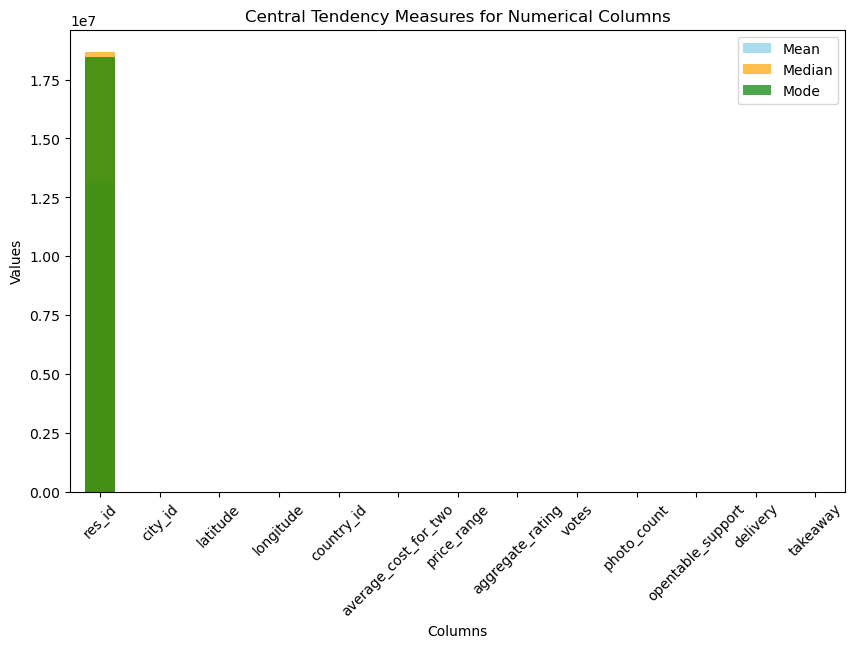

In [38]:
import matplotlib.pyplot as plt

# Calculate central tendency measures for numerical columns
numerical_means = df.select_dtypes(include='number').mean()
numerical_medians = df.select_dtypes(include='number').median()
numerical_modes = df.select_dtypes(include='number').mode()

# Plot bar charts for central tendency measures
plt.figure(figsize=(10, 6))
numerical_means.plot(kind='bar', color='skyblue', alpha=0.7, label='Mean')
numerical_medians.plot(kind='bar', color='orange', alpha=0.7, label='Median')
numerical_modes.iloc[0].plot(kind='bar', color='green', alpha=0.7, label='Mode')
plt.title('Central Tendency Measures for Numerical Columns')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.legend()
plt.xticks(rotation=45)
plt.show()


Dispersion Measures for Numerical Columns:

In [39]:
import numpy as np

# Calculate range for numerical columns
numerical_range = df.select_dtypes(include='number').max() - df.select_dtypes(include='number').min()
print("Range:")
print(numerical_range)


Range:
res_id                  1.915974e+07
city_id                 1.135300e+04
latitude                1.000000e+04
longitude               9.183277e+01
country_id              0.000000e+00
average_cost_for_two    3.000000e+04
price_range             3.000000e+00
aggregate_rating        4.900000e+00
votes                   4.255700e+04
photo_count             1.770200e+04
opentable_support       0.000000e+00
delivery                2.000000e+00
takeaway                0.000000e+00
dtype: float64


In [40]:
# Calculate variance for numerical columns
numerical_variance = df.select_dtypes(include='number').var()
print("Variance:")
print(numerical_variance)

Variance:
res_id                  6.614258e+13
city_id                 2.682568e+07
latitude                1.696451e+03
longitude               1.123709e+02
country_id              0.000000e+00
average_cost_for_two    3.526605e+05
price_range             7.752142e-01
aggregate_rating        2.075765e+00
votes                   5.303979e+05
photo_count             4.979877e+05
opentable_support       0.000000e+00
delivery                8.560857e-01
takeaway                0.000000e+00
dtype: float64


In [41]:
# Calculate standard deviation for numerical columns
numerical_std = df.select_dtypes(include='number').std()
print("Standard Deviation:")
print(numerical_std)


Standard Deviation:
res_id                  8.132809e+06
city_id                 5.179352e+03
latitude                4.118800e+01
longitude               1.060051e+01
country_id              0.000000e+00
average_cost_for_two    5.938522e+02
price_range             8.804625e-01
aggregate_rating        1.440751e+00
votes                   7.282842e+02
photo_count             7.056825e+02
opentable_support       0.000000e+00
delivery                9.252490e-01
takeaway                0.000000e+00
dtype: float64


In [42]:
# Calculate interquartile range (IQR) for numerical columns
numerical_iqr = df.select_dtypes(include='number').apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
print("\nInterquartile Range (IQR):")
print(numerical_iqr)


Interquartile Range (IQR):
res_id                  1.586617e+07
city_id                 1.128800e+04
latitude                1.041963e+01
longitude               5.274161e+00
country_id              0.000000e+00
average_cost_for_two    4.000000e+02
price_range             1.000000e+00
aggregate_rating        1.100000e+00
votes                   2.000000e+02
photo_count             8.100000e+01
opentable_support       0.000000e+00
delivery                2.000000e+00
takeaway                0.000000e+00
dtype: float64


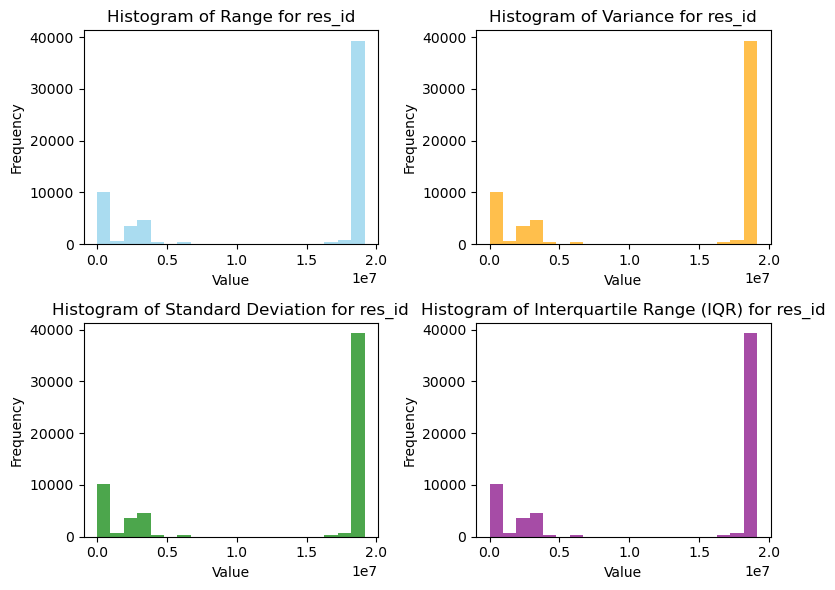

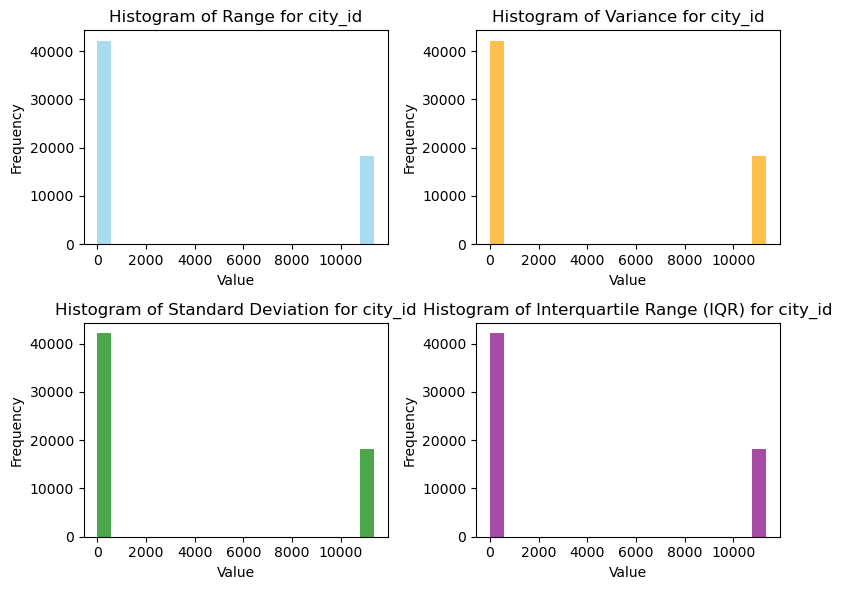

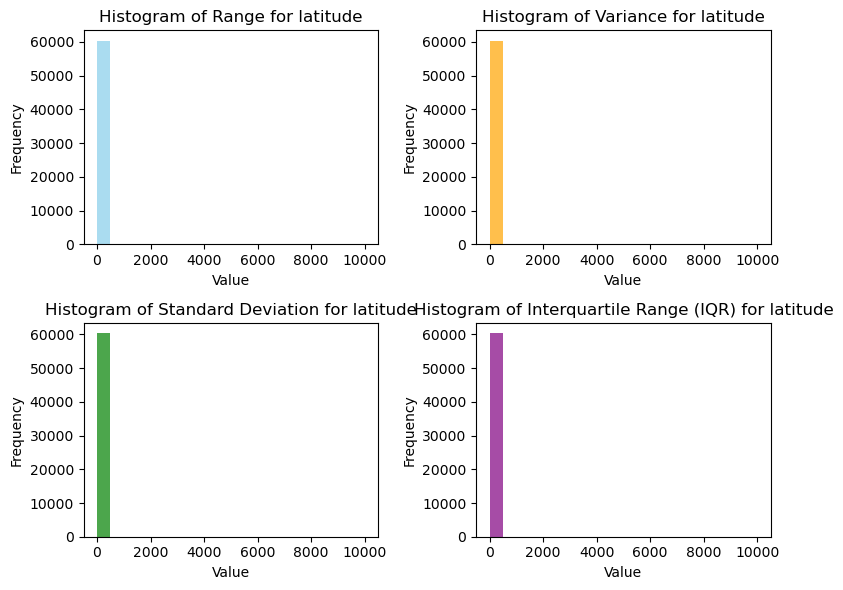

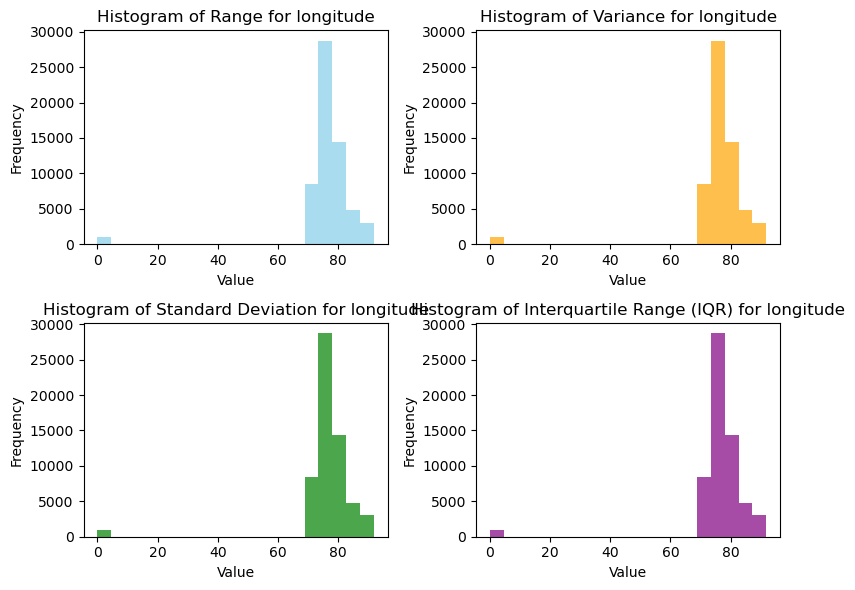

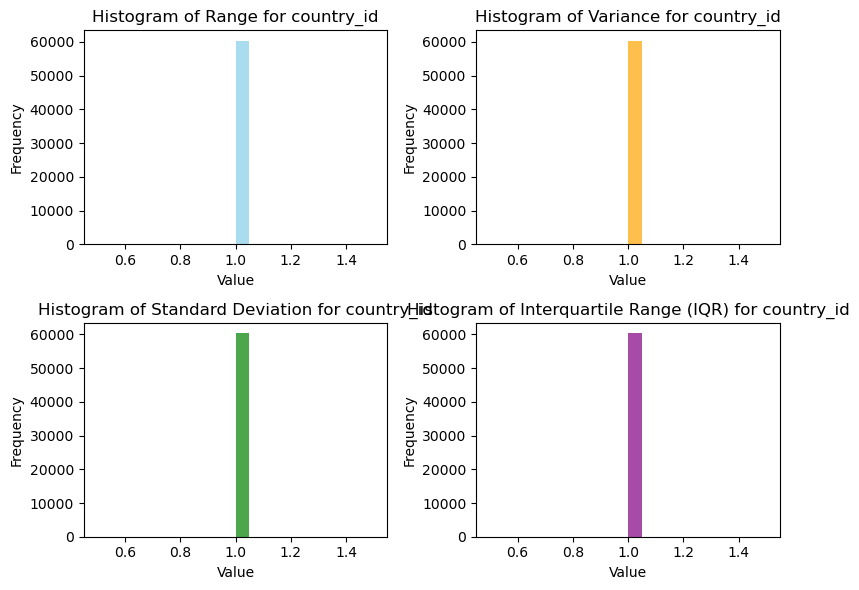

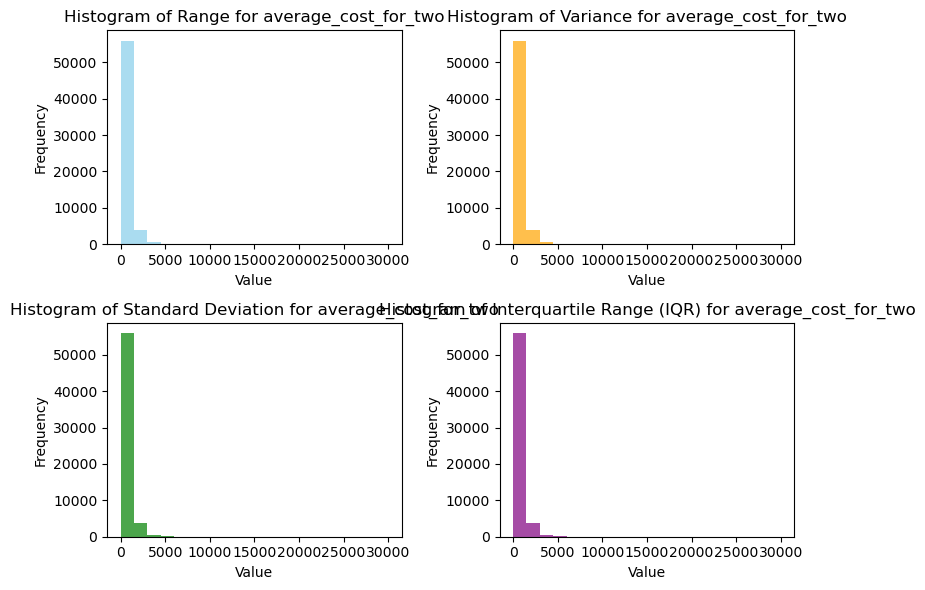

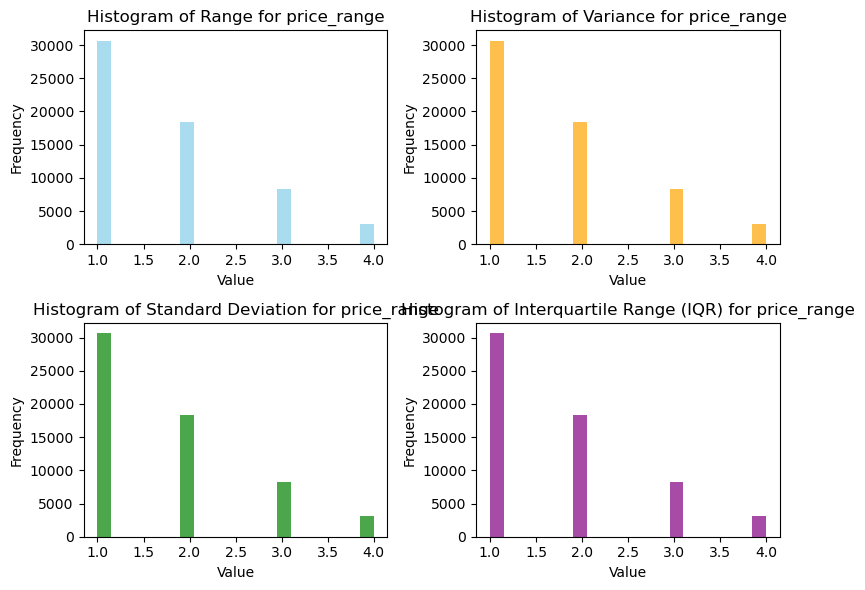

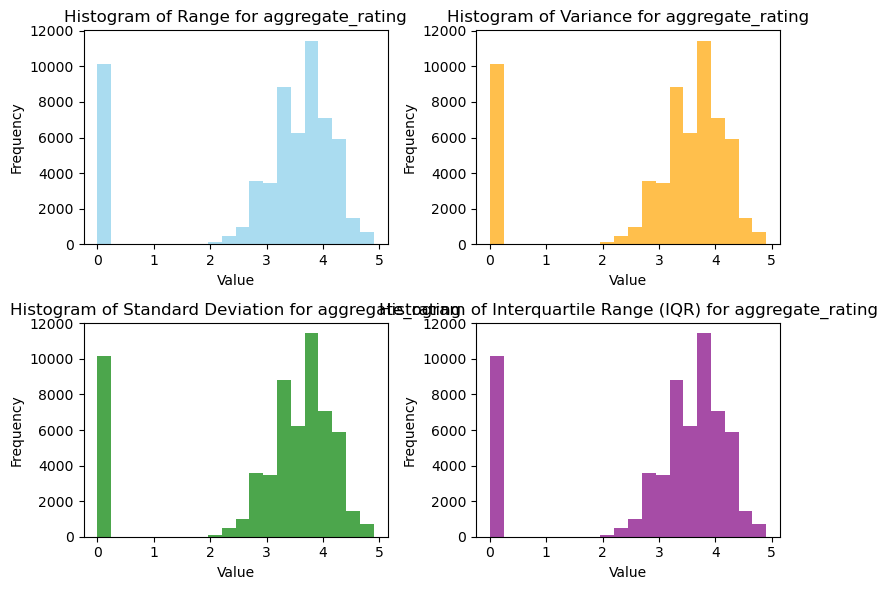

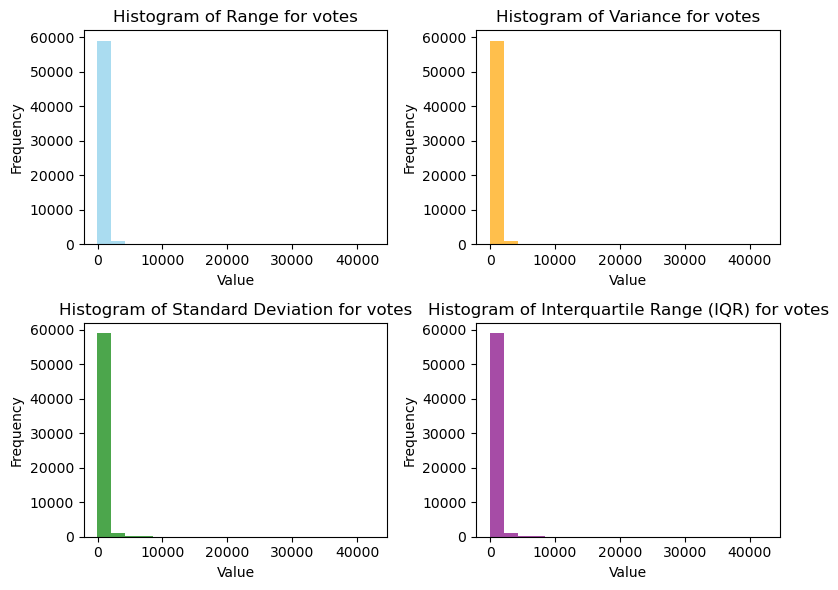

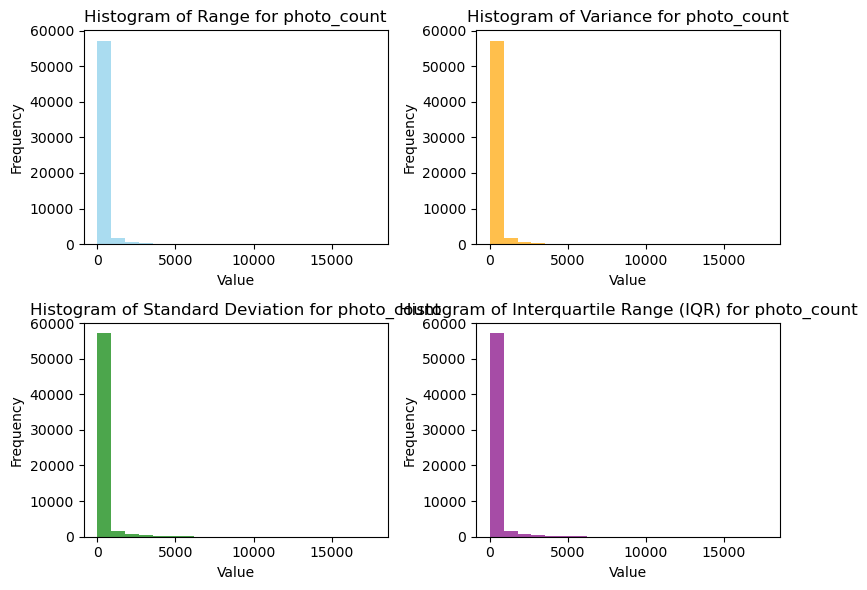

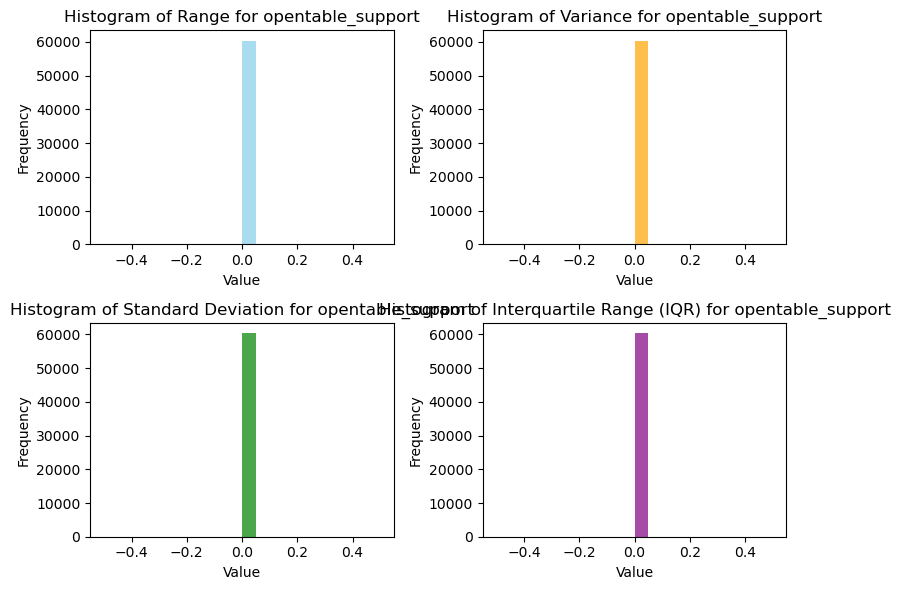

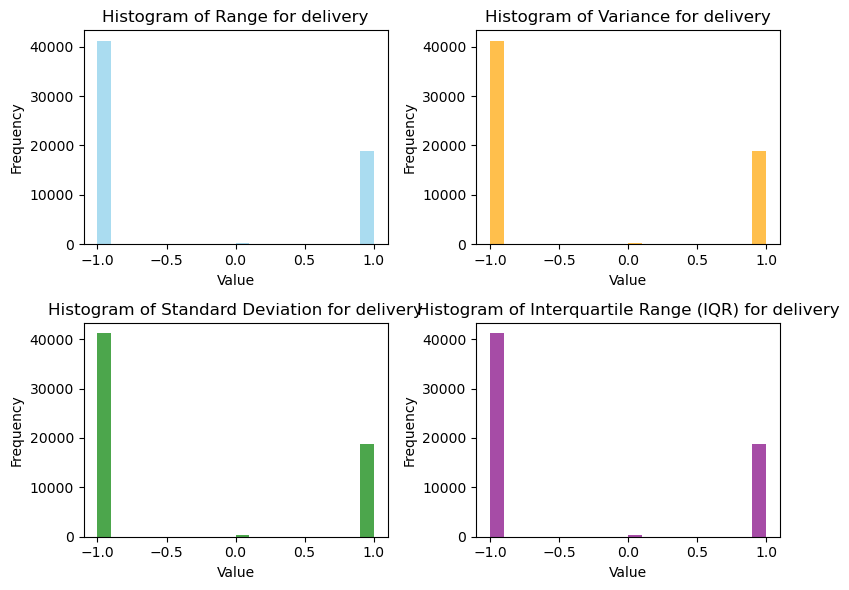

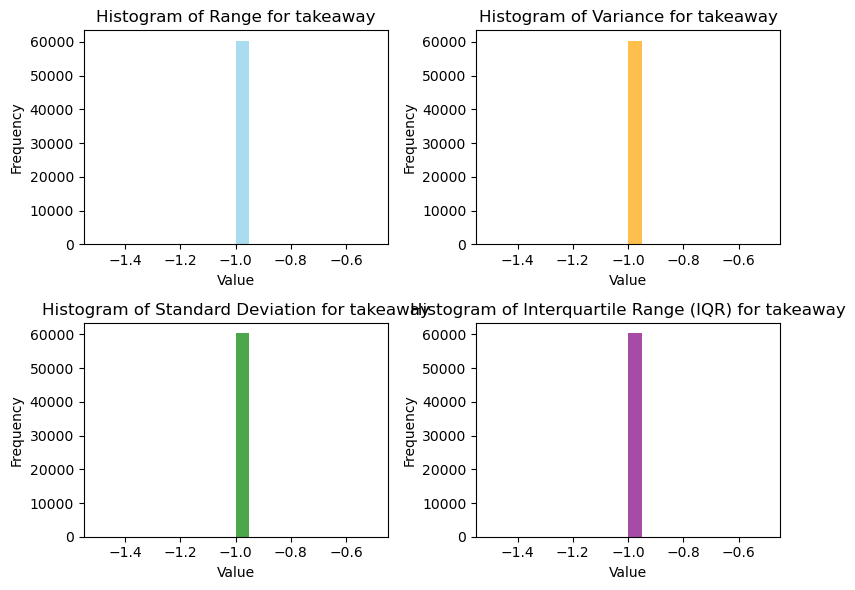

In [43]:
# Creating Visuals 
# Calculate dispersion measures for numerical columns
numerical_columns = df.select_dtypes(include='number').columns
numerical_range = df.select_dtypes(include='number').max() - df.select_dtypes(include='number').min()
numerical_variance = df.select_dtypes(include='number').var()
numerical_std = df.select_dtypes(include='number').std()
numerical_iqr = df.select_dtypes(include='number').apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))

# Plot histograms for dispersion measures
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    
    # Histogram for range
    plt.subplot(2, 2, 1)
    plt.hist(df[column], bins=20, color='skyblue', alpha=0.7)
    plt.title(f'Histogram of Range for {column}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    
    # Histogram for variance
    plt.subplot(2, 2, 2)
    plt.hist(df[column], bins=20, color='orange', alpha=0.7)
    plt.title(f'Histogram of Variance for {column}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    
    # Histogram for standard deviation
    plt.subplot(2, 2, 3)
    plt.hist(df[column], bins=20, color='green', alpha=0.7)
    plt.title(f'Histogram of Standard Deviation for {column}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    
    # Histogram for interquartile range (IQR)
    plt.subplot(2, 2, 4)
    plt.hist(df[column], bins=20, color='purple', alpha=0.7)
    plt.title(f'Histogram of Interquartile Range (IQR) for {column}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()




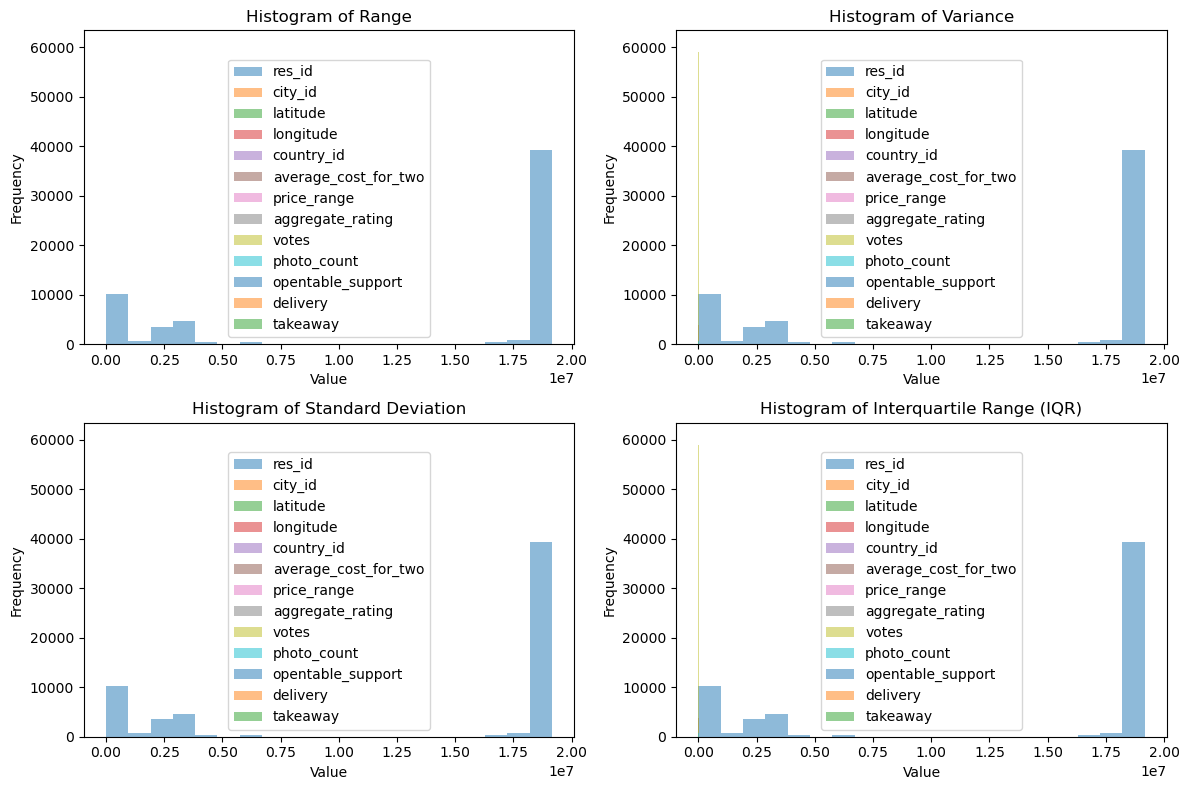

In [44]:
# Calculate dispersion measures for numerical columns
numerical_columns = df.select_dtypes(include='number').columns
numerical_range = df.select_dtypes(include='number').max() - df.select_dtypes(include='number').min()
numerical_variance = df.select_dtypes(include='number').var()
numerical_std = df.select_dtypes(include='number').std()
numerical_iqr = df.select_dtypes(include='number').apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))

# Plot histograms for dispersion measures
plt.figure(figsize=(12, 8))

# Subplot for range
plt.subplot(2, 2, 1)
for column in numerical_columns:
    plt.hist(df[column], bins=20, alpha=0.5, label=column)
plt.title('Histogram of Range')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()

# Subplot for variance
plt.subplot(2, 2, 2)
for column in numerical_columns:
    plt.hist(df[column], bins=20, alpha=0.5, label=column)
plt.title('Histogram of Variance')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()

# Subplot for standard deviation
plt.subplot(2, 2, 3)
for column in numerical_columns:
    plt.hist(df[column], bins=20, alpha=0.5, label=column)
plt.title('Histogram of Standard Deviation')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()

# Subplot for interquartile range (IQR)
plt.subplot(2, 2, 4)
for column in numerical_columns:
    plt.hist(df[column], bins=20, alpha=0.5, label=column)
plt.title('Histogram of Interquartile Range (IQR)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()



Frequency of categorical columns through value counts

In [45]:
 categorical_counts = {}
for column in df.select_dtypes(include='object').columns:
    categorical_counts[column] = df[column].value_counts()

In [46]:
# Display value counts for categorical columns
print("\nValue Counts for Categorical Columns:")
for column, counts in categorical_counts.items():
    print(f"\n{column}:")
    print(counts)


Value Counts for Categorical Columns:

name:
name
Domino's Pizza                                       406
Cafe Coffee Day                                      323
KFC                                                  261
Subway                                               211
Keventers                                            208
                                                    ... 
Jai Bhole ki Vaishnav Bhojnalaya                       1
Shri Hari Snacks                                       1
Greeno Restaurant                                      1
The Dark Mustache ( Kathi Roll Barbeque Chicken )      1
Geeta lodge                                            1
Name: count, Length: 41100, dtype: int64

establishment:
establishment
Quick Bites        15477
Casual Dining      13763
Café                4644
Dessert Parlour     3915
Bakery              3887
Sweet Shop          2712
Beverage Shop       2566
                    1920
Fine Dining         1656
Food Court          1569
B

In [47]:
df.shape

(60417, 29)

In [48]:
# Find mode for each categorical column
categorical_modes = df.select_dtypes(include='object').mode()

# Display the mode for each categorical column
print("Mode (Most Frequently Occurring Category) for Categorical Columns:")
print(categorical_modes)


Mode (Most Frequently Occurring Category) for Categorical Columns:
             name establishment  \
0  Domino's Pizza   Quick Bites   

                                                 url  \
0  https://www.zomato.com/mumbai/candy-and-green-...   

                            address     city     locality        zipcode  \
0  Laxman Jhula, Tapovan, Rishikesh  Chennai  Civil Lines  Not available   

       locality_verbose      cuisines         timings currency  \
0  Gomti Nagar, Lucknow  North Indian  11 AM to 11 PM      Rs.   

                                          highlights rating_text opening_hour  \
0  ['Dinner', 'Takeaway Available', 'Lunch', 'Cas...        Good        10:30   

  closing_hour working_days  
0        10:30      Mon-Sun  


Distribution Analysis of Key Variables

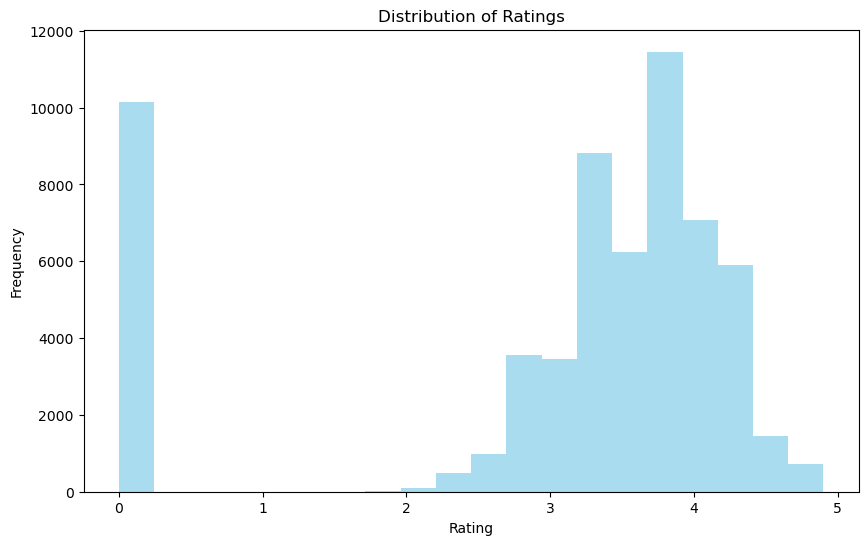

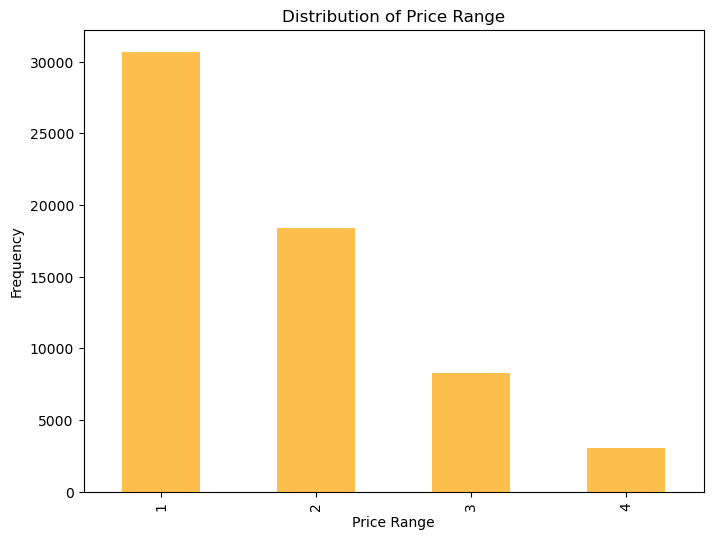

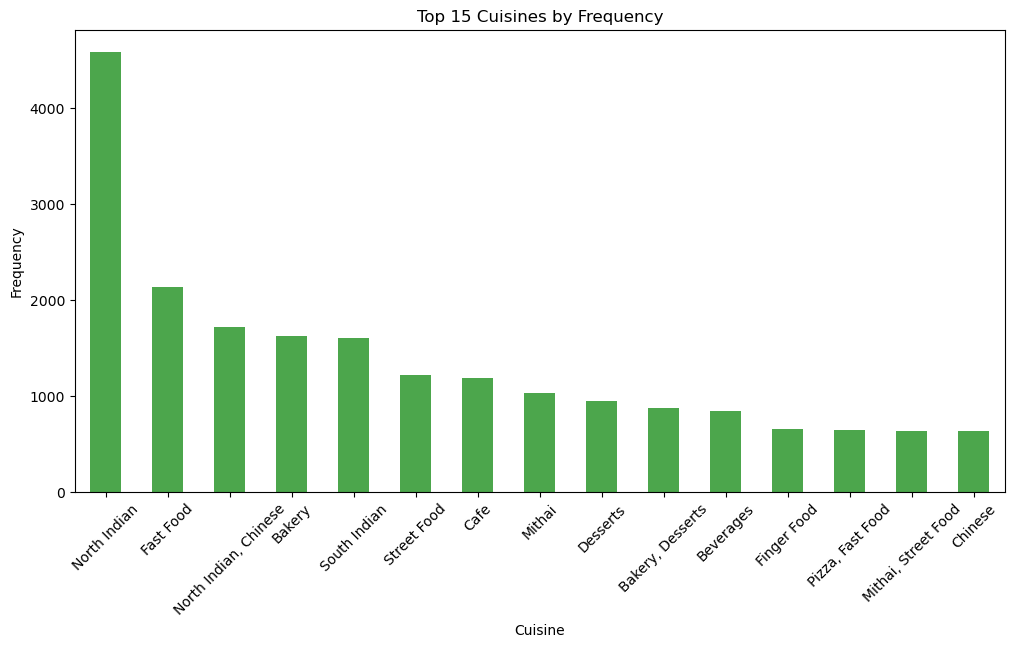

In [49]:
# Distribution analysis for ratings
plt.figure(figsize=(10, 6))
plt.hist(df['aggregate_rating'], bins=20, color='skyblue', alpha=0.7)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Distribution analysis for price range
plt.figure(figsize=(8, 6))
df['price_range'].value_counts().sort_index().plot(kind='bar', color='orange', alpha=0.7)
plt.title('Distribution of Price Range')
plt.xlabel('Price Range')
plt.ylabel('Frequency')
plt.show()

# Distribution analysis for cuisines
plt.figure(figsize=(12, 6))
df['cuisines'].explode().value_counts().head(15).plot(kind='bar', color='green', alpha=0.7)
plt.title('Top 15 Cuisines by Frequency')
plt.xlabel('Cuisine')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


Correlation Analysis

In [50]:
# Select only numeric columns for correlation analysis
numeric_df = df.select_dtypes(include='number')

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)



Correlation Matrix:
                        res_id   city_id  latitude  longitude  country_id  \
res_id                1.000000  0.463902  0.009244  -0.064495         NaN   
city_id               0.463902  1.000000  0.012329  -0.058302         NaN   
latitude              0.009244  0.012329  1.000000   0.033906         NaN   
longitude            -0.064495 -0.058302  0.033906   1.000000         NaN   
country_id                 NaN       NaN       NaN        NaN         NaN   
average_cost_for_two -0.196259 -0.210367 -0.002724  -0.012011         NaN   
price_range          -0.188266 -0.207706 -0.001703  -0.022174         NaN   
aggregate_rating     -0.253419 -0.266710  0.005960   0.116439         NaN   
votes                -0.200272 -0.197854 -0.006372   0.023579         NaN   
photo_count          -0.090803 -0.173436 -0.002636   0.012057         NaN   
opentable_support          NaN       NaN       NaN        NaN         NaN   
delivery              0.021881 -0.036737  0.007394   0.0

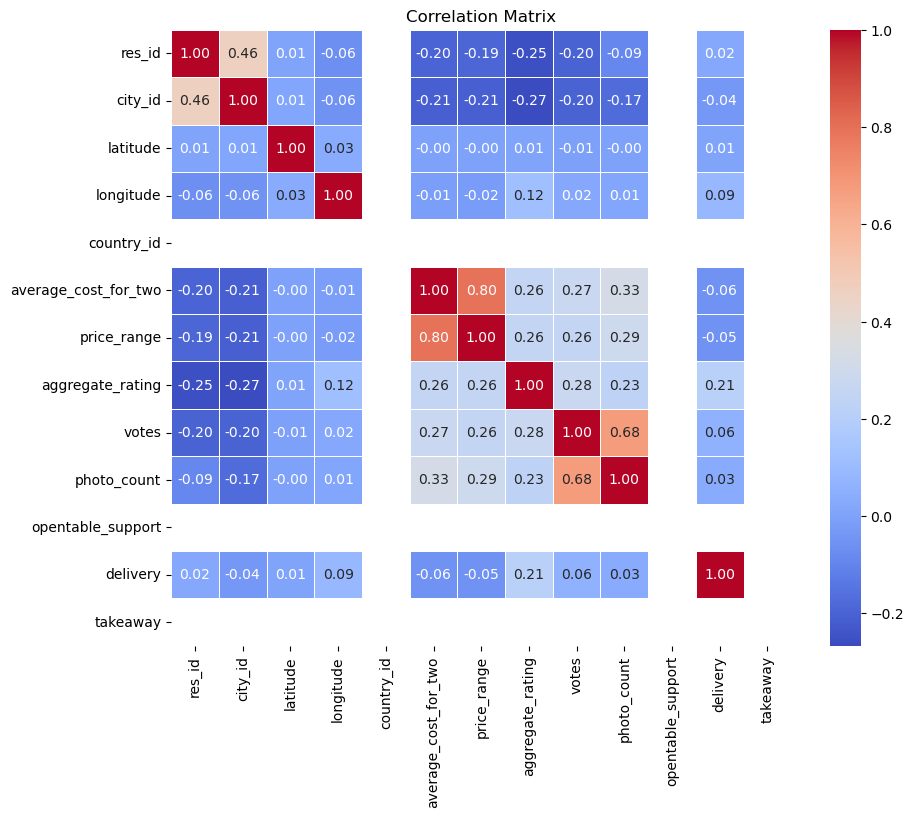

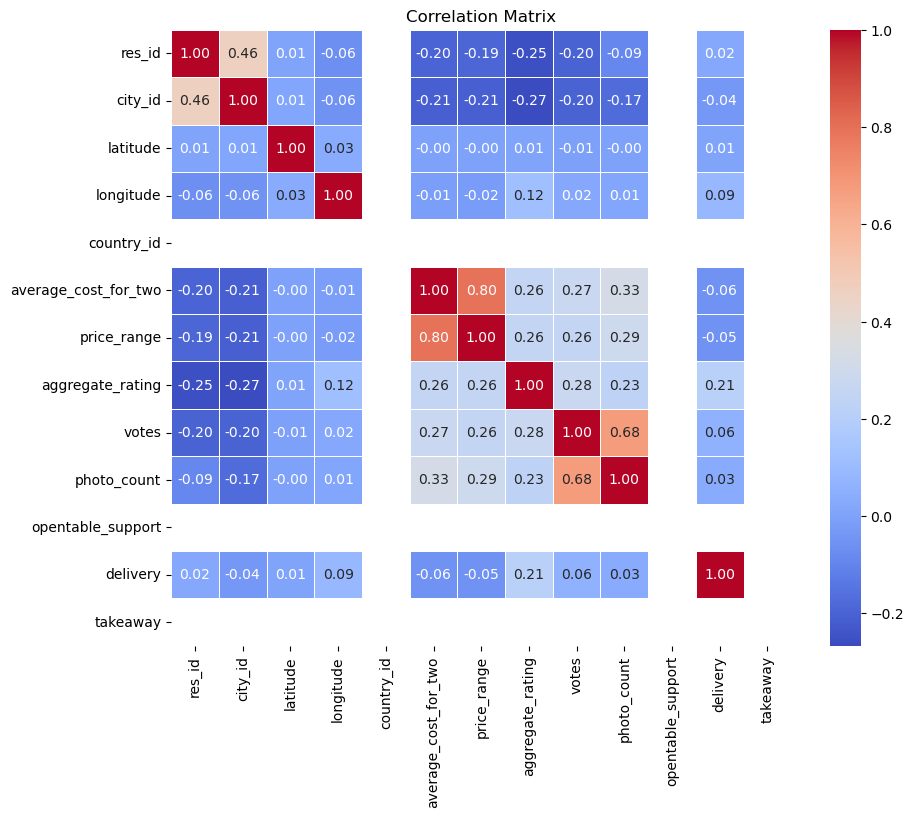

In [48]:
# Visualize the correlation matrix as a heatmap
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


# Visualize the correlation matrix as a heatmap
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


# Regional Analysis

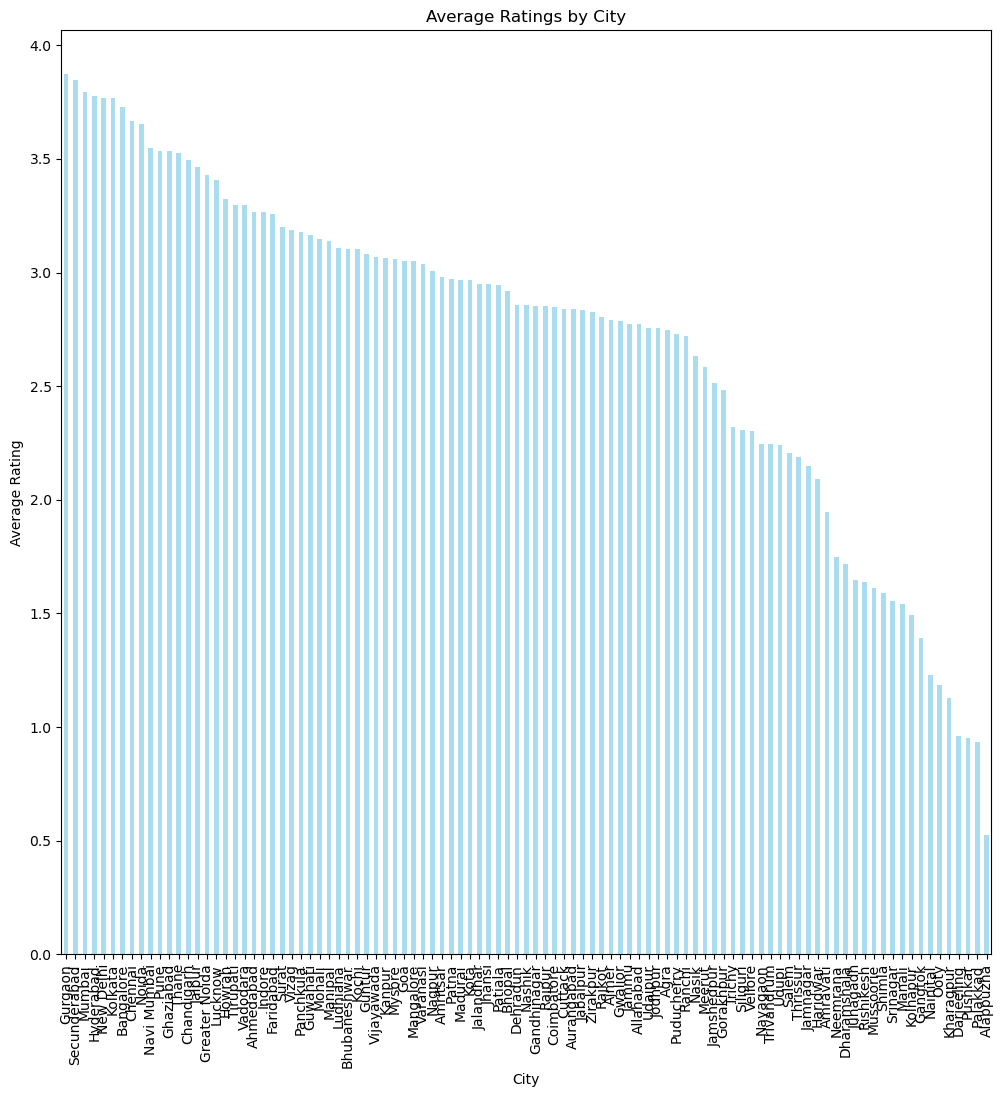

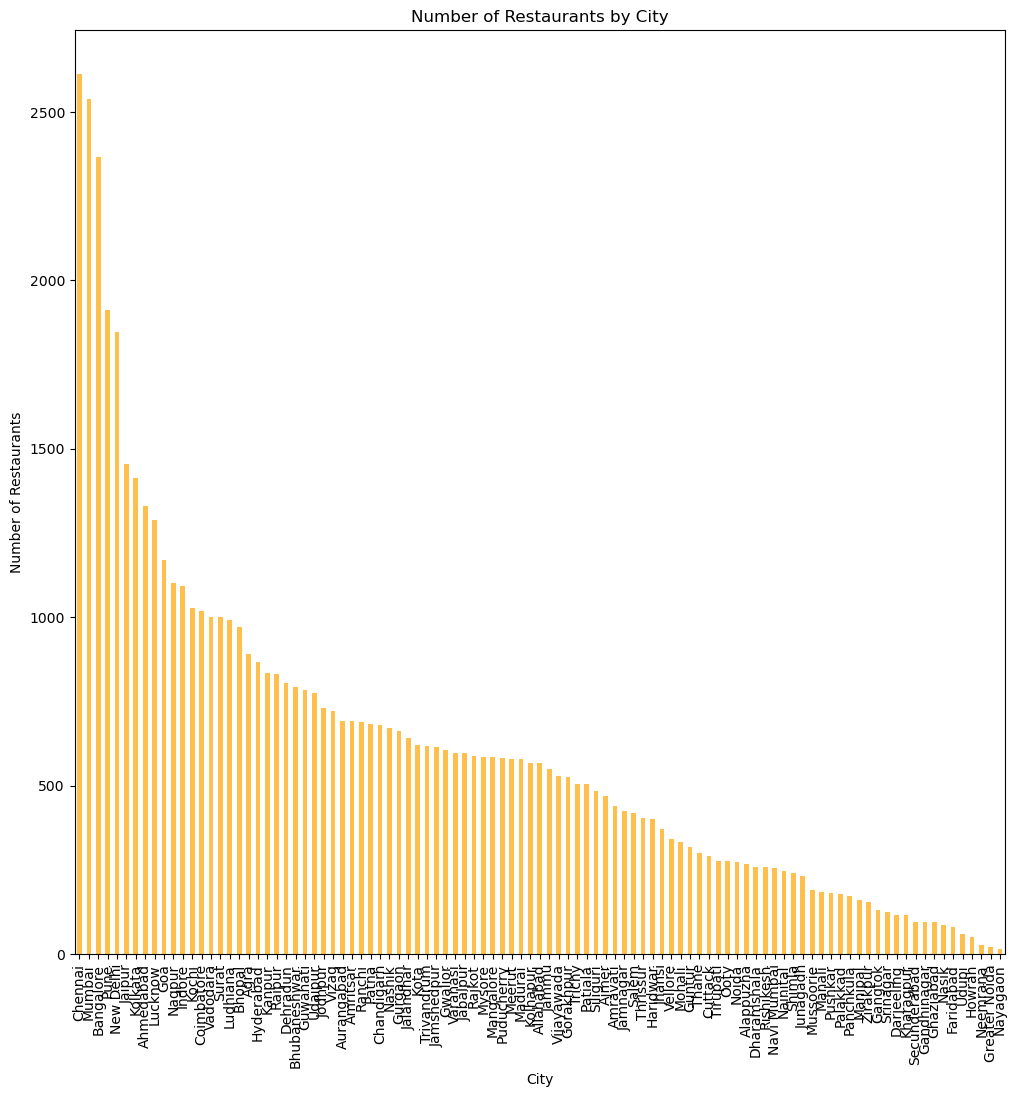

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group the data by city or region
city_groups = df.groupby('city')

# Aggregate statistics for each group
avg_ratings = city_groups['aggregate_rating'].mean()
num_restaurants = city_groups.size()


# Visualize trends
plt.figure(figsize=(12, 12))

# Plot average ratings
avg_ratings.sort_values(ascending=False).plot(kind='bar', color='skyblue', alpha=0.7)
plt.title('Average Ratings by City')
plt.xlabel('City')
plt.ylabel('Average Rating')
plt.show()
# Plot number of restaurants
plt.figure(figsize=(12, 12))
num_restaurants.sort_values(ascending=False).plot(kind='bar', color='orange', alpha=0.7)
plt.title('Number of Restaurants by City')
plt.xlabel('City')
plt.ylabel('Number of Restaurants')
plt.show()


In [52]:
# Explode cuisines_list and group by 'name' and 'city' to count occurrences of each cuisine
cuisine_counts = df.explode('cuisines').groupby(['name', 'city', 'cuisines']).size().reset_index(name='count')

# Sort the data by count within each group
cuisine_counts = cuisine_counts.sort_values(by=['name', 'city', 'count'], ascending=[True, True, False])

# Group by restaurant name and city again, and select top 10 cuisines for each group
top_10_cuisines = cuisine_counts.groupby(['name', 'city']).head(10)

# Print the top 10 cuisines by restaurant name and city
print(top_10_cuisines)


                                      name       city  \
0                              # Wednesday     Kanpur   
1      #1, Culinary Avenue - The Red Maple     Indore   
2                              #788 Avenue  Hyderabad   
3                                      #BC     Jaipur   
4                                    #BEiR  Bangalore   
...                                    ...        ...   
49159                    Food Street - Veg       Kota   
49160                            ट 4 Tasty        Goa   
49161                          द Vege टेबल       Pune   
49162                            स्पेस Bar       Pune   
49163                    ह-tea The Tea Hut   Ludhiana   

                                                cuisines  count  
0                       Fast Food, Chinese, North Indian      1  
1                     North Indian, Chinese, Continental      1  
2                     Continental, Italian, North Indian      1  
3                 North Indian, Continental, Finger

<Figure size 1000x1000 with 0 Axes>

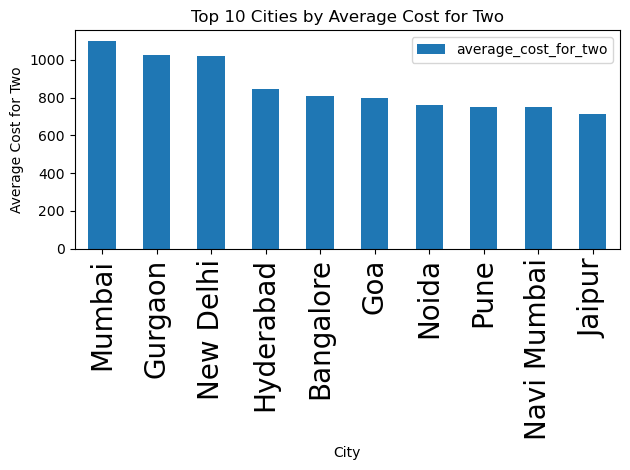

In [162]:
average_cost_by_city = df.groupby('city')['average_cost_for_two'].mean().reset_index()

Top_10_average_cost_by_city = average_cost_by_city.nlargest(10, 'average_cost_for_two')

plt.figure(figsize=(10, 10))
Top_10_average_cost_by_city.plot(kind='bar', x='city', y='average_cost_for_two')
plt.title('Top 10 Cities by Average Cost for Two')
plt.xlabel('City')
plt.ylabel('Average Cost for Two')
plt.xticks(rotation=90, fontsize=20)  # Rotate city names for better visibility
plt.tight_layout()  # Adjust layout to fit all city names
plt.show()

In [163]:
average_rating_by_city = df.groupby('city')['aggregate_rating'].mean()
print(average_rating_by_city)

city
Agra          2.745404
Ahmedabad     3.266591
Ajmer         2.790426
Alappuzha     0.525843
Allahabad     2.771252
                ...   
Varanasi      3.037793
Vellore       2.301466
Vijayawada    3.066226
Vizag         3.189182
Zirakpur      2.827273
Name: aggregate_rating, Length: 99, dtype: float64


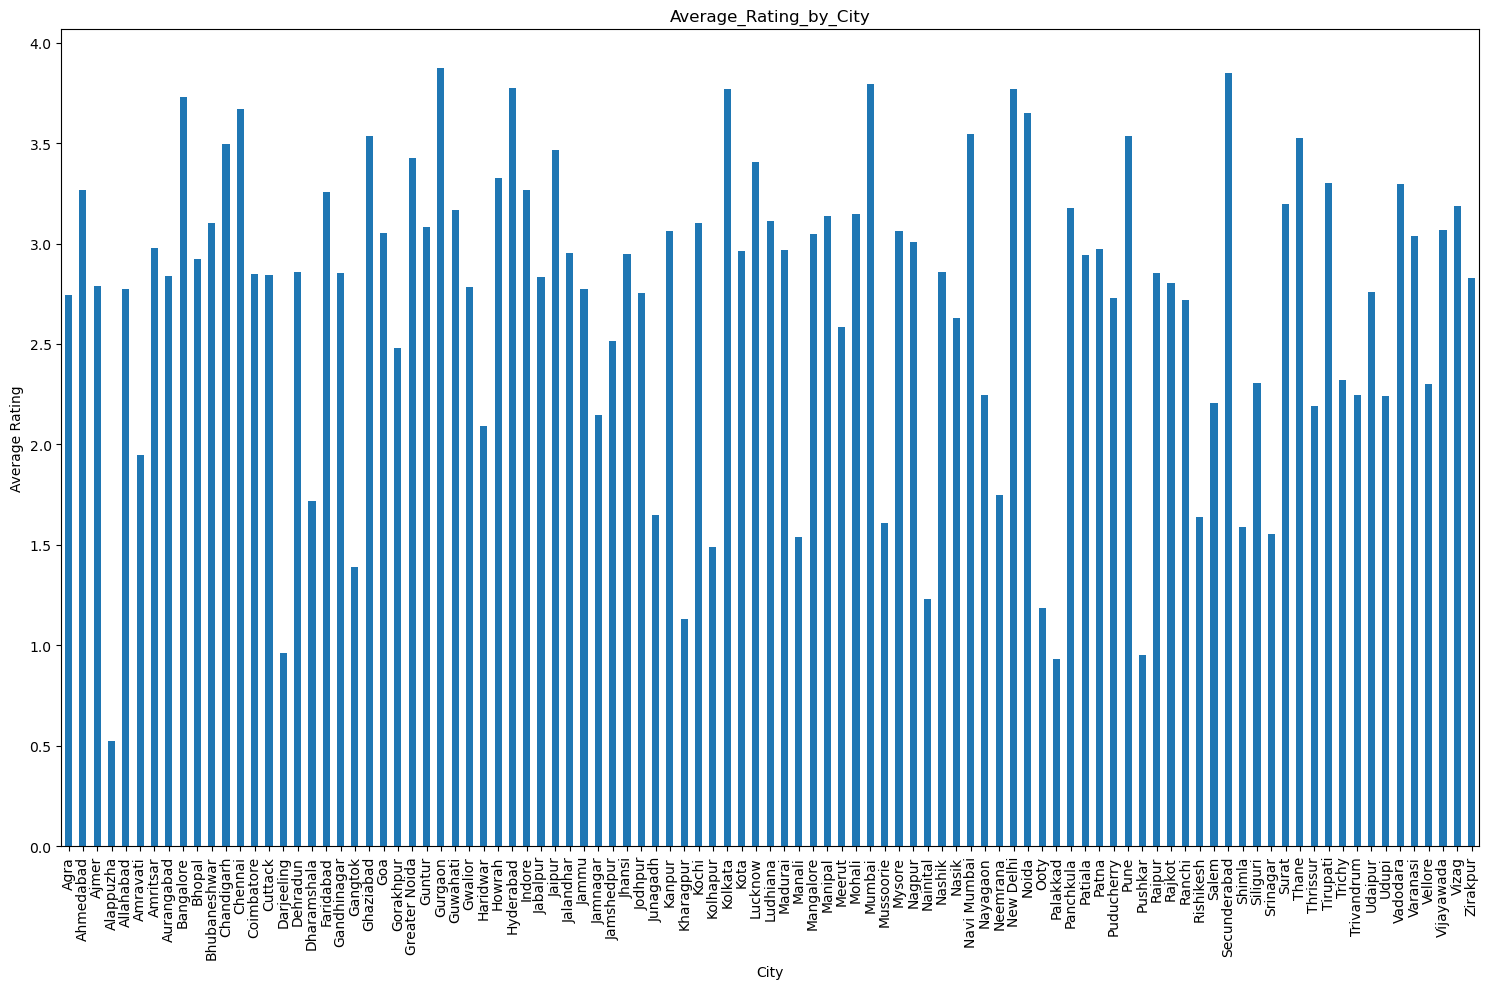

In [60]:
plt.figure(figsize=(15, 10))
average_rating_by_city.plot(kind='bar')
plt.title('Average_Rating_by_City')
plt.xlabel('City')
plt.ylabel('Average Rating')
plt.xticks(rotation=90) 
plt.tight_layout()
plt.show()

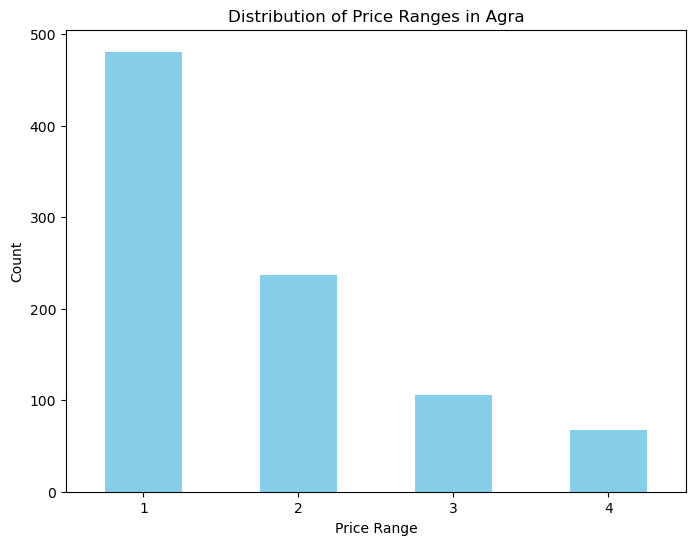

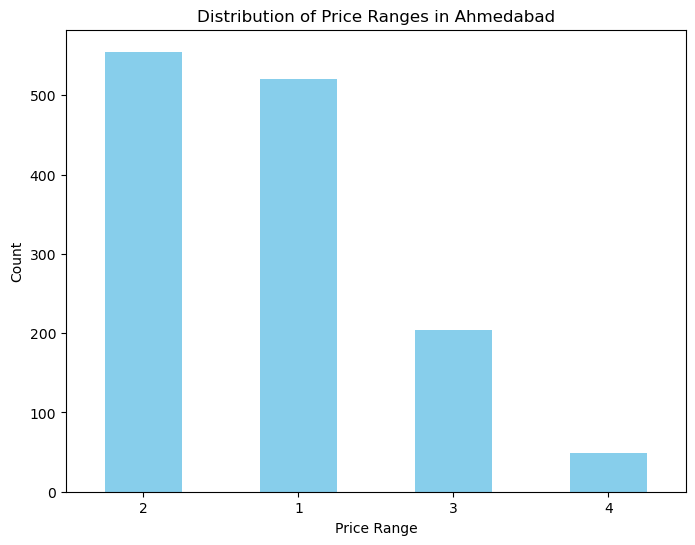

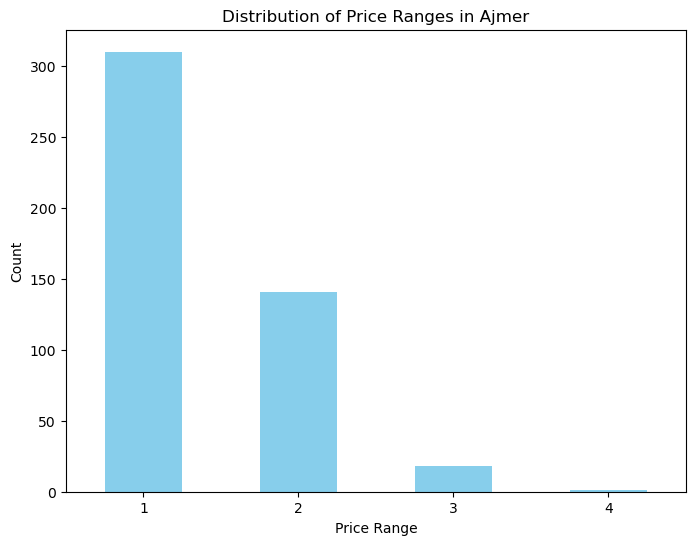

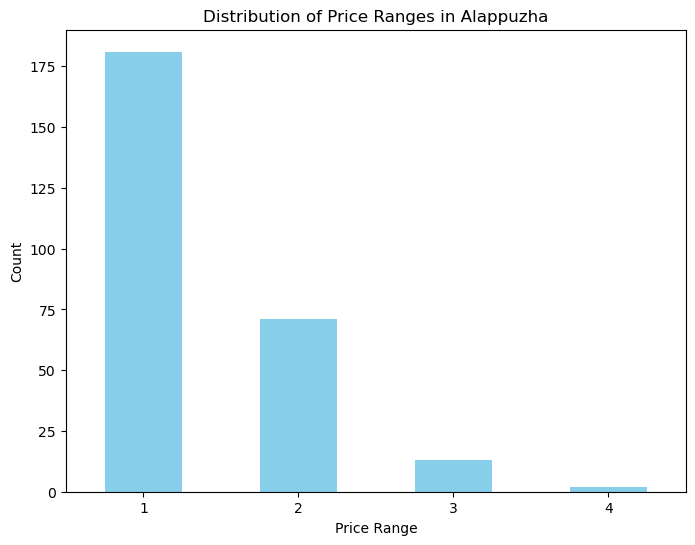

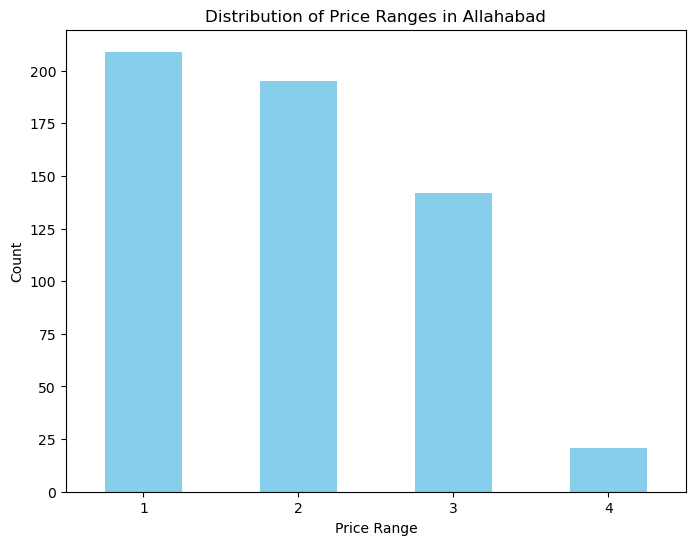

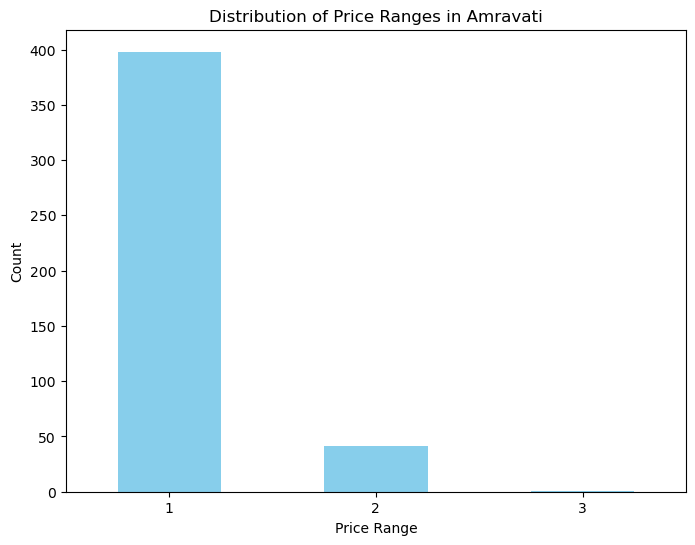

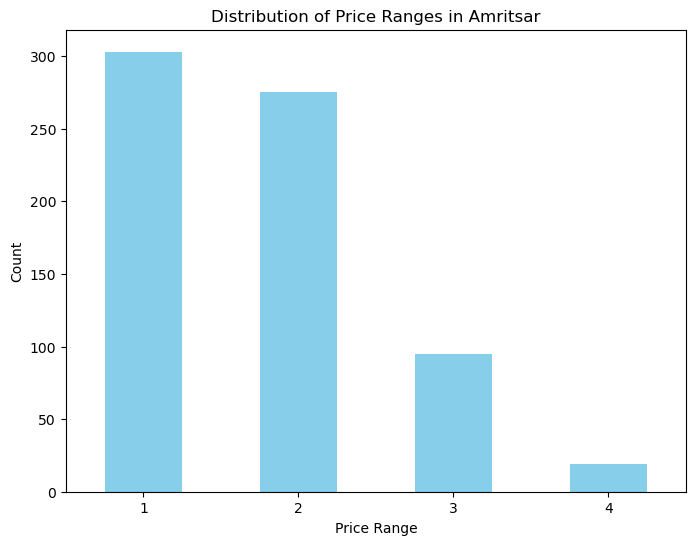

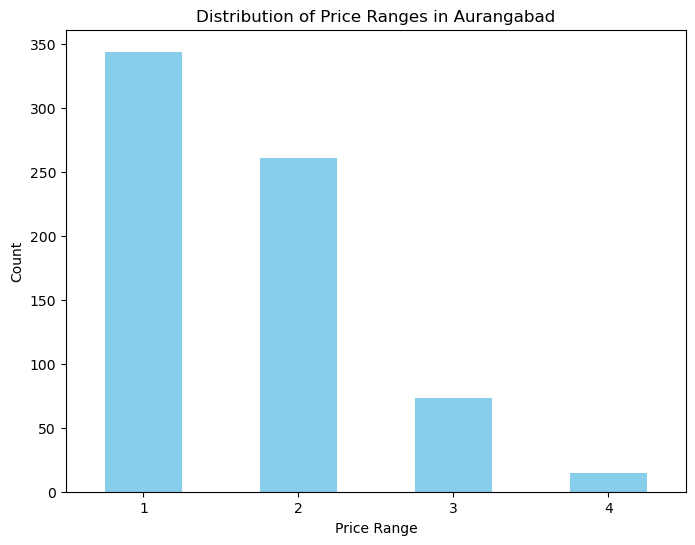

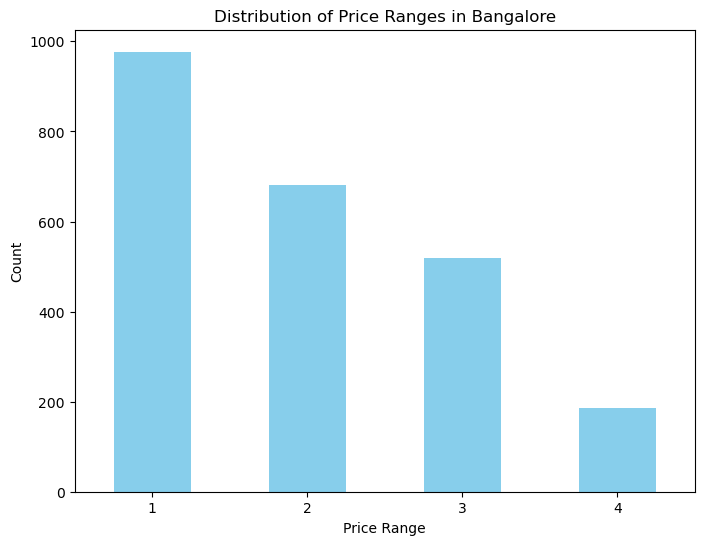

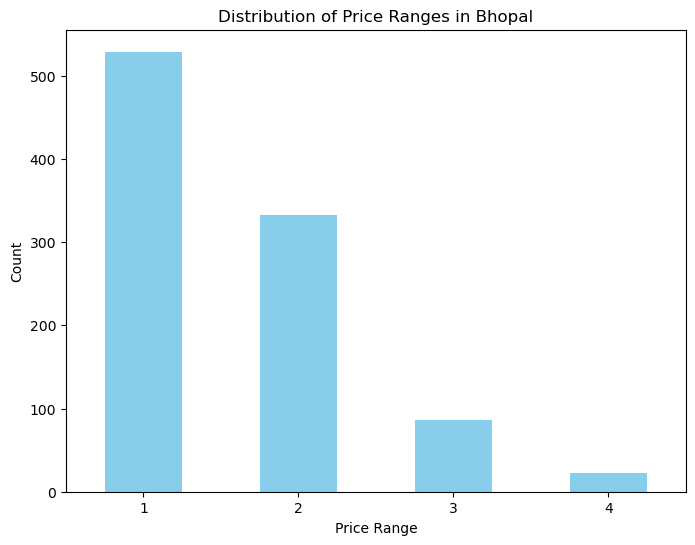

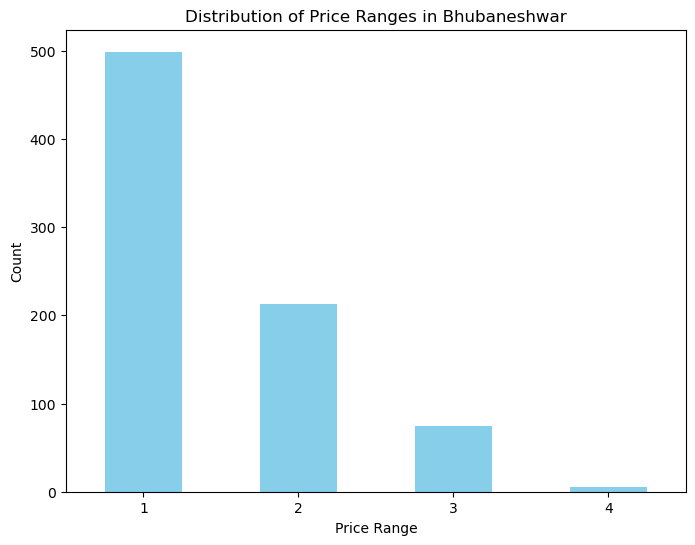

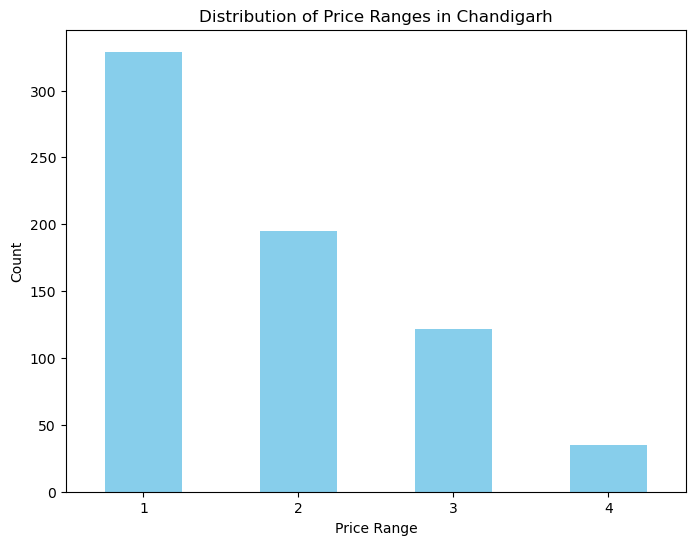

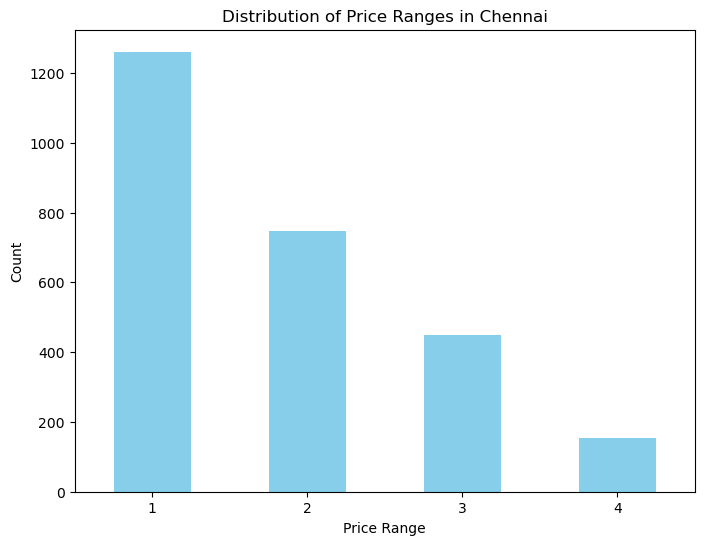

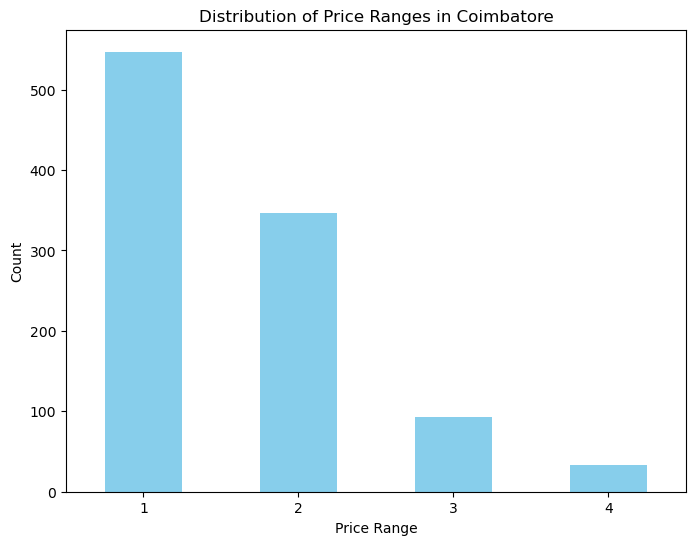

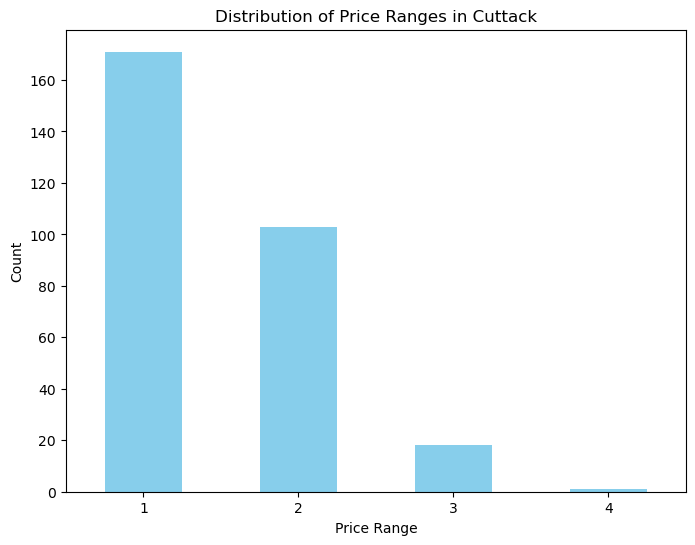

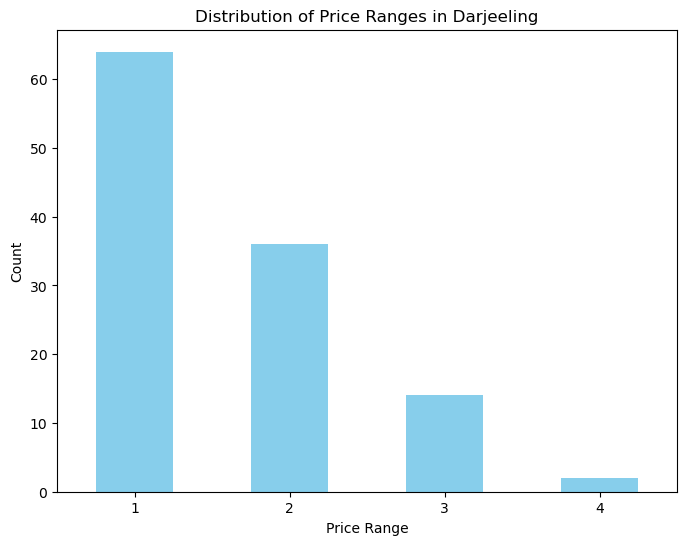

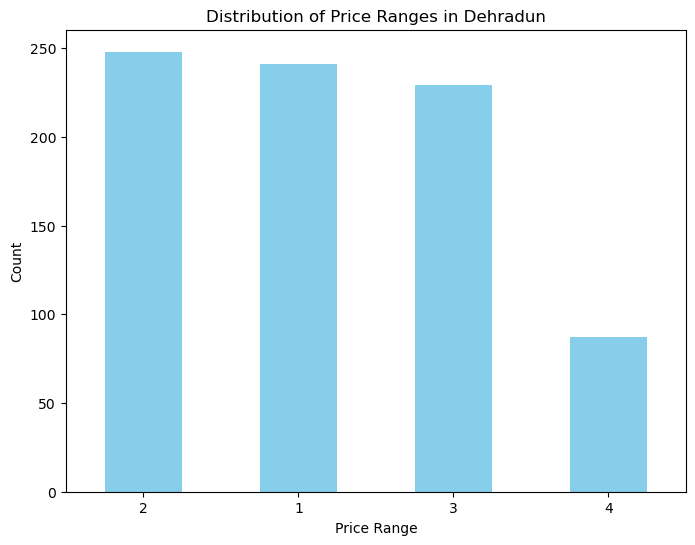

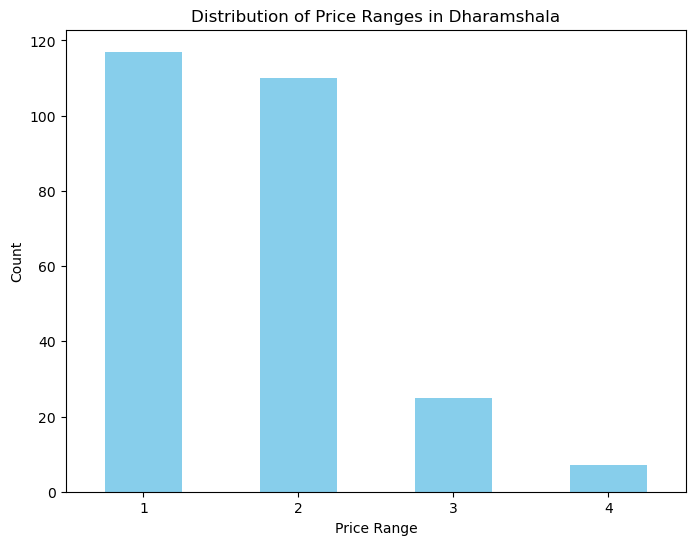

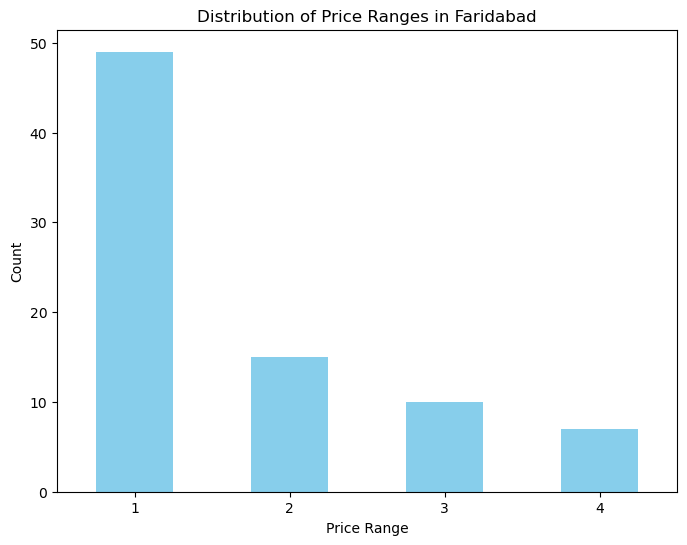

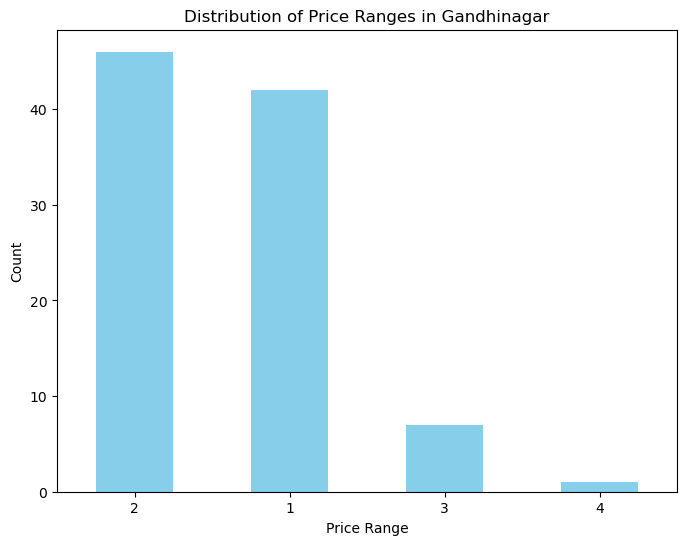

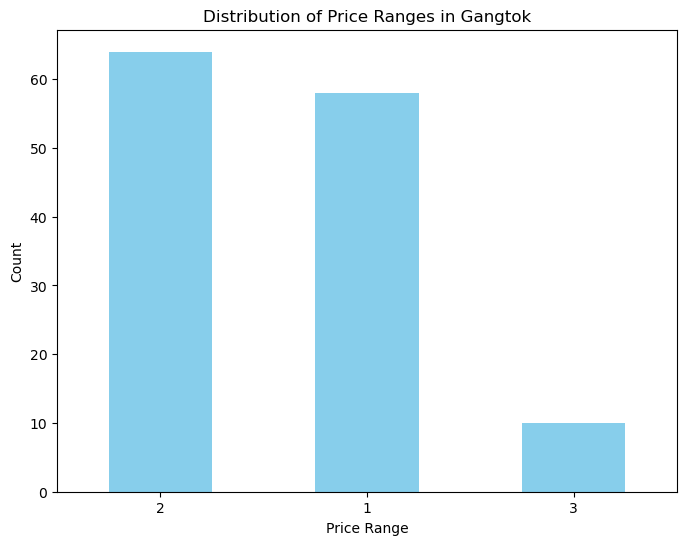

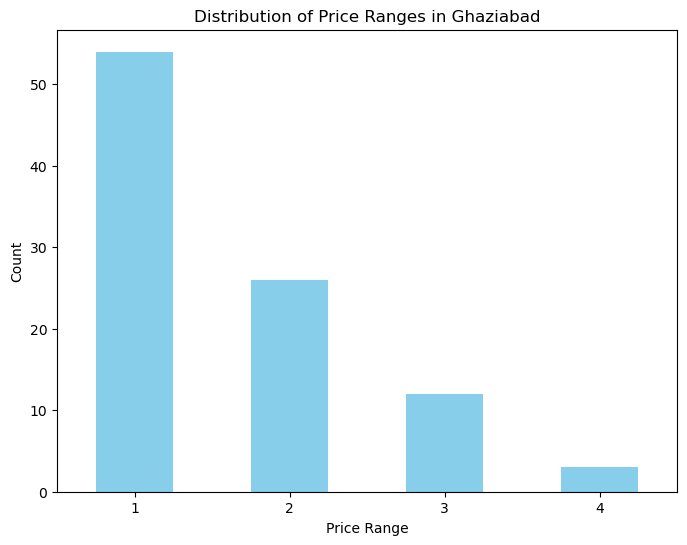

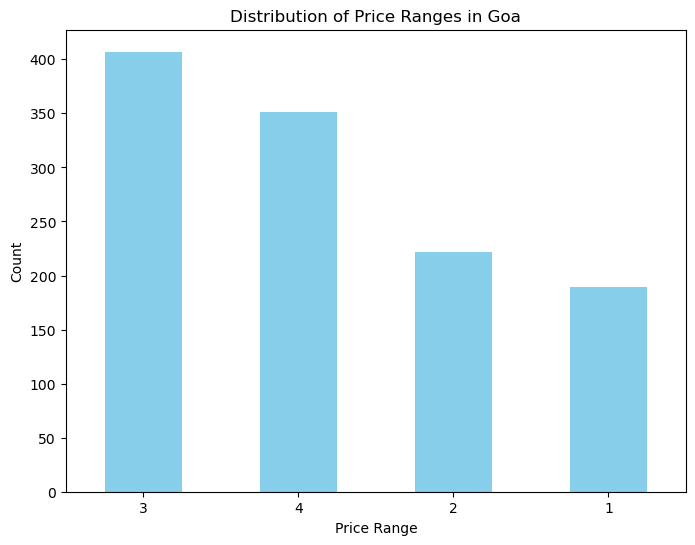

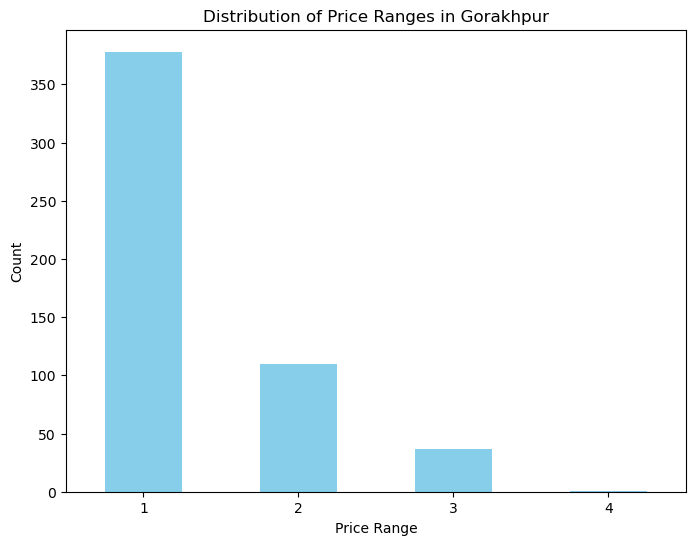

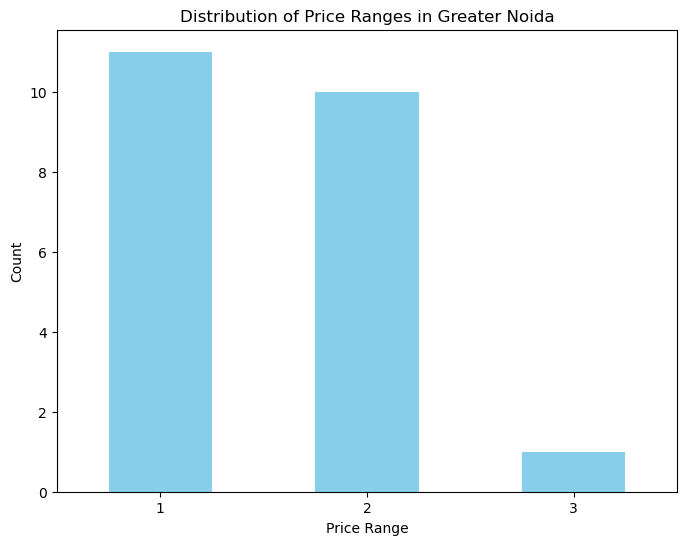

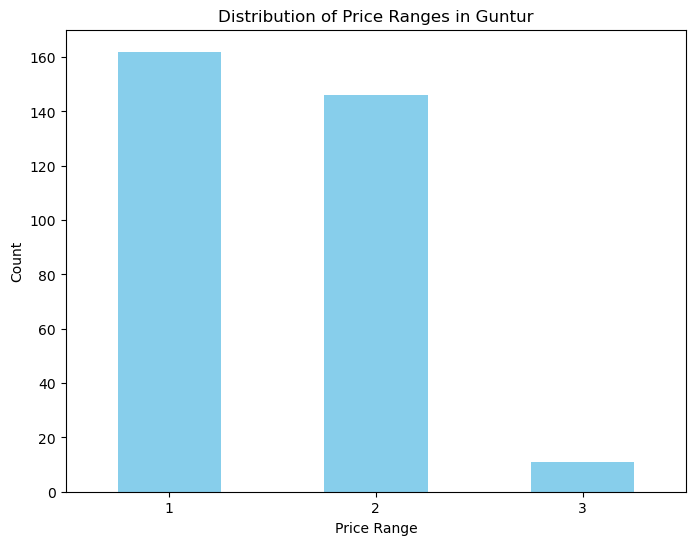

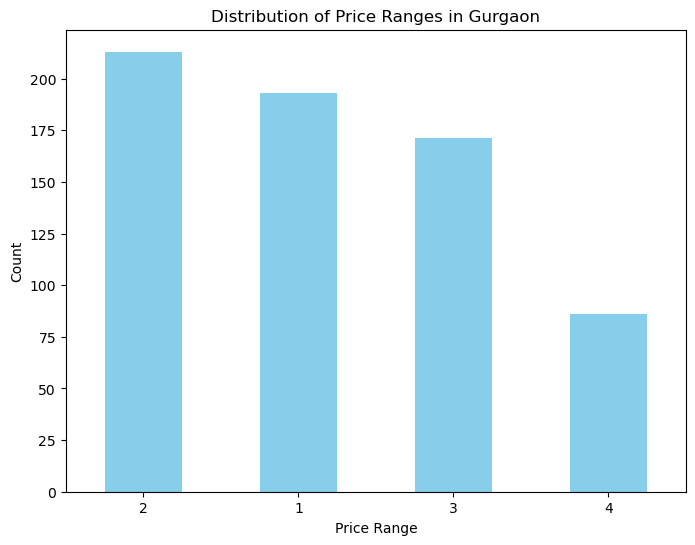

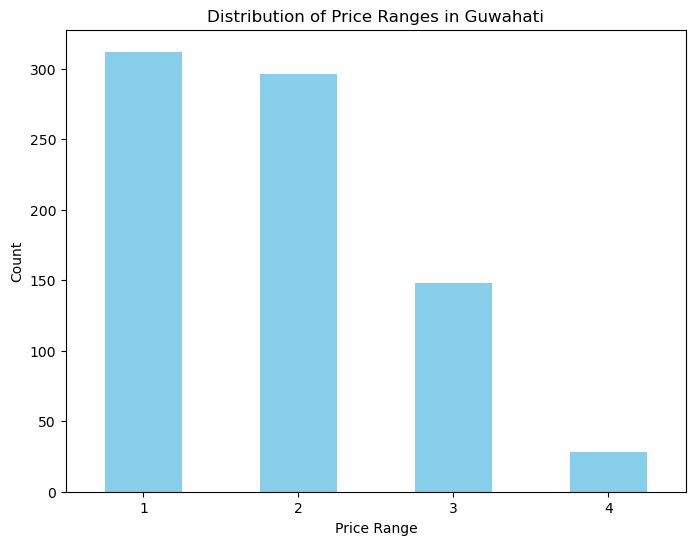

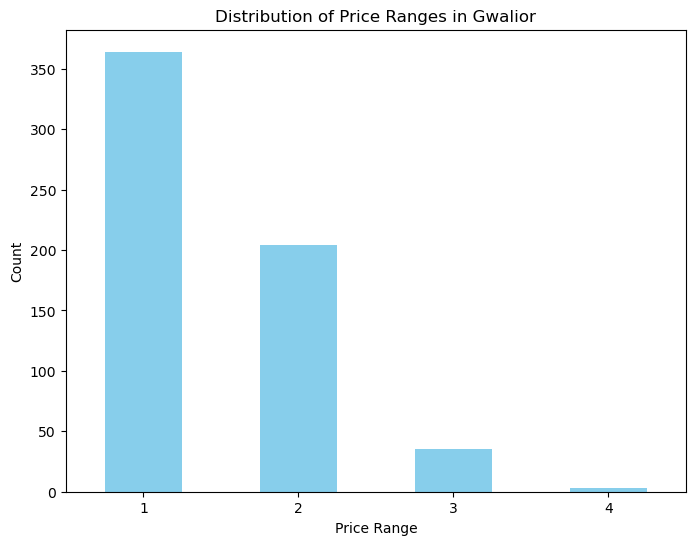

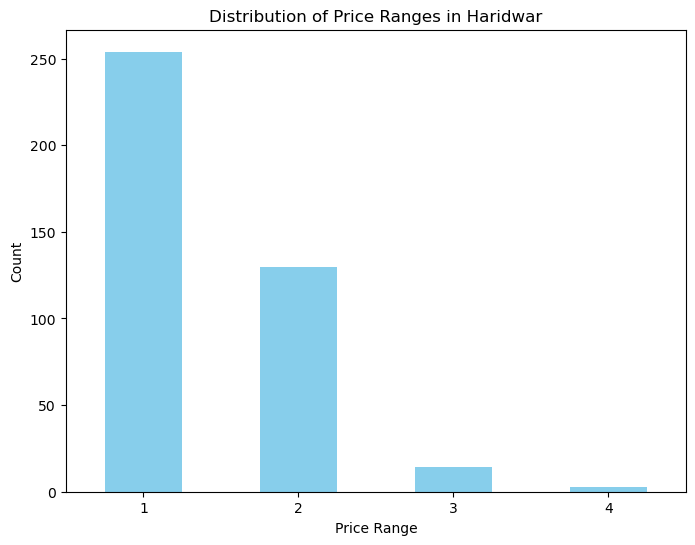

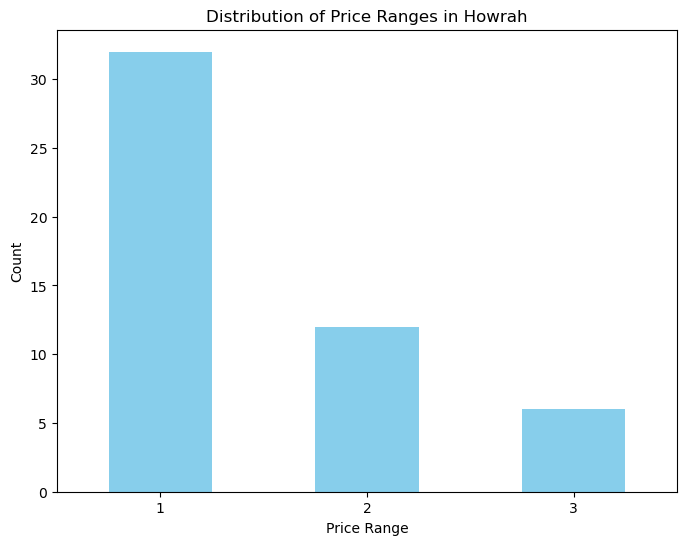

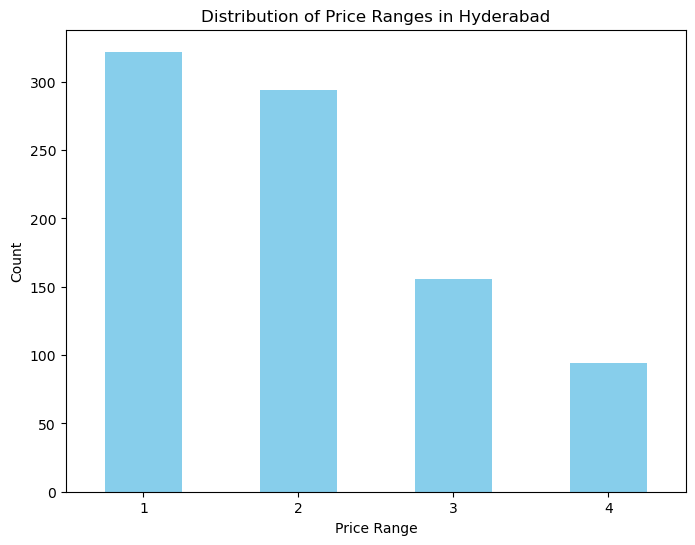

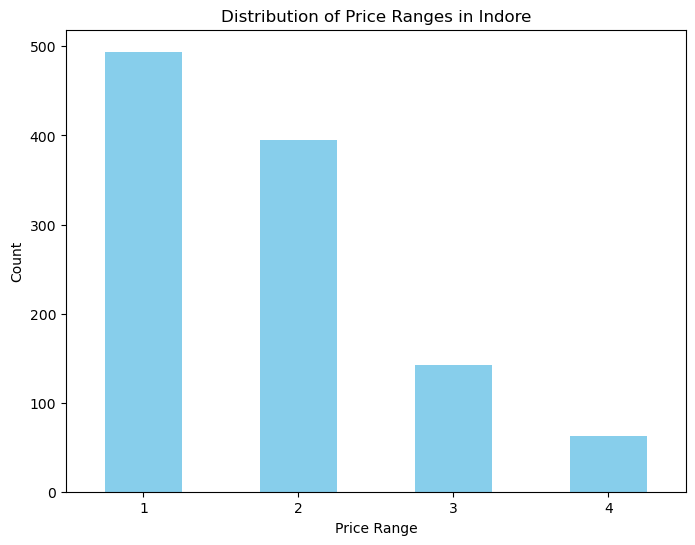

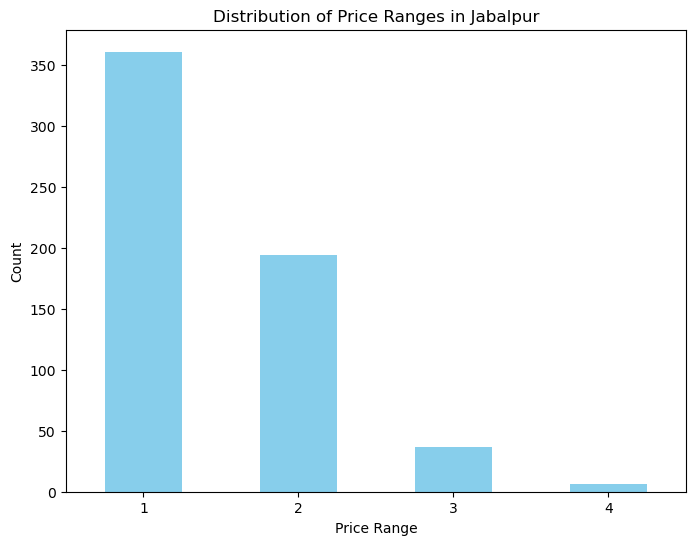

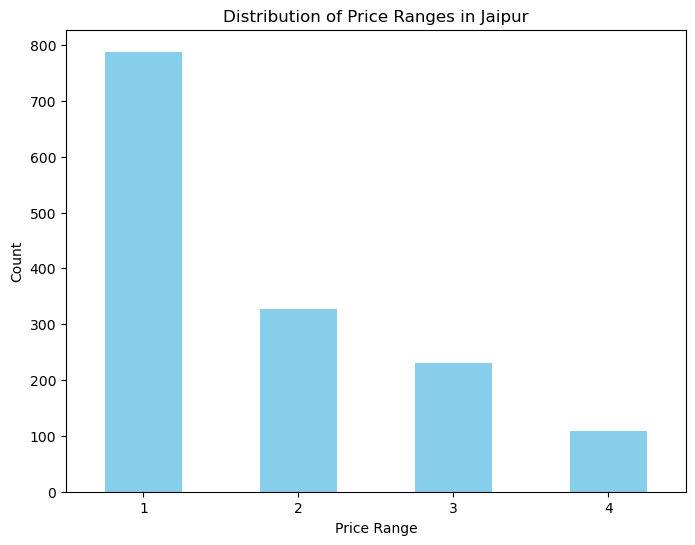

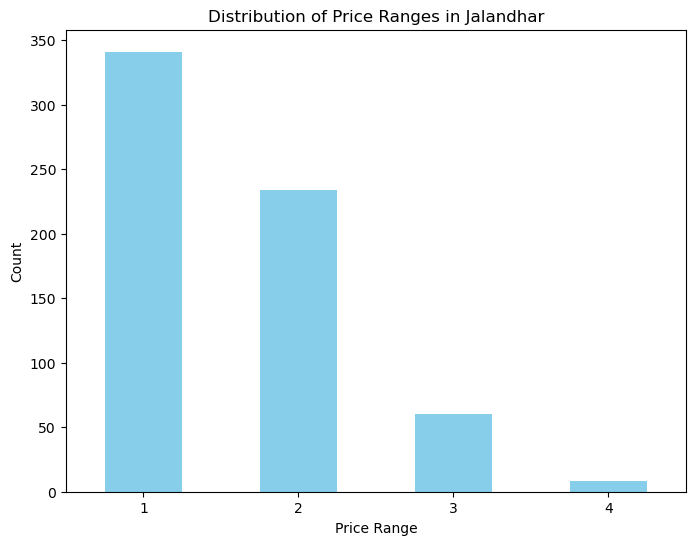

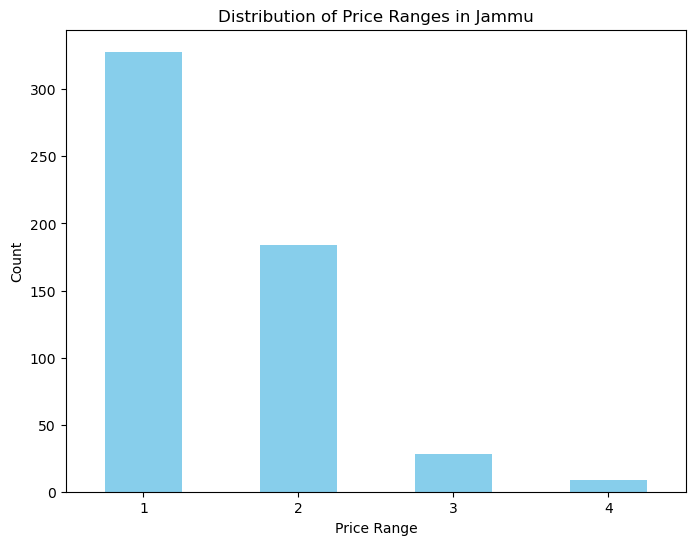

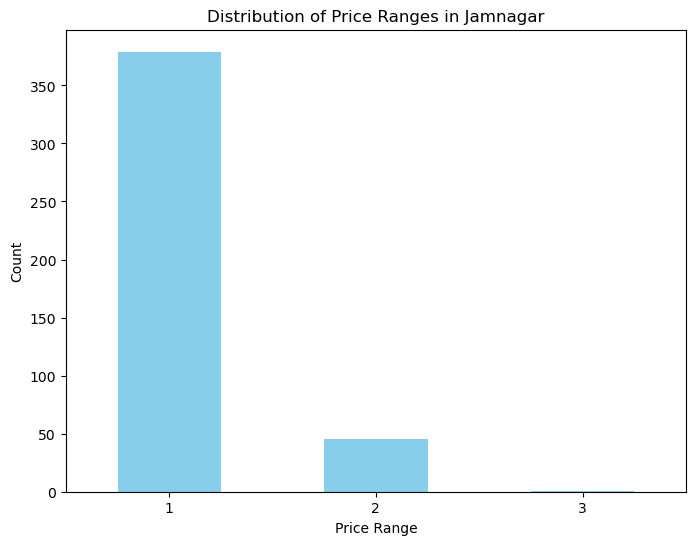

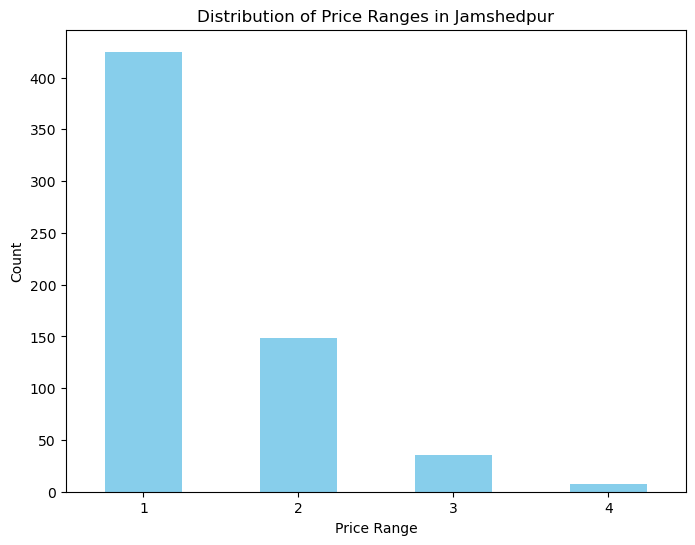

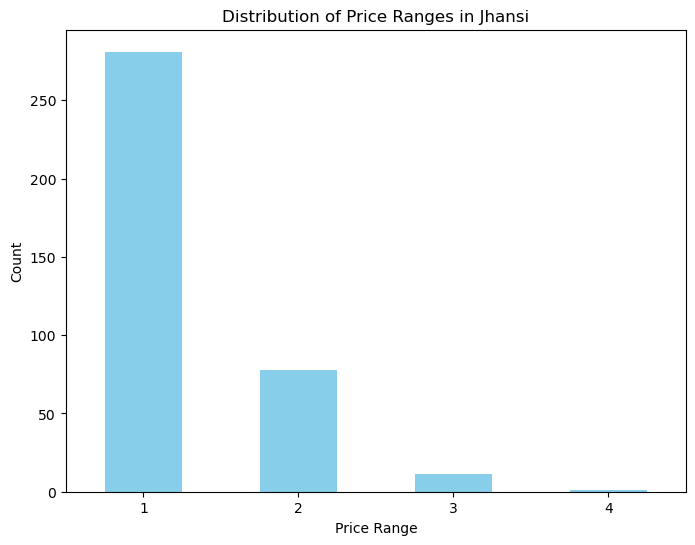

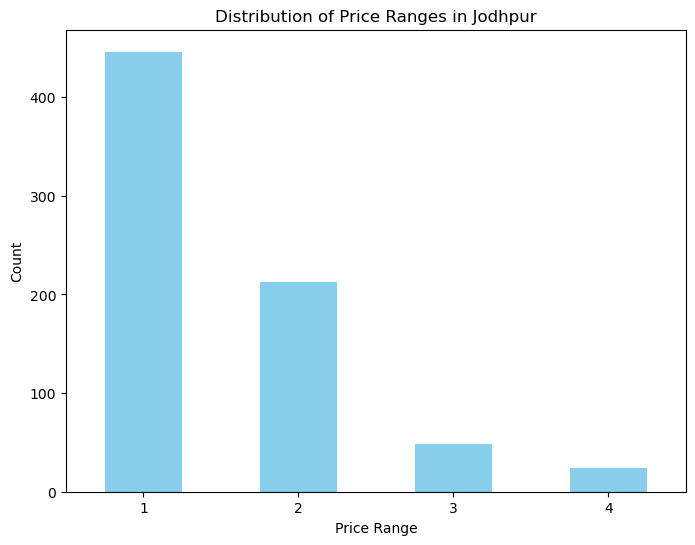

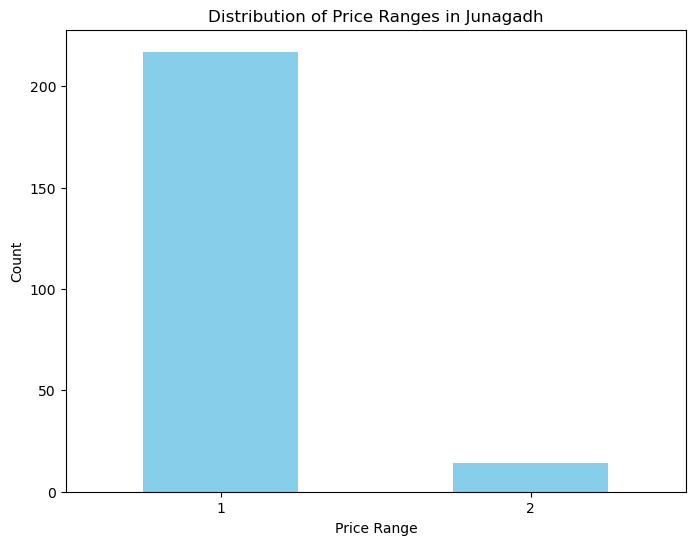

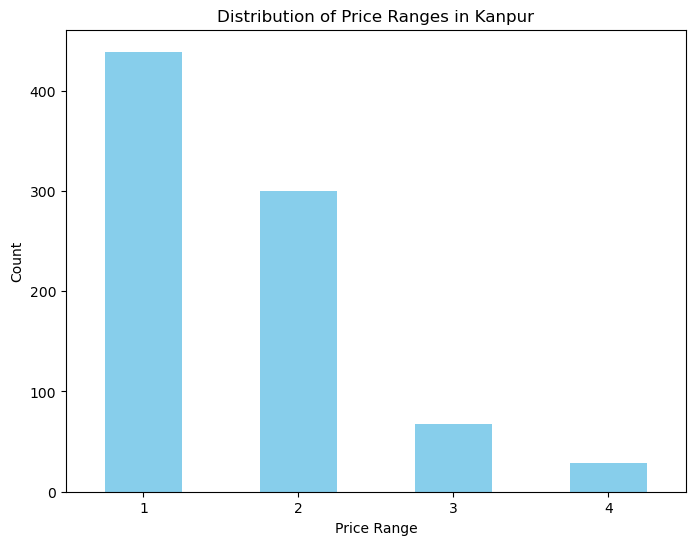

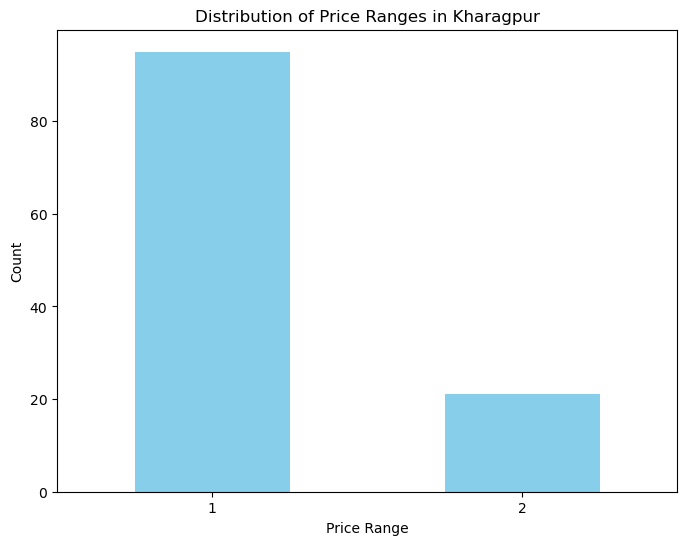

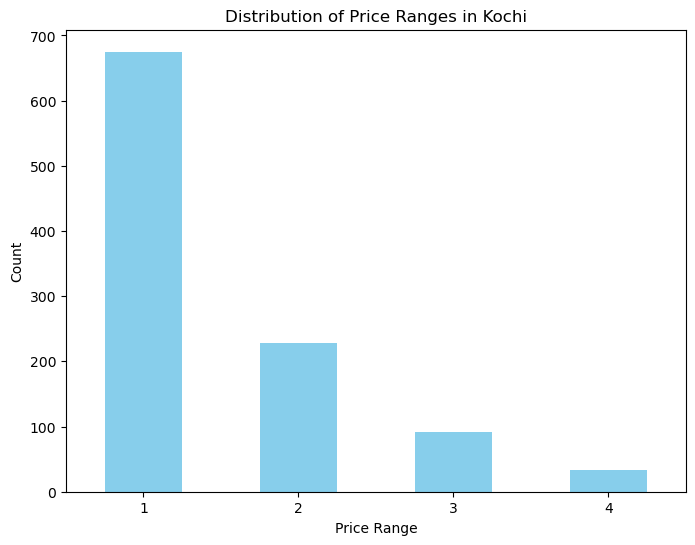

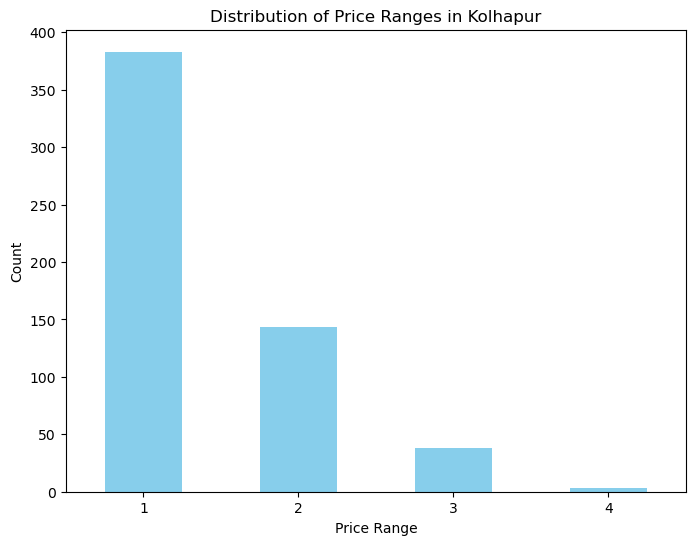

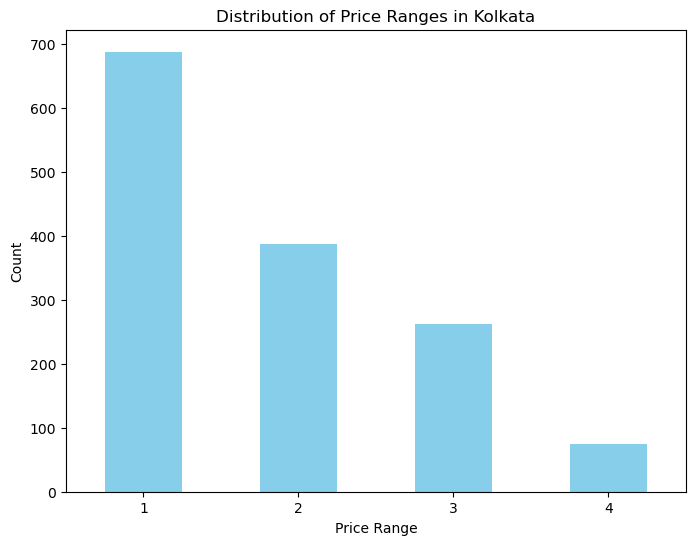

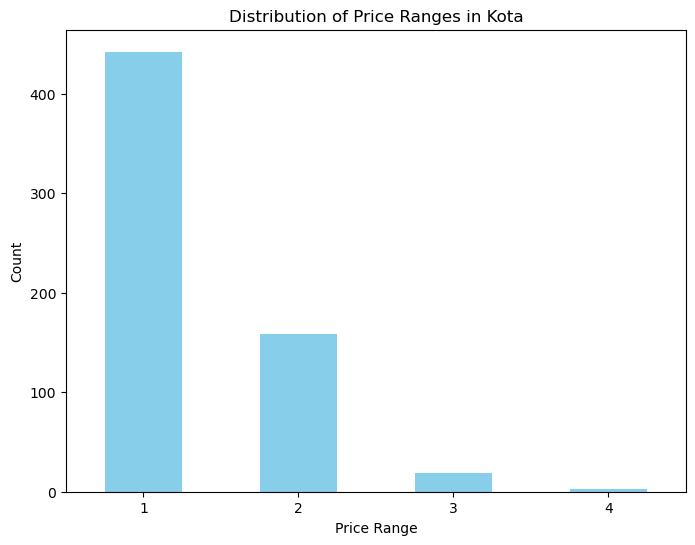

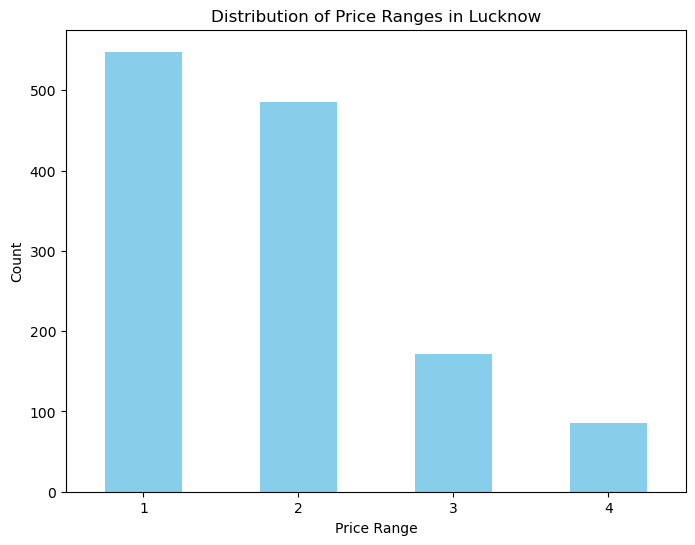

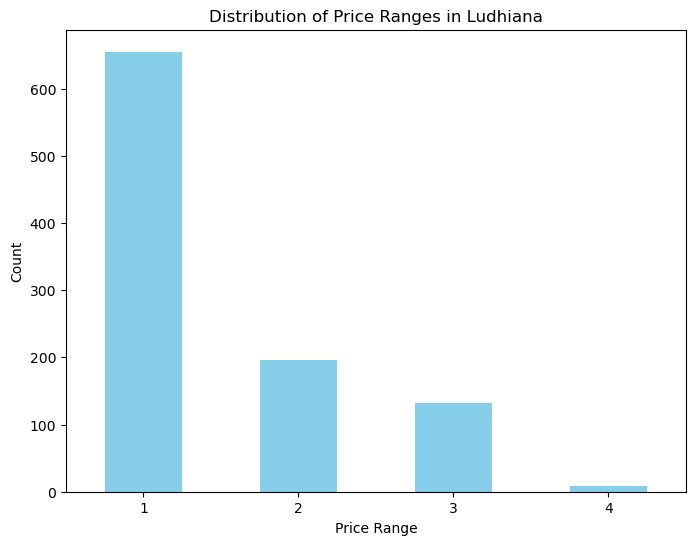

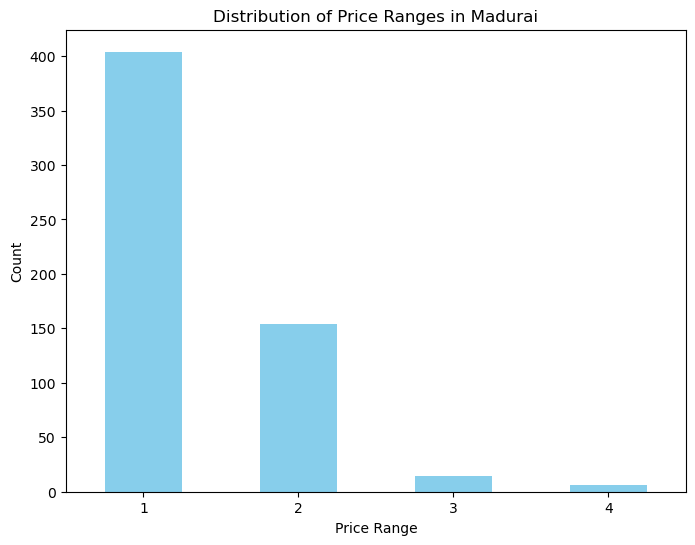

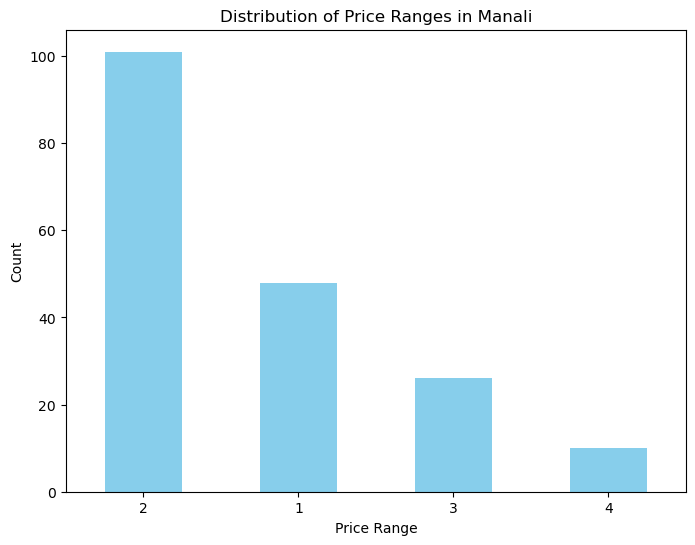

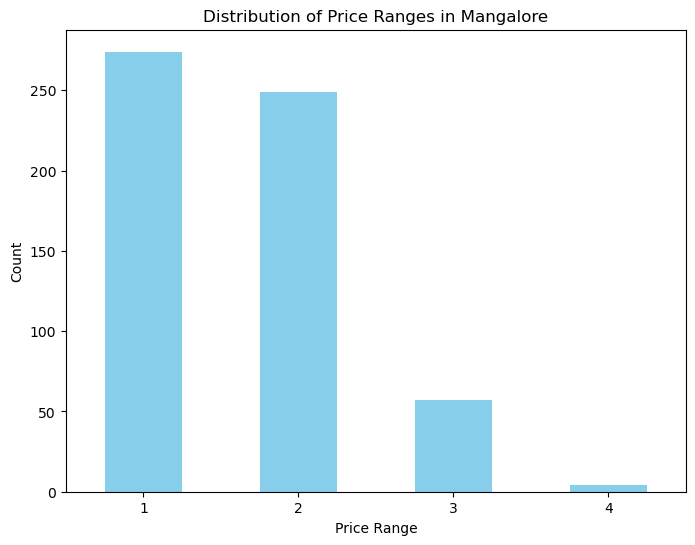

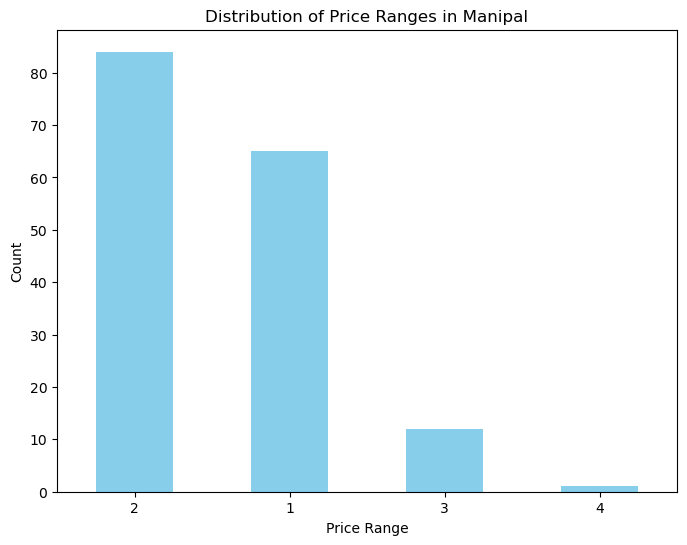

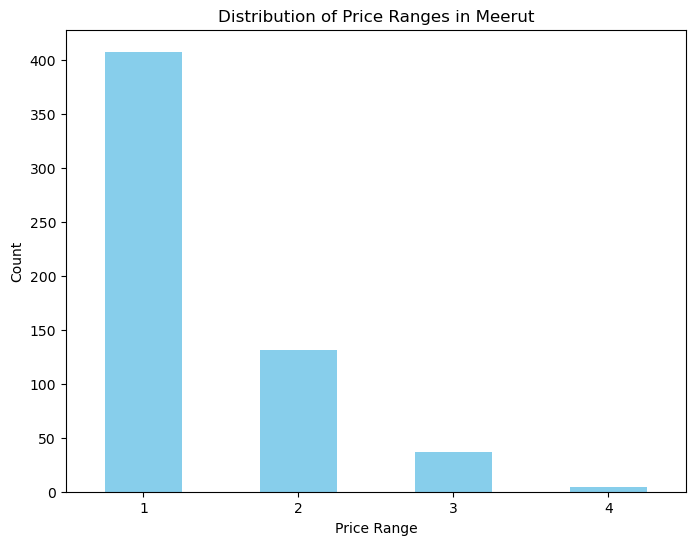

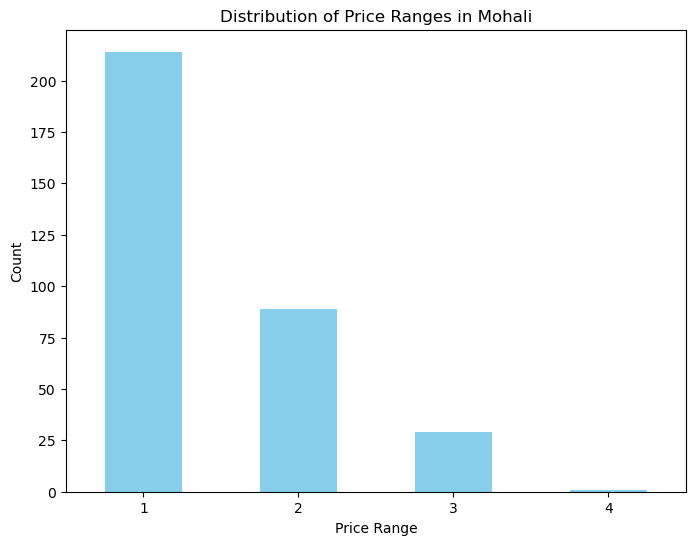

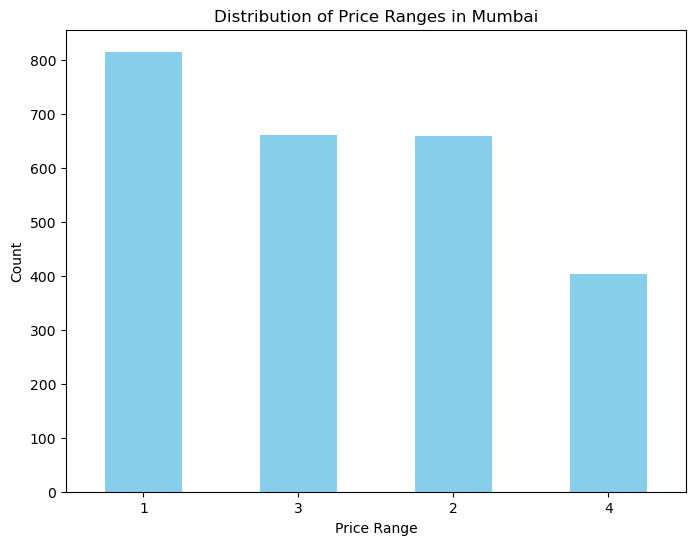

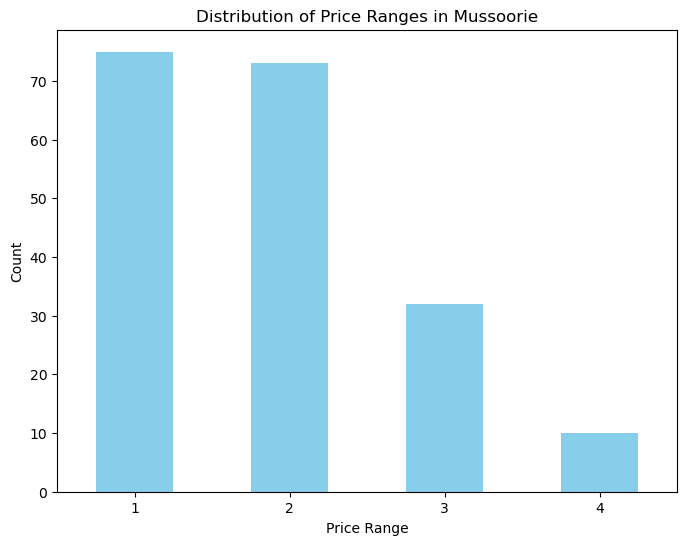

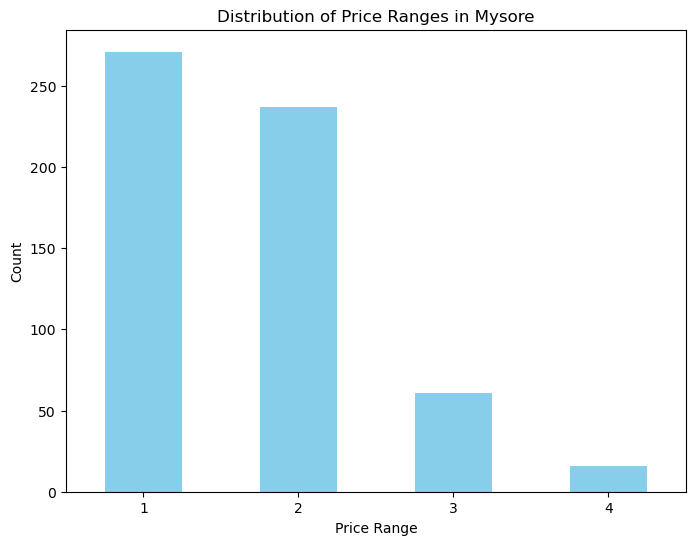

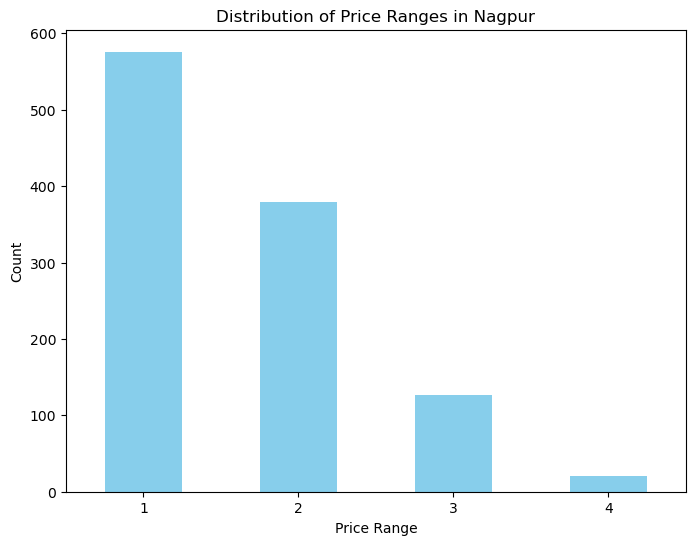

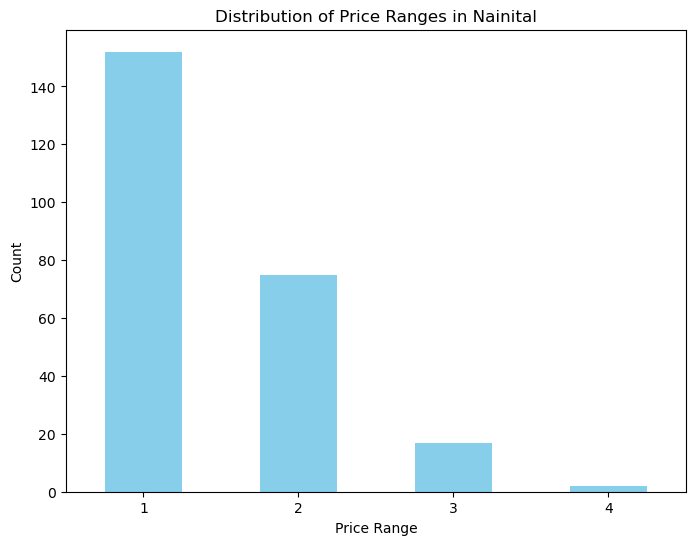

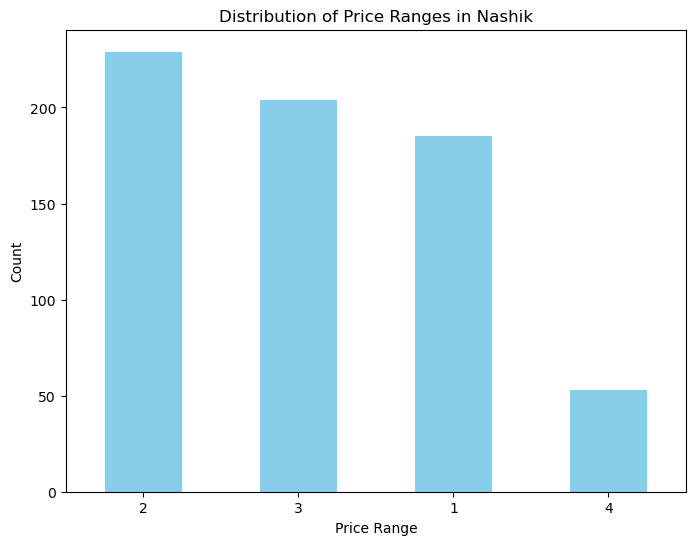

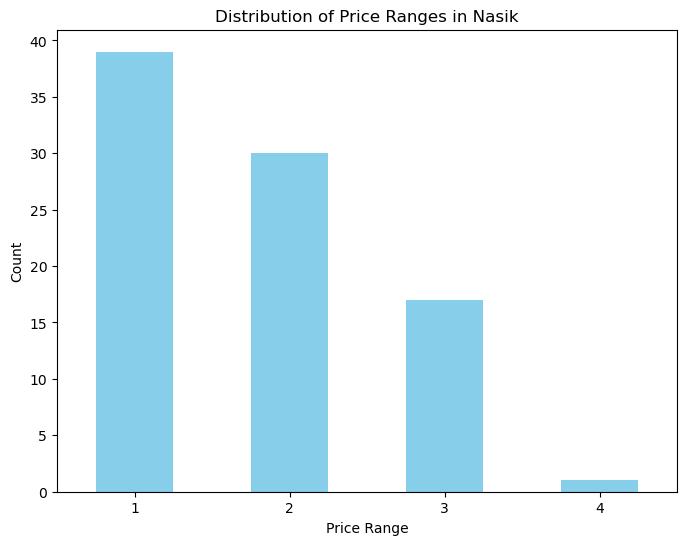

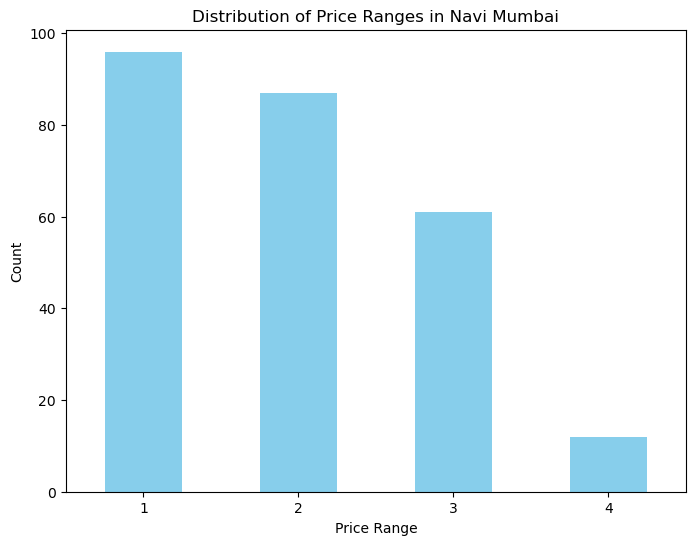

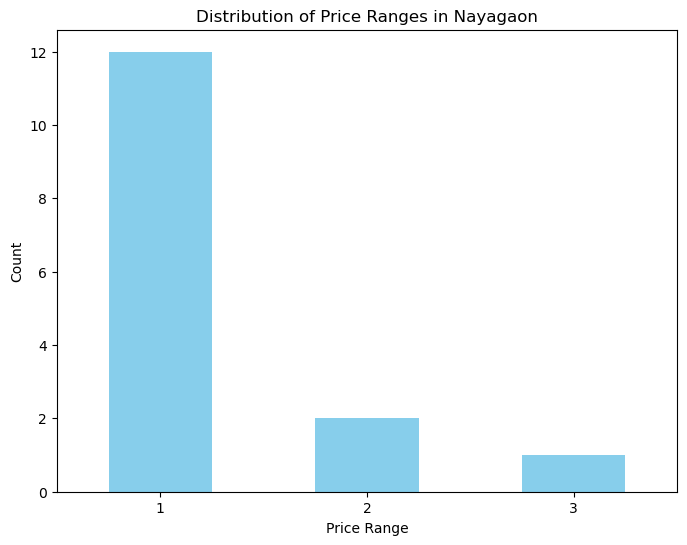

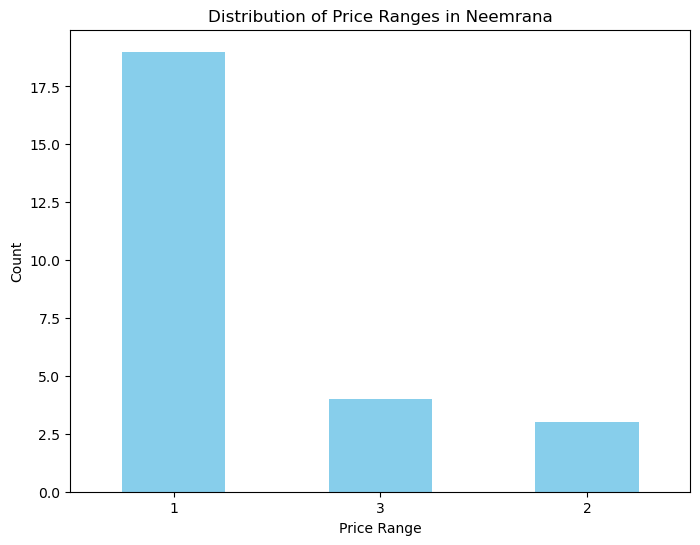

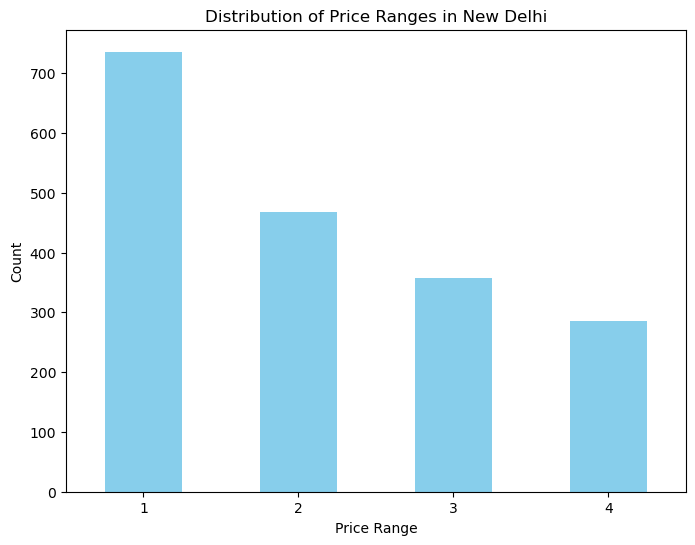

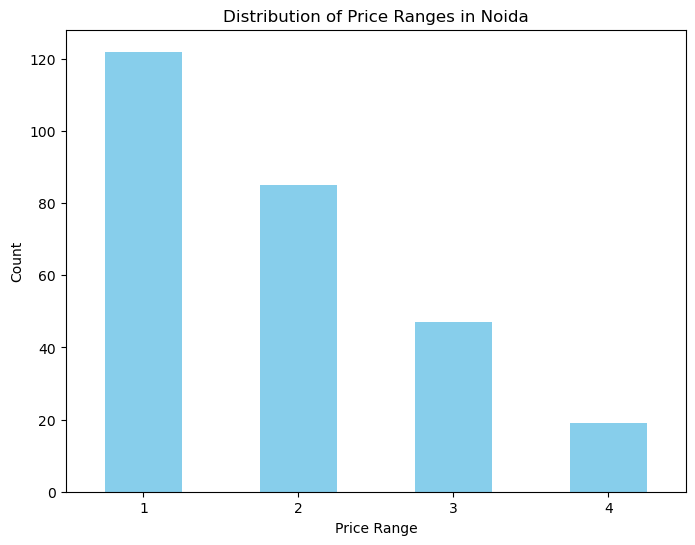

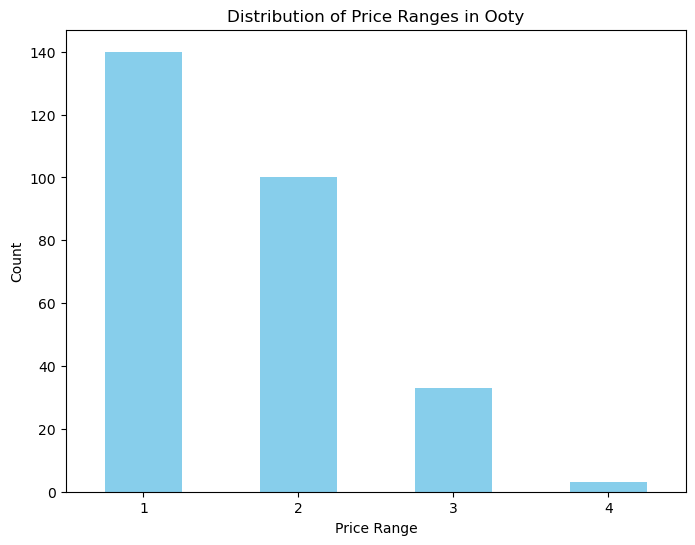

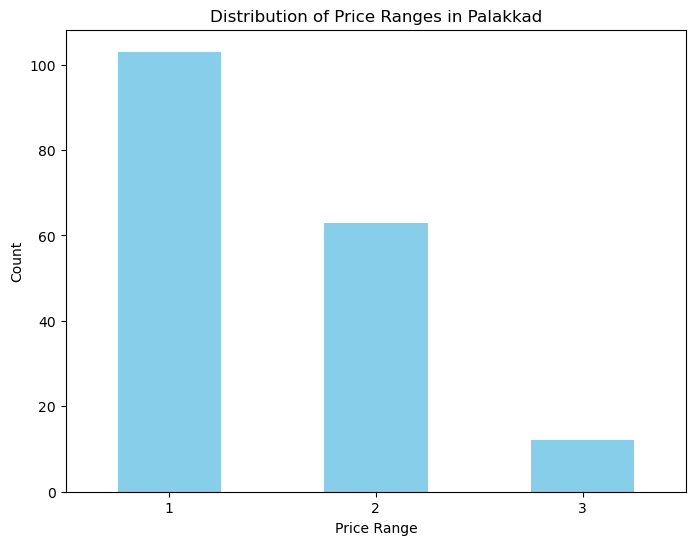

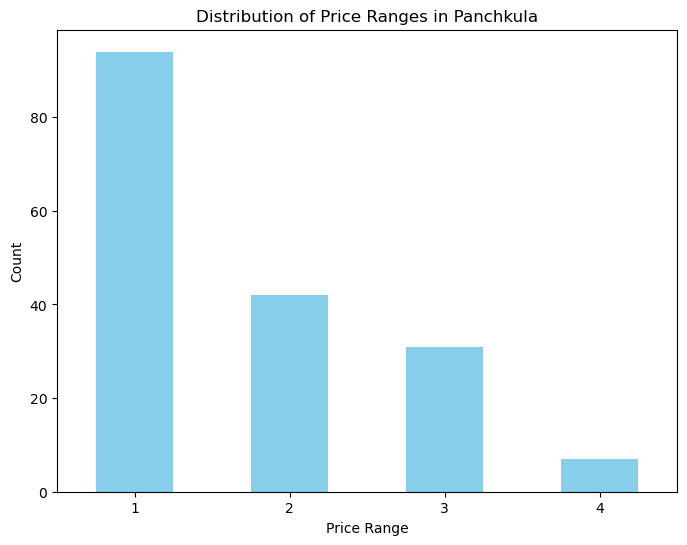

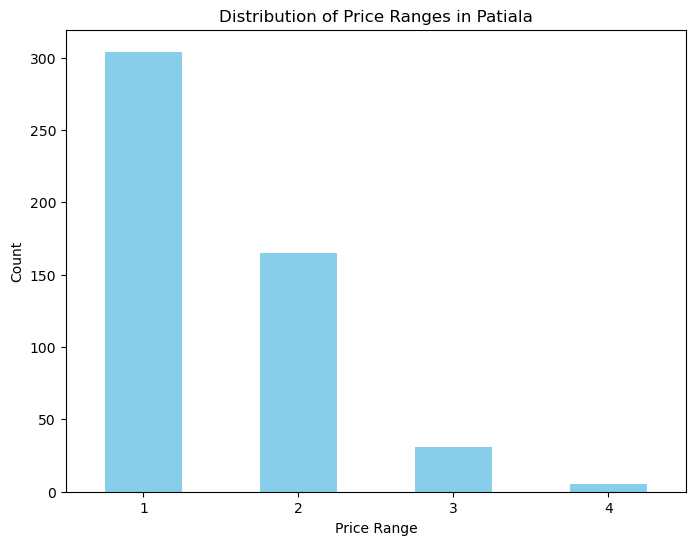

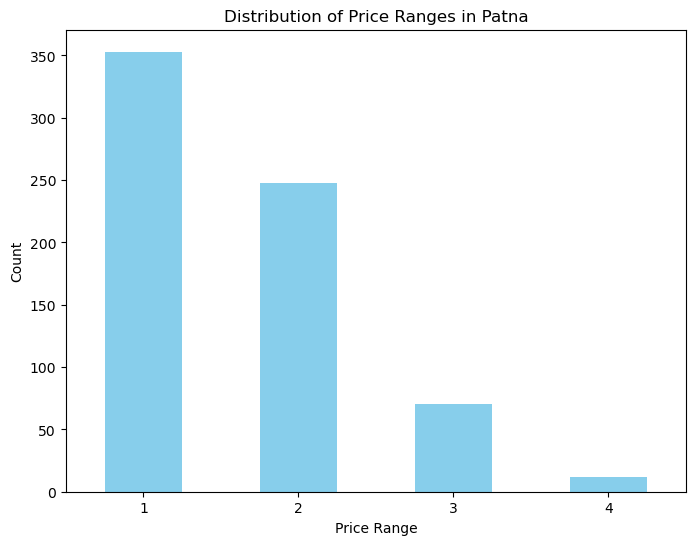

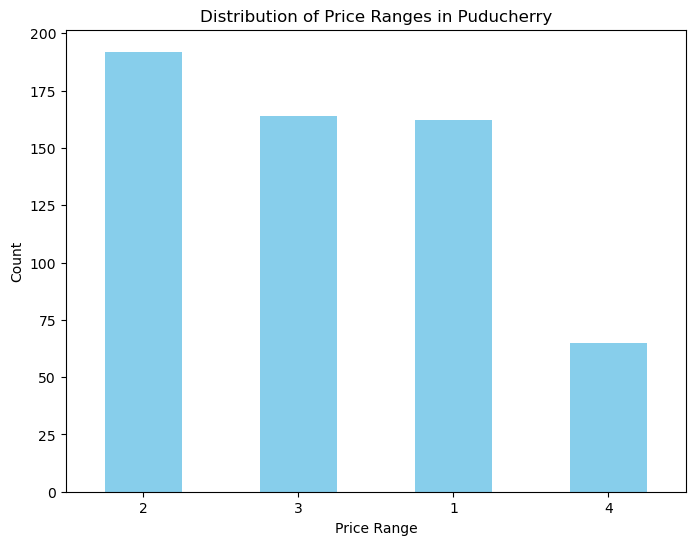

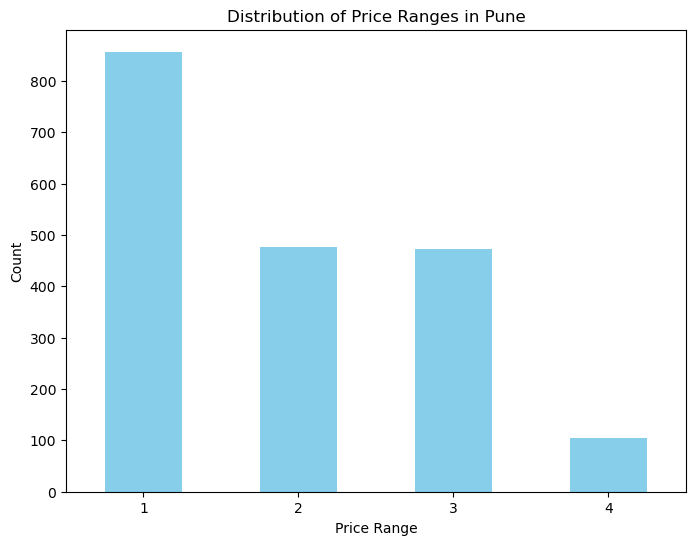

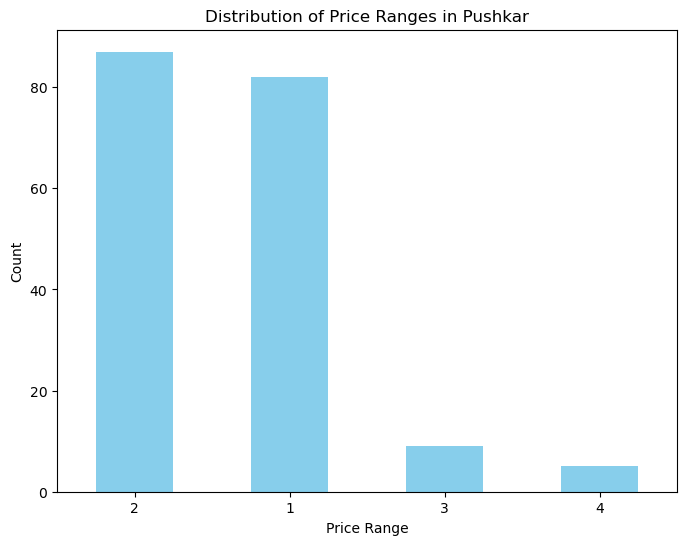

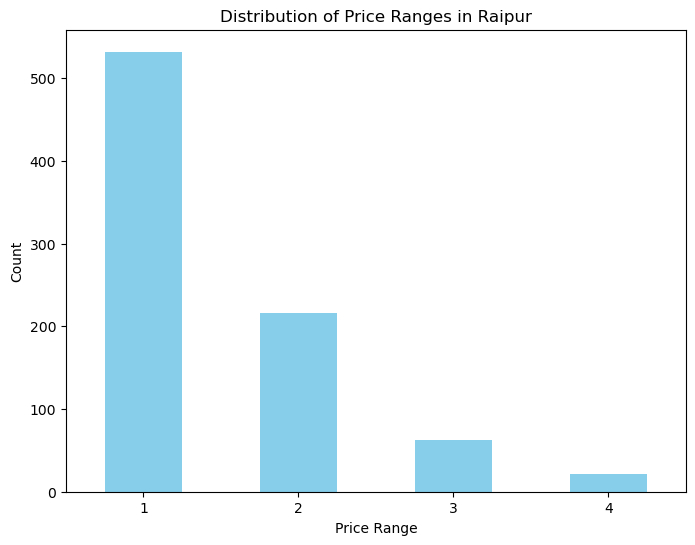

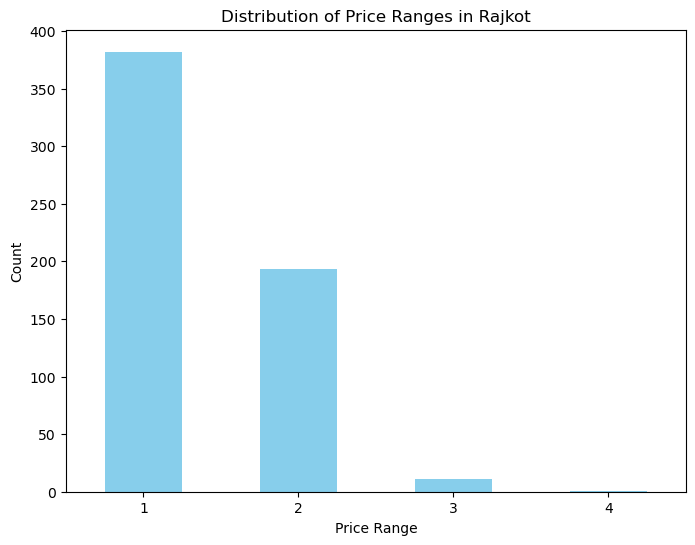

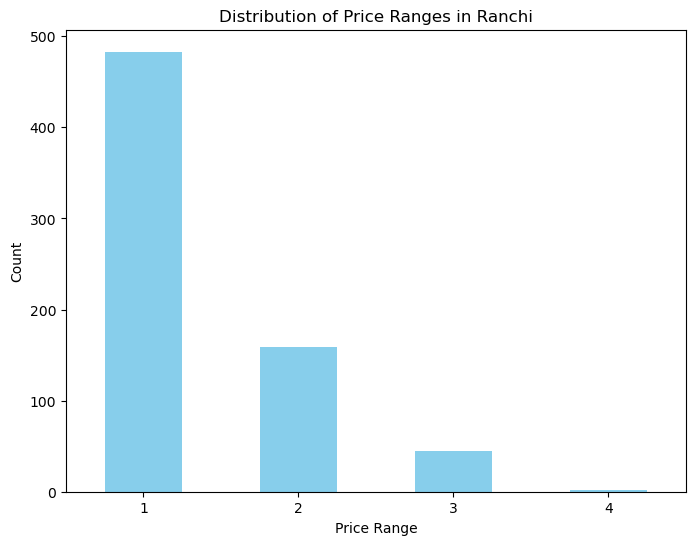

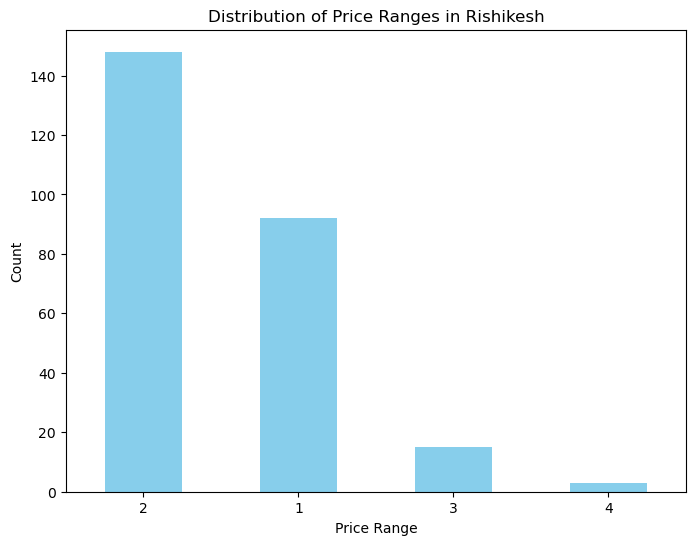

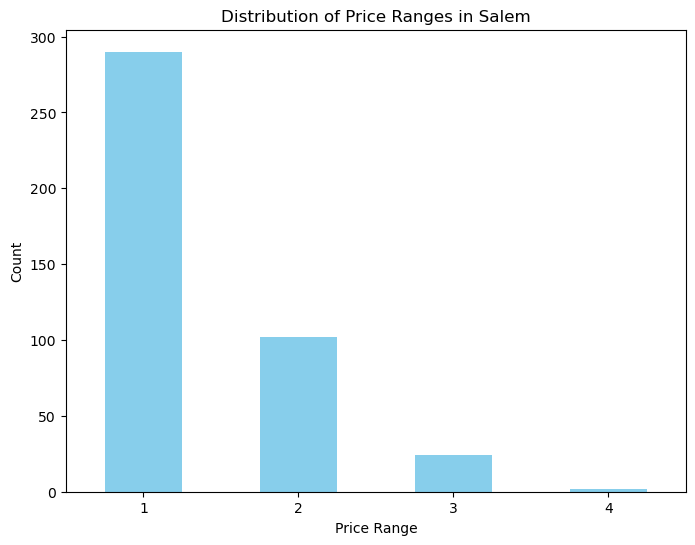

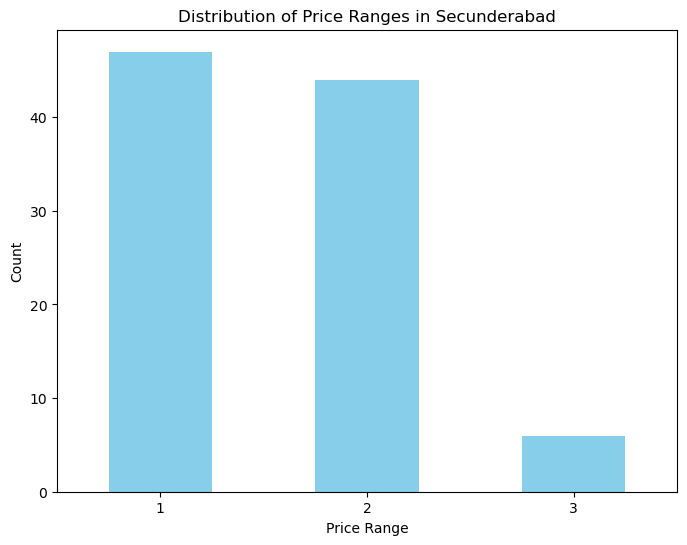

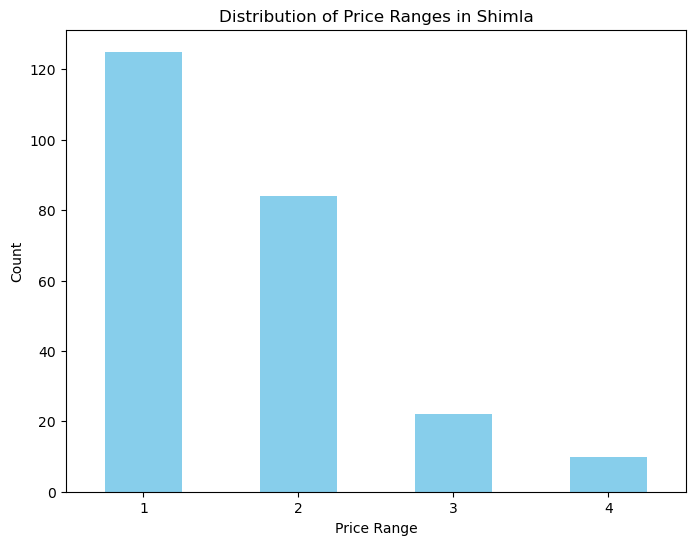

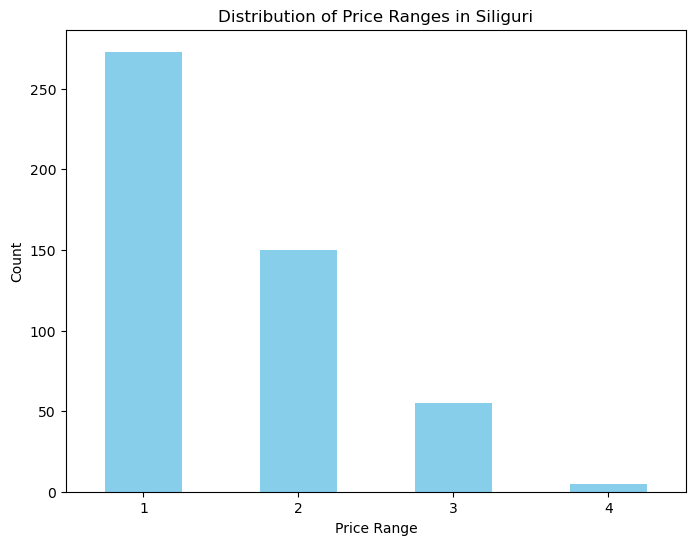

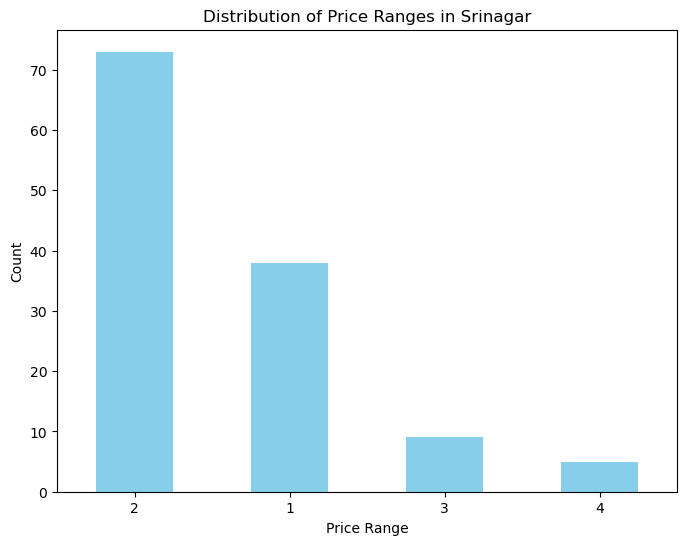

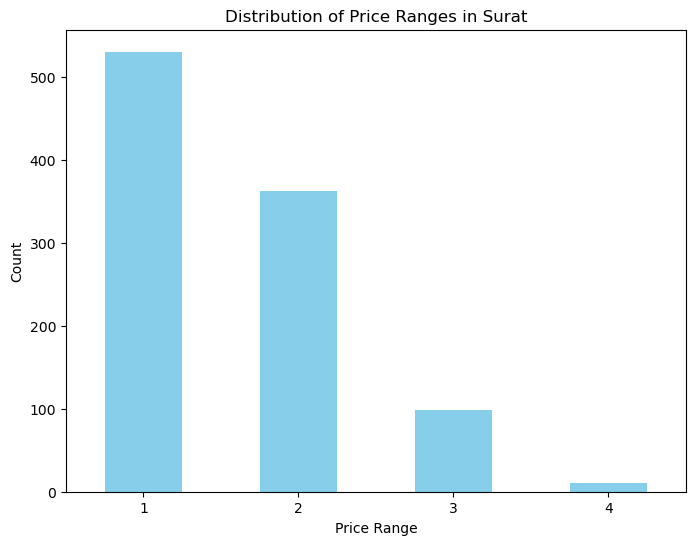

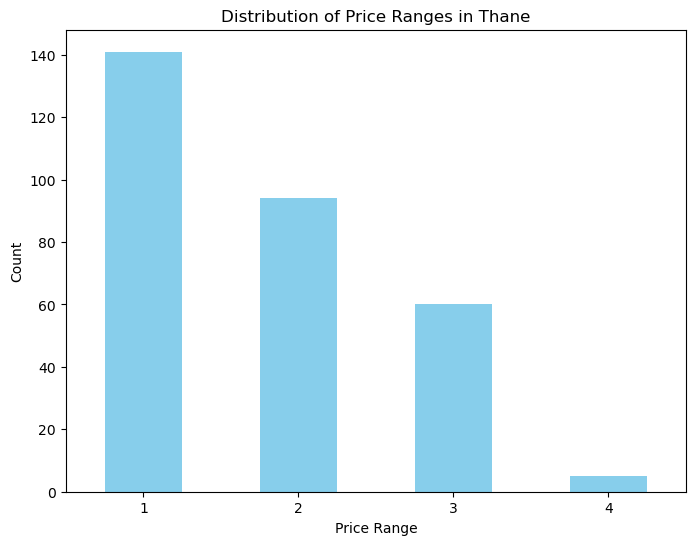

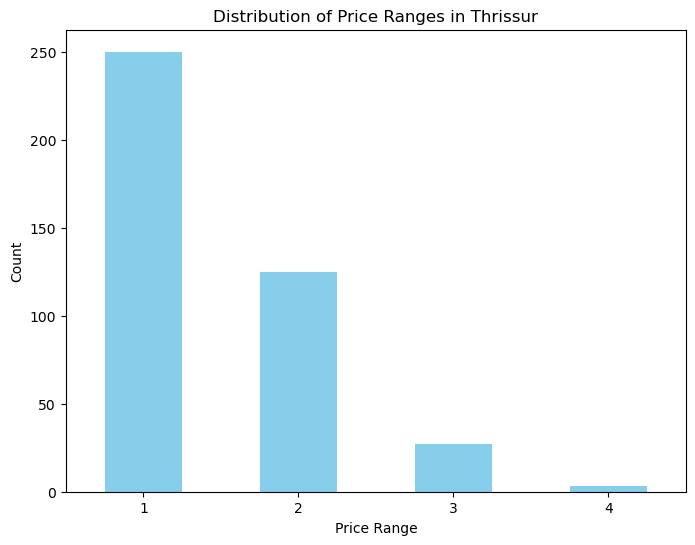

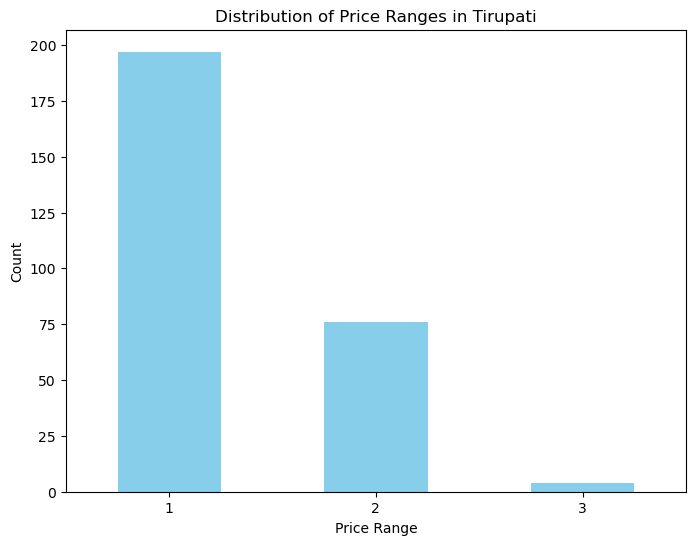

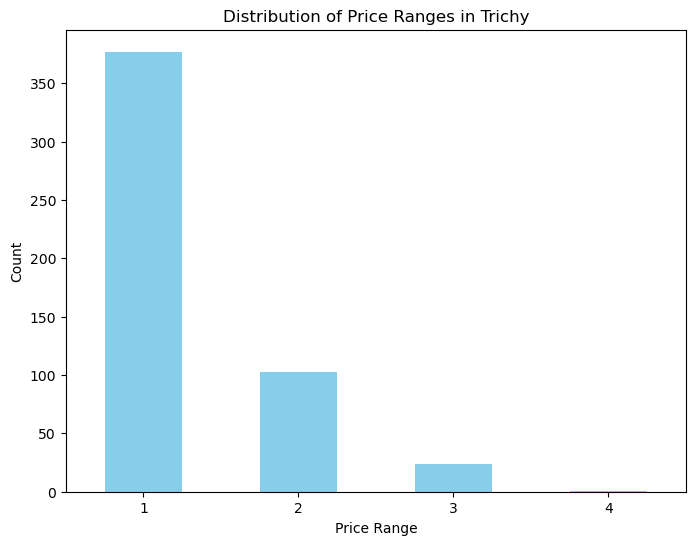

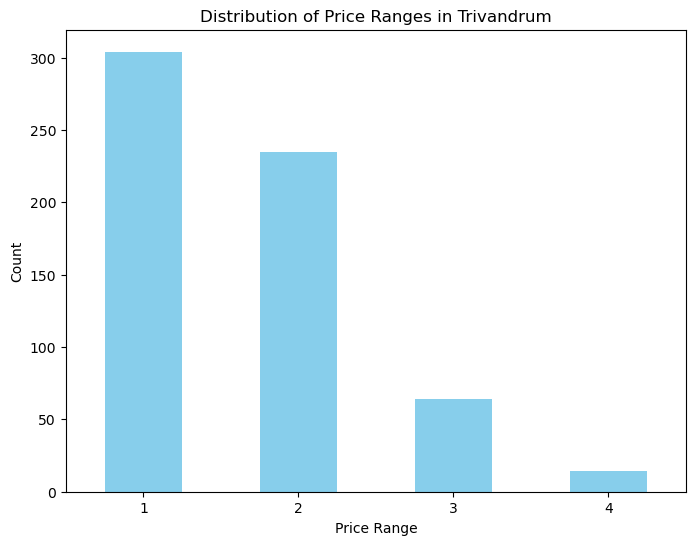

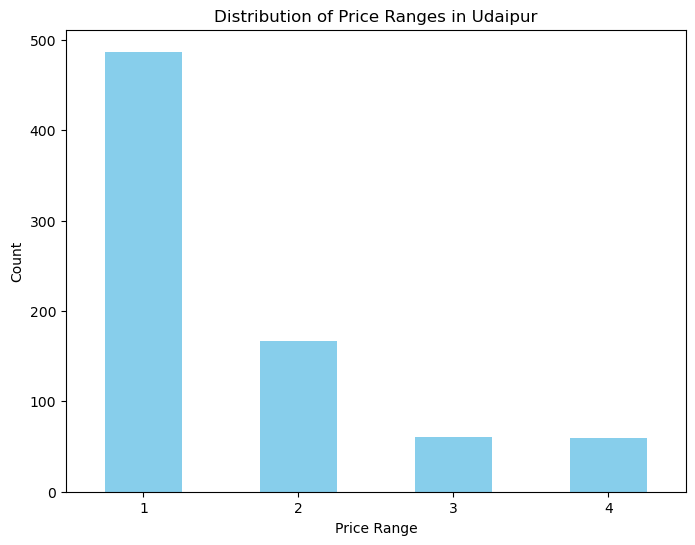

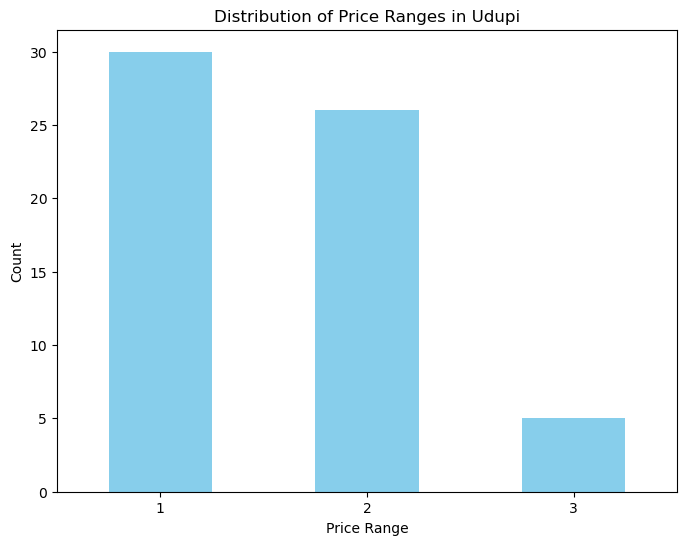

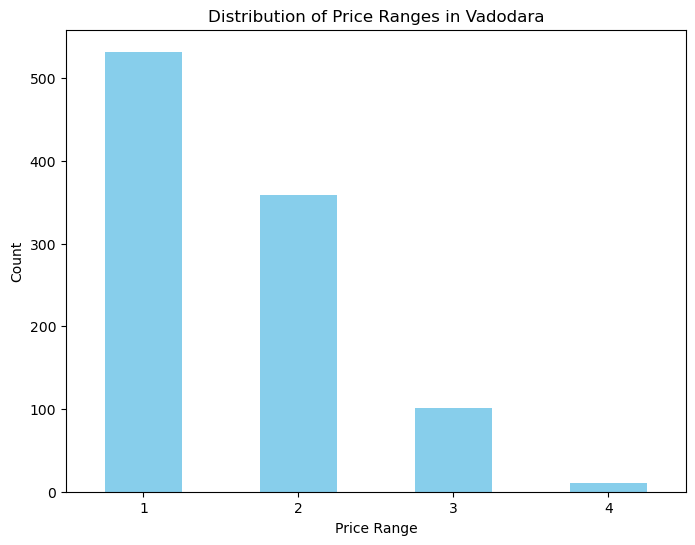

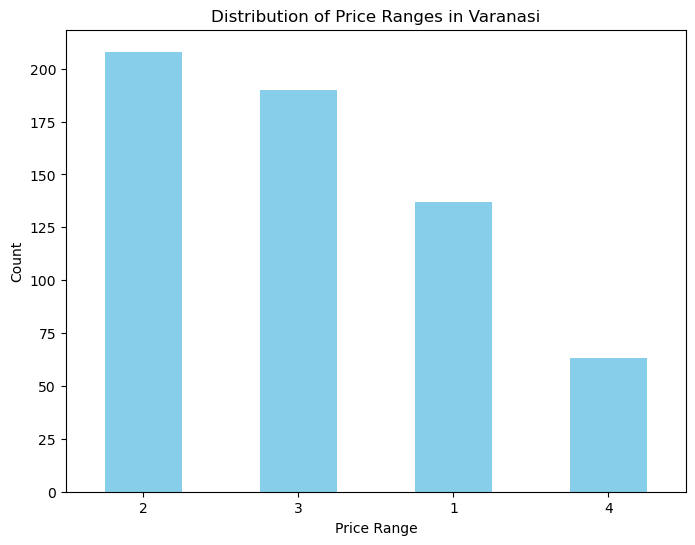

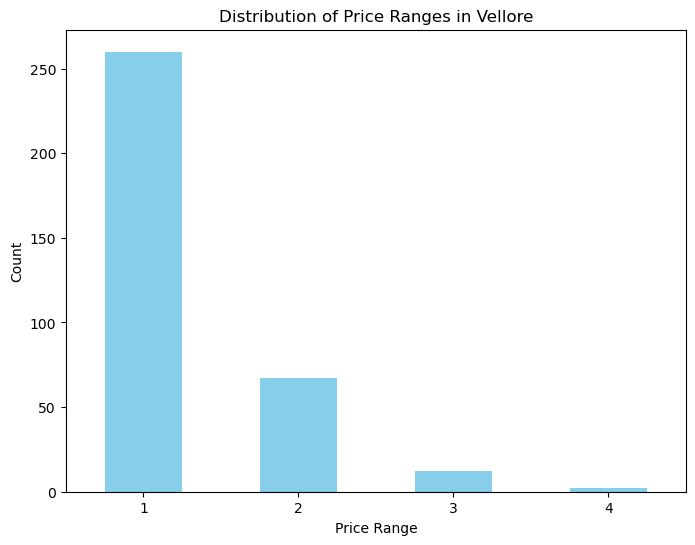

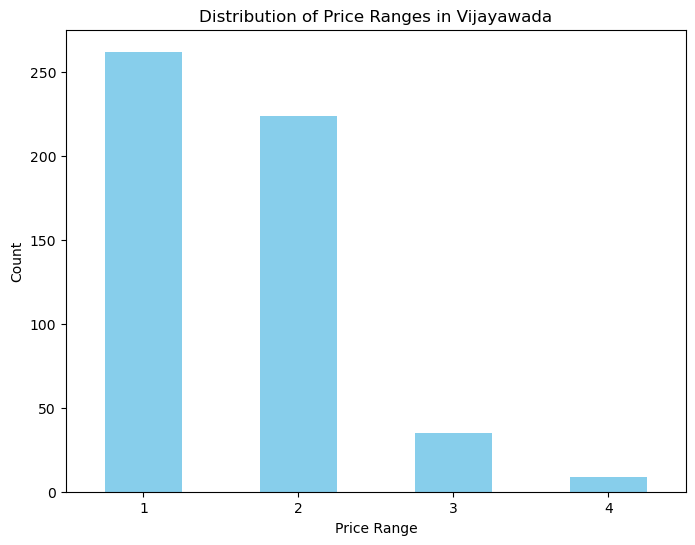

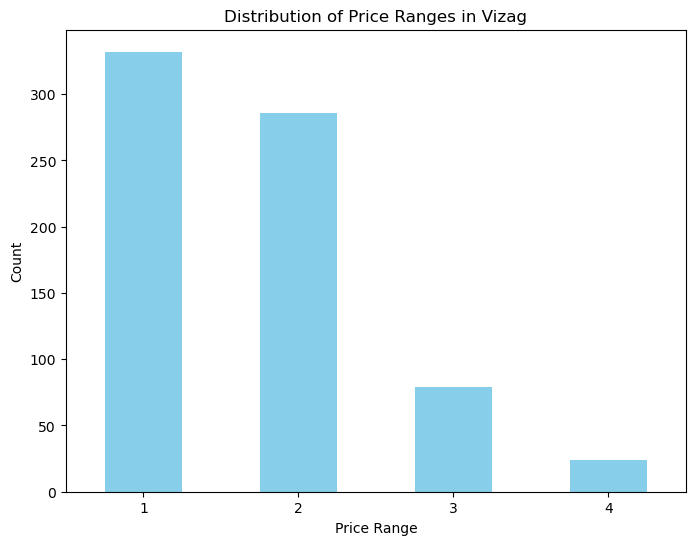

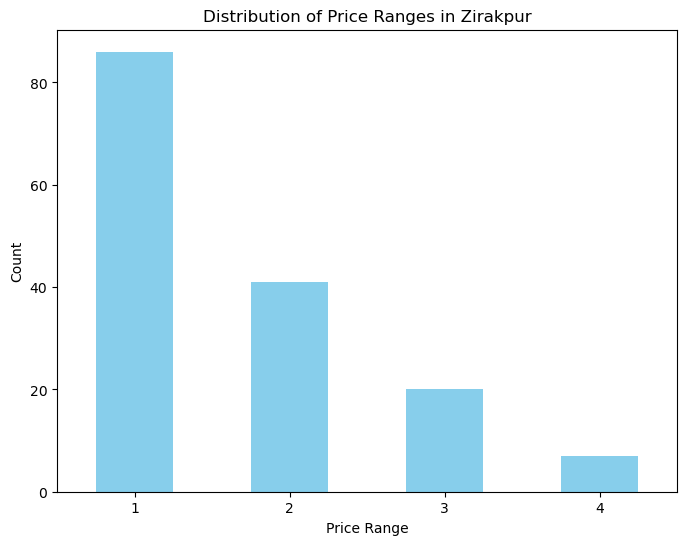

In [164]:
# Group data by region (e.g., city or locality)
region_groups = df.groupby('city')

# Analyze key attributes for each region
for region, data in region_groups:
    # Calculate average rating
    avg_rating = data['aggregate_rating'].mean()
    
    # Count of restaurants by price range
    price_range_counts = data['price_range'].value_counts()
    
    # Plot distribution of price ranges
    plt.figure(figsize=(8, 6))
    price_range_counts.plot(kind='bar', color='skyblue')
    plt.title(f'Distribution of Price Ranges in {region}')
    plt.xlabel('Price Range')
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.show()


Enter the city name: Goa


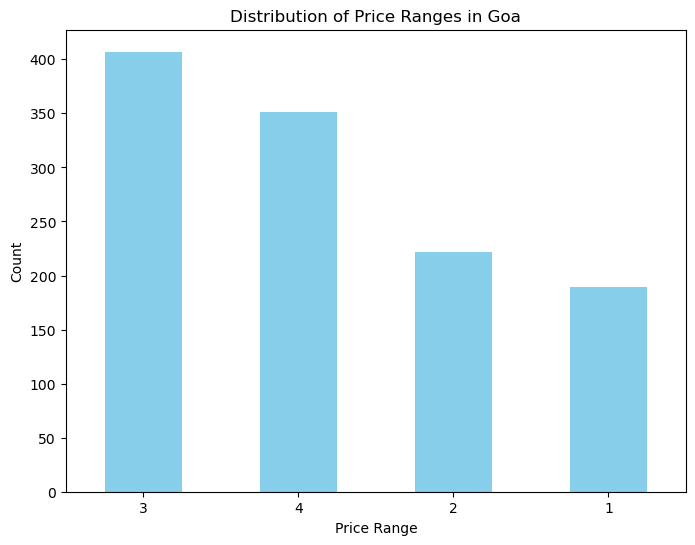

In [167]:
# Get user input for city 
city = input("Enter the city name: ")

# Filter data for the specified city
city_data = df[df['city'] == city]

# Check if data exists for the specified city
if city_data.empty:
    print(f"No data available for {city}. Please try a different city.")
else:
    # Calculate average rating
    avg_rating = city_data['aggregate_rating'].mean()
    
    # Count of restaurants by price range
    price_range_counts = city_data['price_range'].value_counts()
    
    # Plot distribution of price ranges
    plt.figure(figsize=(8, 6))
    price_range_counts.plot(kind='bar', color='skyblue')
    plt.title(f'Distribution of Price Ranges in {city}')
    plt.xlabel('Price Range')
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.show()


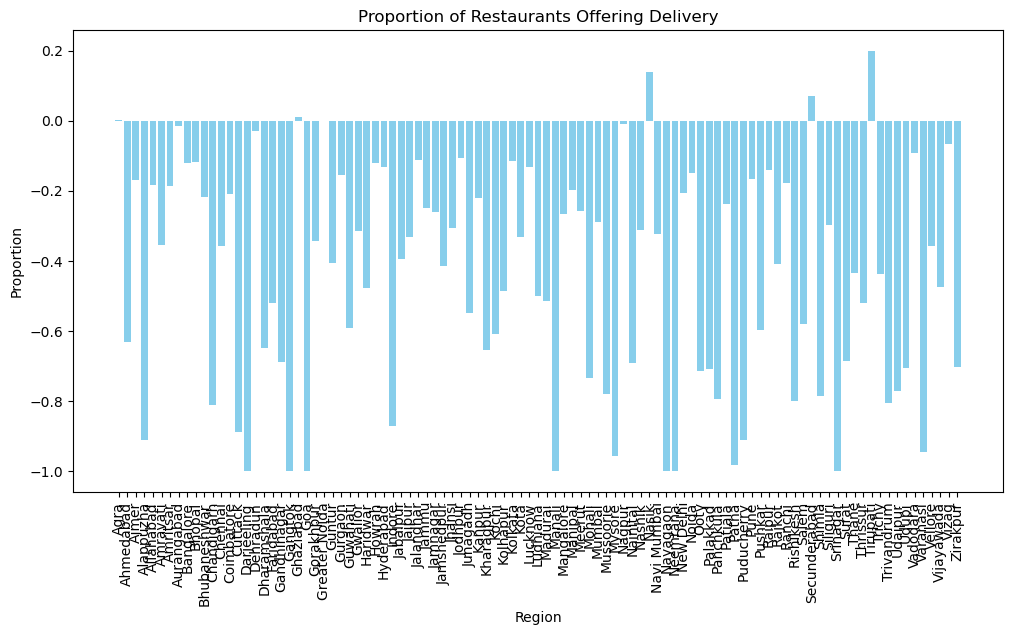

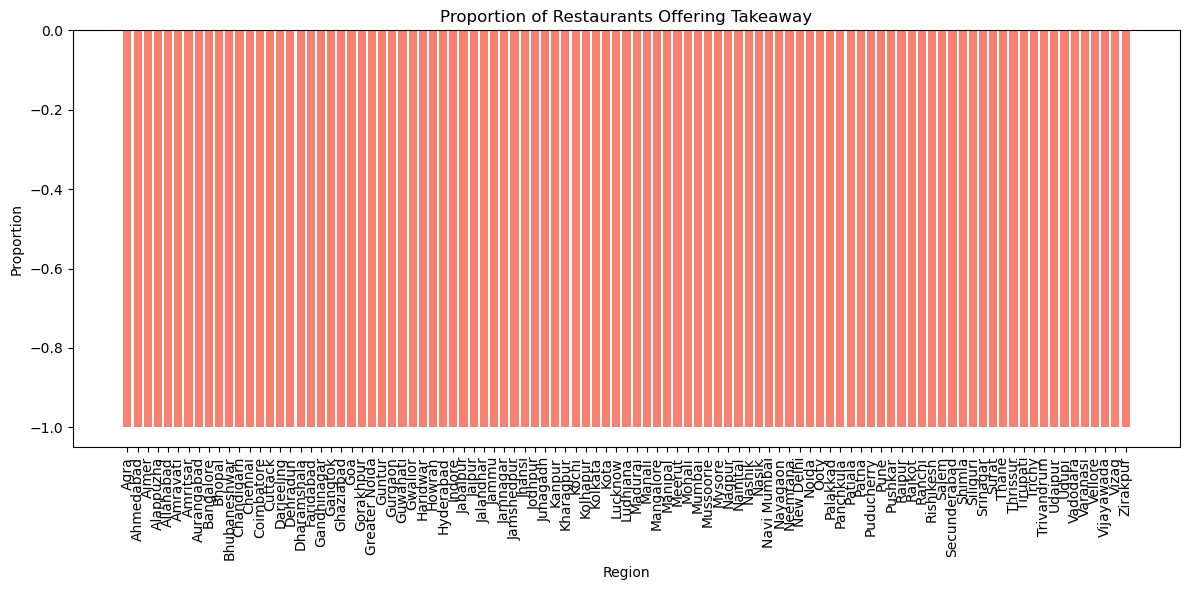

In [68]:
import matplotlib.pyplot as plt

# Group data by region (e.g., city or locality)
region_groups = df.groupby('city')

# Initialize lists to store proportions of delivery and takeaway services
delivery_proportions = []
takeaway_proportions = []

# Analyze key attributes for each region
for region, data in region_groups:
    # Calculate proportions of delivery and takeaway services
    total_restaurants = len(data)
    delivery_count = data['delivery'].sum()  # Count of restaurants offering delivery
    takeaway_count = data['takeaway'].sum()  # Count of restaurants offering takeaway
    
    delivery_proportion = delivery_count / total_restaurants
    takeaway_proportion = takeaway_count / total_restaurants
    
    delivery_proportions.append(delivery_proportion)
    takeaway_proportions.append(takeaway_proportion)

# Visualize proportions of delivery and takeaway services for each region
plt.figure(figsize=(12, 6))
plt.bar(region_groups.groups.keys(), delivery_proportions, color='skyblue')
plt.title('Proportion of Restaurants Offering Delivery')
plt.xlabel('Region')
plt.ylabel('Proportion')
plt.xticks(rotation=90)

plt.figure(figsize=(12, 6))
plt.bar(region_groups.groups.keys(), takeaway_proportions, color='salmon')
plt.title('Proportion of Restaurants Offering Takeaway')
plt.xlabel('Region')
plt.ylabel('Proportion')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


In [70]:
df.establishment.unique()

array(['Quick Bites', 'Casual Dining', 'Bakery', 'Café', 'Dhaba',
       'Bhojanalya', 'Bar', 'Sweet Shop', 'Fine Dining', 'Food Truck',
       'Dessert Parlour', 'Lounge', 'Pub', 'Beverage Shop', 'Kiosk',
       'Paan Shop', 'Confectionery', '', 'Shack', 'Club', 'Food Court',
       'Mess', 'Butcher Shop', 'Microbrewery', 'Cocktail Bar', 'Pop up',
       'Irani Cafe'], dtype=object)

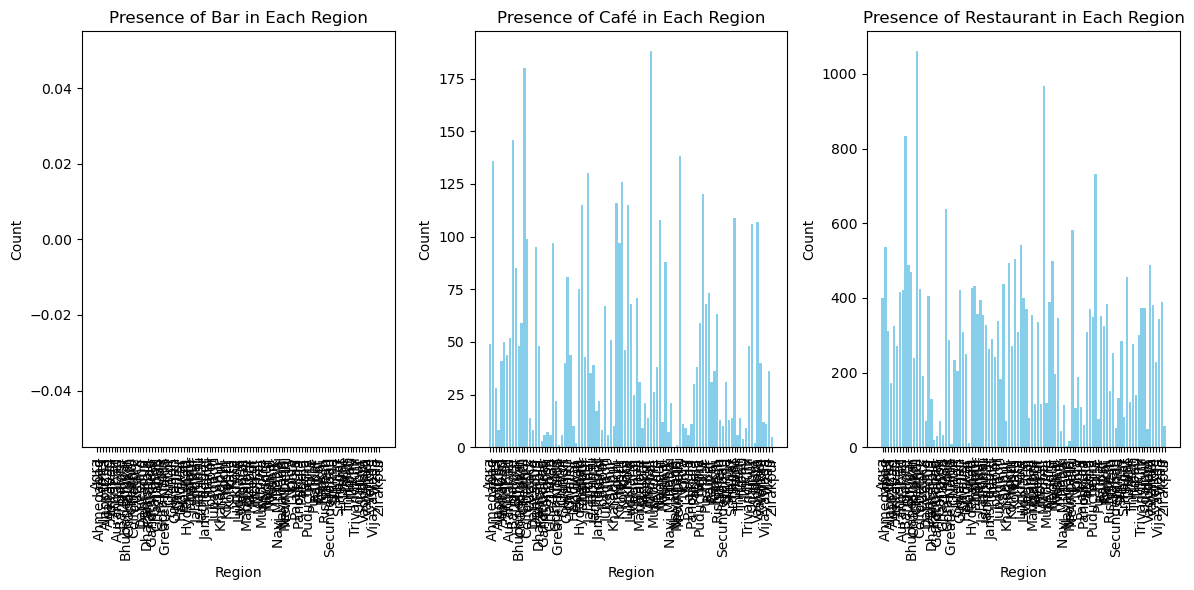

In [74]:
# Group data by city
region_groups = df.groupby('city')

# Get the frequency of each establishment type
establishment_counts = df['establishment'].value_counts()

# Select the top N most common establishment types to focus on
top_n_types = establishment_counts.head(5).index  # Adjust the number as needed

# Group less common types into broader categories
# Example: Grouping different types of bars into a single category
broad_categories = {
    'Bar': ['Bar', 'Cocktail Bar'],
    'Café': ['Café', 'Coffee Shop', 'Tea Room'],
    'Restaurant': ['Quick Bites', 'Casual Dining', 'Fine Dining']
}

# Initialize dictionaries to store counts of establishment types for each region
establishment_counts_per_region = {cat: [] for cat in broad_categories}

# Analyze key attributes for each region
for region, data in region_groups:
    # Initialize counts for each broad category
    region_est_counts = {cat: 0 for cat in broad_categories}
    
    # Count the number of restaurants of each establishment type in the region
    for est_type in top_n_types:
        for cat, subtypes in broad_categories.items():
            if est_type in subtypes:
                region_est_counts[cat] += (data['establishment'] == est_type).sum()
                break
    
    # Append counts to the respective lists
    for cat in broad_categories:
        establishment_counts_per_region[cat].append(region_est_counts[cat])

# Visualize presence of establishment categories for each region
plt.figure(figsize=(12, 6))

for idx, cat in enumerate(broad_categories, start=1):
    plt.subplot(1, len(broad_categories), idx)
    plt.bar(region_groups.groups.keys(), establishment_counts_per_region[cat], color='skyblue')
    plt.title(f'Presence of {cat} in Each Region')
    plt.xlabel('Region')
    plt.ylabel('Count')
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


In [77]:
df.cuisines.unique()

array(['North Indian, South Indian, Mithai, Street Food, Desserts',
       'North Indian, Mughlai, Rolls, Chinese, Fast Food, Street Food',
       'Fast Food, Mithai', ...,
       'Street Food, Biryani, Chinese, Fast Food, North Indian, Mughlai',
       'North Indian, Chinese, Mexican, Italian, Thai, Continental',
       'North Indian, Lucknowi, Chinese'], dtype=object)

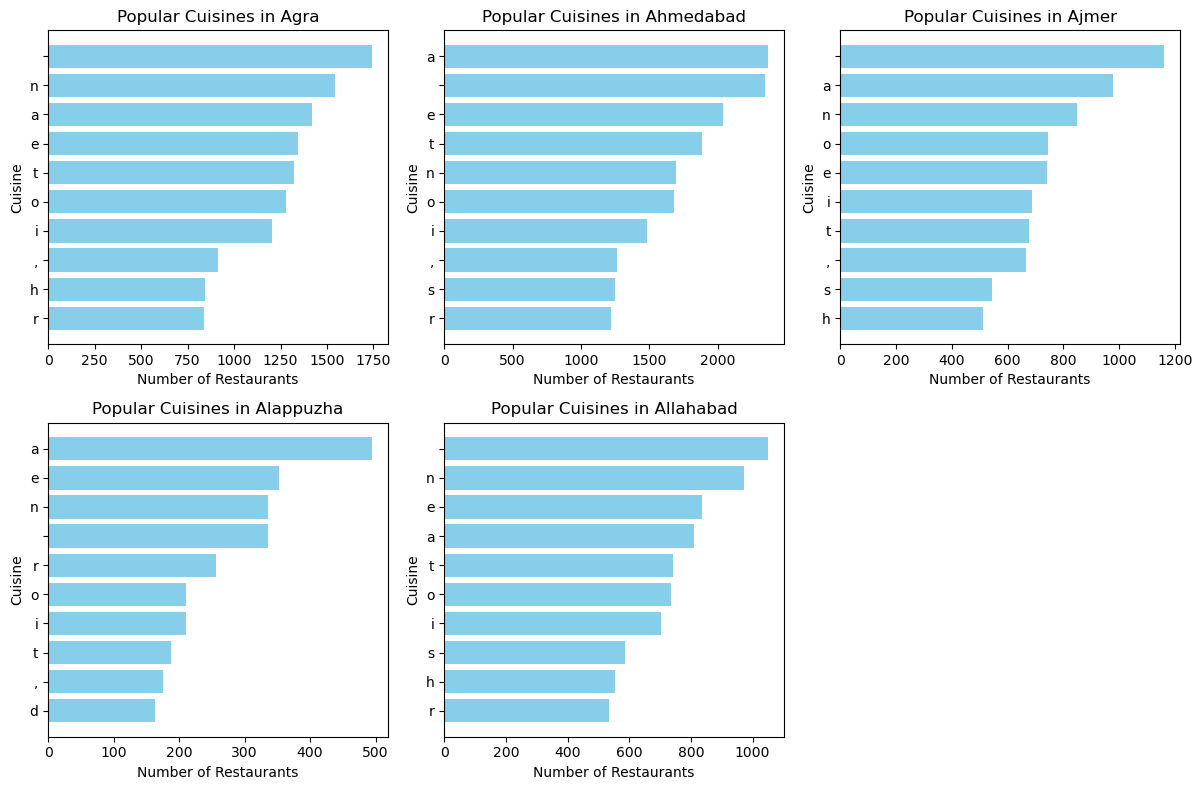

In [76]:
# Group data by city
region_groups = df.groupby('city')

# Initialize a dictionary to store cuisine counts for each region
cuisine_counts_per_region = {}

# Analyze types of cuisines popular in different regions
for region, data in region_groups:
    # Combine cuisines from all restaurants in the region into a single list
    all_cuisines = [cuisine.strip() for sublist in data['cuisines'] for cuisine in sublist]
    
    # Count the occurrences of each cuisine
    cuisine_counts = {}
    for cuisine in all_cuisines:
        cuisine_counts[cuisine] = cuisine_counts.get(cuisine, 0) + 1
    
    # Sort the cuisine counts in descending order
    sorted_cuisine_counts = dict(sorted(cuisine_counts.items(), key=lambda item: item[1], reverse=True))
    
    # Store the sorted cuisine counts for the region
    cuisine_counts_per_region[region] = sorted_cuisine_counts

# Visualize popular cuisines in each region
plt.figure(figsize=(12, 8))

num_regions_to_display = 5  # Number of regions to display (adjust as needed)

for idx, (region, cuisine_counts) in enumerate(cuisine_counts_per_region.items()):
    if idx >= num_regions_to_display:
        break
    
    top_cuisines = list(cuisine_counts.keys())[:10]  # Display top 10 cuisines
    counts = list(cuisine_counts.values())[:10]
    
    plt.subplot(2, 3, idx + 1)
    plt.barh(top_cuisines, counts, color='skyblue')
    plt.title(f'Popular Cuisines in {region}')
    plt.xlabel('Number of Restaurants')
    plt.ylabel('Cuisine')
    plt.gca().invert_yaxis()  # Invert y-axis to display top cuisines at the top

plt.tight_layout()
plt.show()


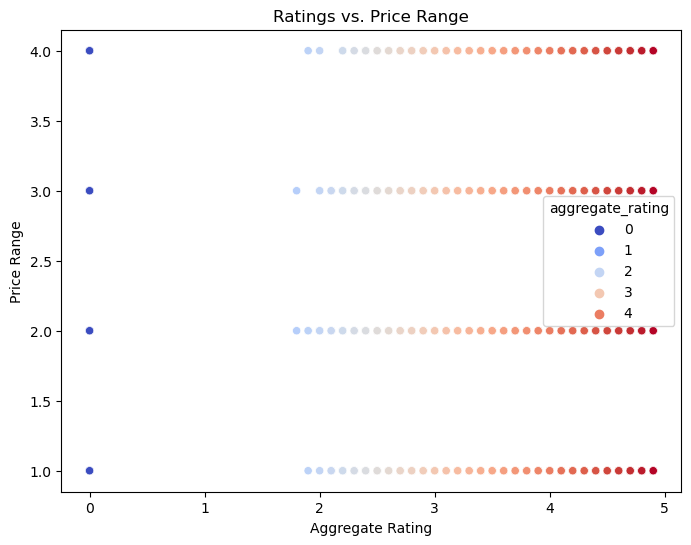

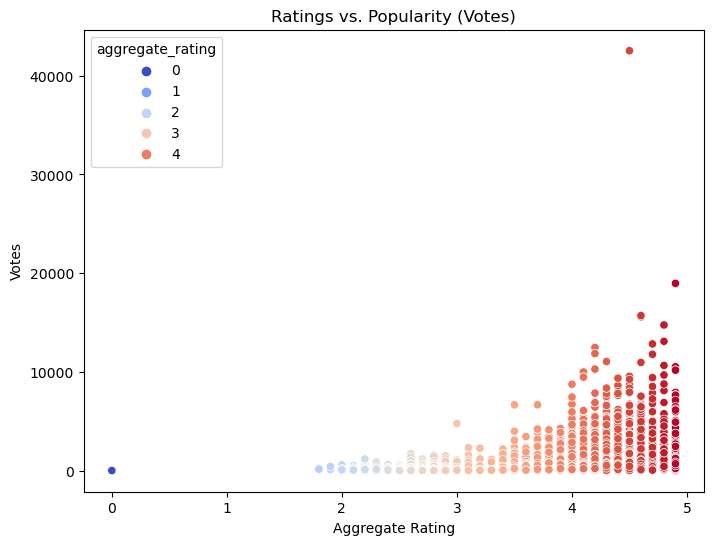

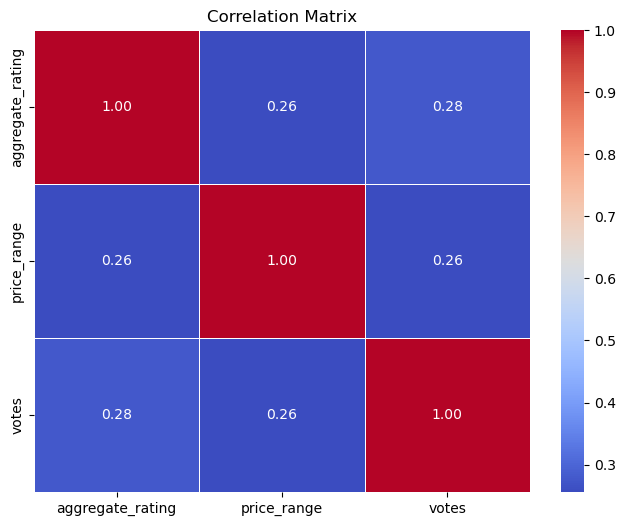

In [79]:
# Scatter plot: Ratings vs. Price Range
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='aggregate_rating', y='price_range', hue='aggregate_rating', palette='coolwarm')
plt.title('Ratings vs. Price Range')
plt.xlabel('Aggregate Rating')
plt.ylabel('Price Range')
plt.show()

# Scatter plot: Ratings vs. Popularity (Votes)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='aggregate_rating', y='votes', hue='aggregate_rating', palette='coolwarm')
plt.title('Ratings vs. Popularity (Votes)')
plt.xlabel('Aggregate Rating')
plt.ylabel('Votes')
plt.show()

# Correlation Matrix
corr_matrix = df[['aggregate_rating', 'price_range', 'votes']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


# Competitive Analysis:

In [80]:
# Define a function to identify major competitors in each region
def identify_competitors(region_data):
    # Filter out restaurants with missing data
    region_data = region_data.dropna(subset=['aggregate_rating', 'price_range', 'cuisines'])
    
    # Identify unique cuisines in the region
    unique_cuisines = set()
    for cuisines in region_data['cuisines']:
        unique_cuisines.update(cuisines)
    
    # Initialize a dictionary to store competitor information
    competitors = {}
    
    # Iterate over each cuisine in the region
    for cuisine in unique_cuisines:
        # Filter restaurants offering the current cuisine
        cuisine_restaurants = region_data[region_data['cuisines'].apply(lambda x: cuisine in x)]
        
        # Consider restaurants with a price range similar to the median price range
        median_price_range = cuisine_restaurants['price_range'].median()
        competitors[cuisine] = cuisine_restaurants[cuisine_restaurants['price_range'] == median_price_range]
        
    return competitors

# Group data by region (e.g., city or locality)
region_groups = df.groupby('city')

# Iterate over each region to identify competitors
for region, data in region_groups:
    print(f"Competitors in {region}:")
    competitors = identify_competitors(data)
    for cuisine, restaurants in competitors.items():
        print(f"- Cuisine: {cuisine}, Number of Competitors: {len(restaurants)}")
    print()


Competitors in Agra:
- Cuisine: ,, Number of Competitors: 150
- Cuisine: u, Number of Competitors: 67
- Cuisine: B, Number of Competitors: 138
- Cuisine: I, Number of Competitors: 146
- Cuisine: W, Number of Competitors: 3
- Cuisine: m, Number of Competitors: 23
- Cuisine: c, Number of Competitors: 40
- Cuisine:  , Number of Competitors: 206
- Cuisine: j, Number of Competitors: 3
- Cuisine: k, Number of Competitors: 87
- Cuisine: D, Number of Competitors: 59
- Cuisine: e, Number of Competitors: 297
- Cuisine: H, Number of Competitors: 3
- Cuisine: L, Number of Competitors: 2
- Cuisine: N, Number of Competitors: 130
- Cuisine: b, Number of Competitors: 2
- Cuisine: d, Number of Competitors: 194
- Cuisine: R, Number of Competitors: 8
- Cuisine: i, Number of Competitors: 198
- Cuisine: l, Number of Competitors: 58
- Cuisine: U, Number of Competitors: 1
- Cuisine: v, Number of Competitors: 43
- Cuisine: M, Number of Competitors: 105
- Cuisine: G, Number of Competitors: 3
- Cuisine: z, Numb

In [56]:
# Group data by region (e.g., city)
region_groups = df.groupby('city')

# Initialize a list to store major competitor information
major_competitors = []

# Iterate over each region to identify major competitors
for region, data in region_groups:
    # Calculate aggregate statistics for competitors in the region
    num_restaurants = len(data)
    average_price = data['average_cost_for_two'].mean()
    aggregate_rating = data['aggregate_rating'].mean()
    
    # Identify major competitors based on criteria (e.g., number of restaurants, ratings)
    major_competitor = data[data['aggregate_rating'] > 4.0]  # Example criteria for major competitor
    
    # Append major competitor information to list
    if not major_competitor.empty:
        major_competitor_info = {
            'City': region,
            'Competitor': major_competitor['name'].values[0],
            'Num_Restaurants': num_restaurants,
            'Average_Price': average_price,
            'Aggregate_Rating': aggregate_rating
        }
        major_competitors.append(major_competitor_info)

# Create DataFrame from the list of major competitors
major_competitors_df = pd.DataFrame(major_competitors)

# Sort major competitors by aggregate rating (optional)
major_competitors_df = major_competitors_df.sort_values(by='Aggregate_Rating', ascending=False)

# Print major competitors
print("Major Competitors:")
print(major_competitors_df)


Major Competitors:
            City                   Competitor  Num_Restaurants  Average_Price  \
23       Gurgaon         The Drunken Botanist              663    1025.384615   
71  Secunderabad        Blue Sea Tea & Snacks               97     506.185567   
50        Mumbai                  Drinkery 51             2538    1101.773050   
27     Hyderabad  Adaa - Taj Falaknuma Palace              866     847.322171   
59     New Delhi           Plum By Bent Chair             1847    1018.305360   
..           ...                          ...              ...            ...   
40      Kolhapur                 Akkis Bistro              567     320.440917   
54      Nainital              Zooby's Kitchen              246     295.325203   
61          Ooty                Earl's Secret              276     424.818841   
13    Darjeeling  Glenary's Restaurant  & Bar              116     416.250000   
67       Pushkar                  La Pizzeria              183     385.901639   

    Aggr

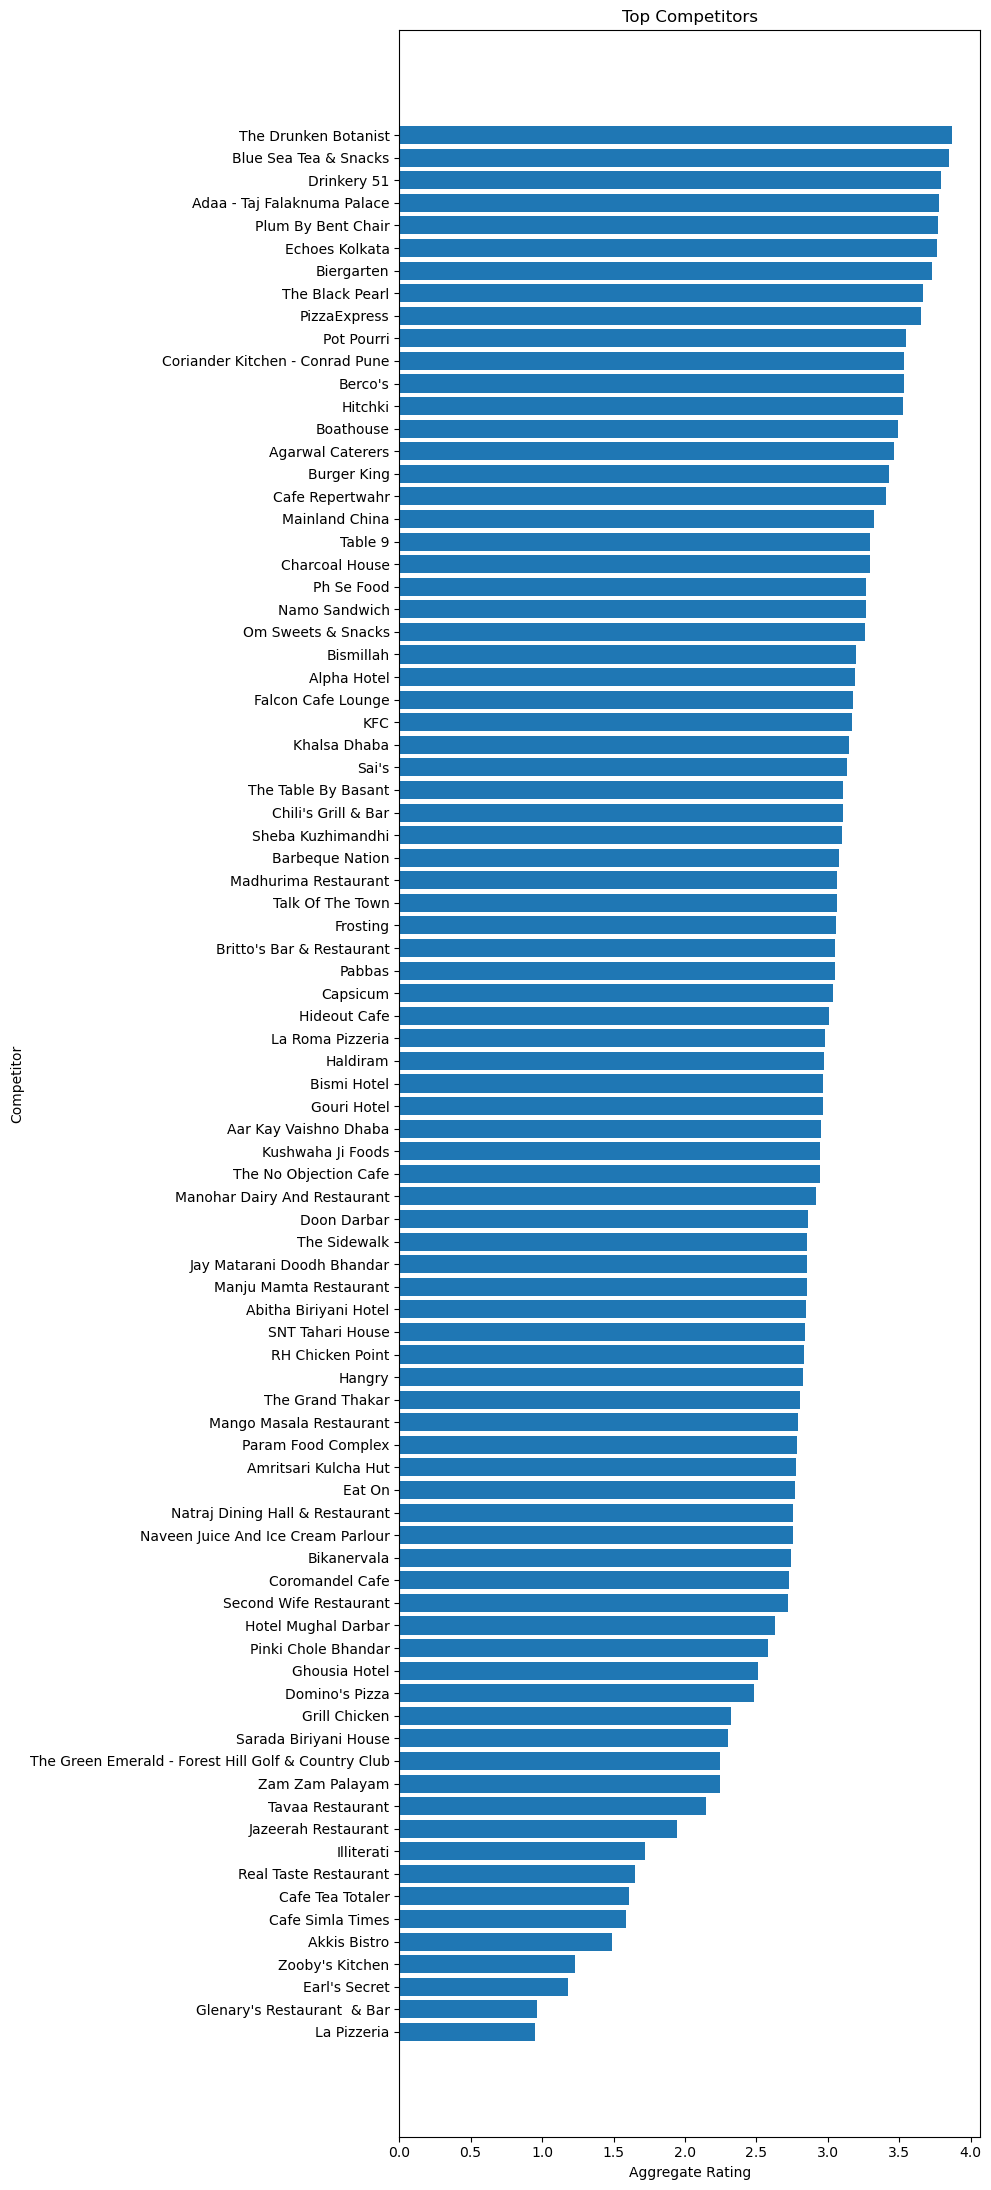

In [62]:
# Define function to visualize top competitors in each region
def visualize_top_competitors(top_competitors_df):
    plt.figure(figsize=(10, 22))

    # Sort data by aggregate rating before plotting
    top_competitors_df_sorted = top_competitors_df.sort_values(by='Aggregate_Rating', ascending=False)

    # Plot the sorted data
    plt.barh(top_competitors_df_sorted['Competitor'], top_competitors_df_sorted['Aggregate_Rating'])
    
    plt.xlabel('Aggregate Rating')
    plt.ylabel('Competitor')
    plt.title('Top Competitors')
    plt.gca().invert_yaxis()  # Invert y-axis to display competitors from top to bottom
    plt.tight_layout()
    plt.show()

# Sample usage: visualize top competitors
visualize_top_competitors(major_competitors_df)


In [73]:
unique_ratings = df['aggregate_rating'].unique()
print(unique_ratings)


[4.4 4.2 4.3 4.9 4.  3.8 3.4 4.1 3.5 4.6 3.9 3.6 4.5 4.7 3.7 4.8 3.2 0.
 3.3 2.8 3.1 2.6 3.  2.7 2.9 2.2 2.3 2.4 2.5 2.1 1.8 2.  1.9]


In [99]:
# Filter the DataFrame to include only rows where 'aggregate_rating' is greater than 4.0
top_performers = df[df['aggregate_rating'] > 4.0].head(30)

# Create a table from the top performers
table_headers = ["Competitor", "Aggregate Rating"]
table = tabulate(top_performers[['name', 'aggregate_rating']], headers=table_headers, tablefmt="grid")

# Print the table
print(table)





+----+---------------------------------------+--------------------+
|    | Competitor                            |   Aggregate Rating |
+====+=======================================+====================+
|  0 | Bikanervala                           |                4.4 |
+----+---------------------------------------+--------------------+
|  1 | Mama Chicken Mama Franky House        |                4.4 |
+----+---------------------------------------+--------------------+
|  2 | Bhagat Halwai                         |                4.2 |
+----+---------------------------------------+--------------------+
|  3 | Bhagat Halwai                         |                4.3 |
+----+---------------------------------------+--------------------+
|  4 | The Salt Cafe Kitchen & Bar           |                4.9 |
+----+---------------------------------------+--------------------+
|  6 | Honeydew Restaurant                   |                4.2 |
+----+---------------------------------------+--

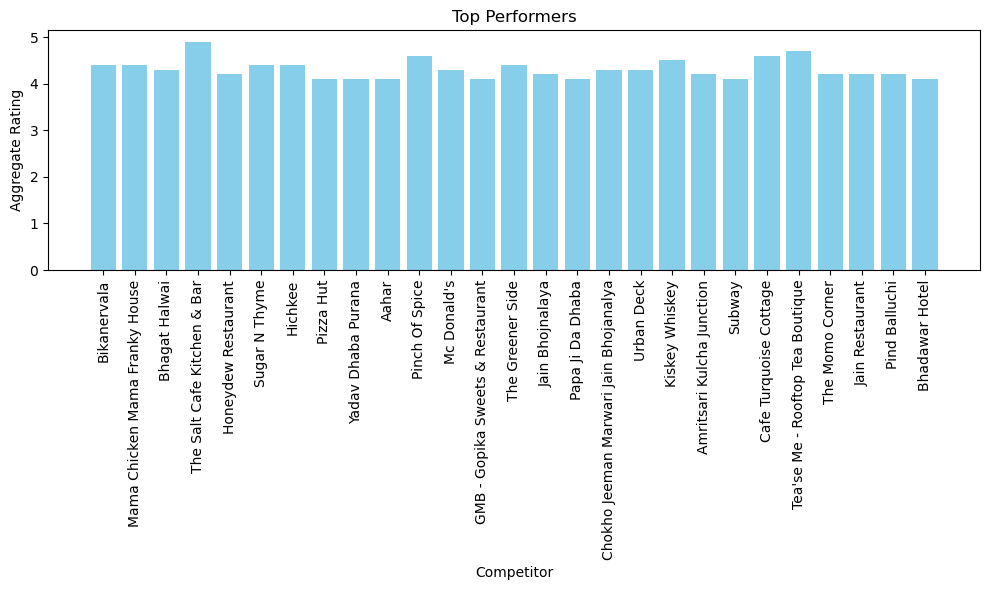

In [100]:
import matplotlib.pyplot as plt

# Plotting the top performers
plt.figure(figsize=(10, 6))
plt.bar(top_performers['name'], top_performers['aggregate_rating'], color='skyblue')
plt.xlabel('Competitor')
plt.ylabel('Aggregate Rating')
plt.title('Top Performers')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


In [138]:
Major_Competitors = df.nlargest(10, 'aggregate_rating')[['name', 'aggregate_rating']]  # Renaming column for clarity

print("Top 10 Competitors:")
print(Major_Competitors.to_string(index=False))

Top 10 Competitors:
                             name  aggregate_rating
      The Salt Cafe Kitchen & Bar               4.9
      The Salt Cafe Kitchen & Bar               4.9
                       Buttercupp               4.9
                   Yanki Sizzlers               4.9
                   Yanki Sizzlers               4.9
TG’s - The Oriental Grill - Hyatt               4.9
                   Hotel Abdullah               4.9
                 La Roma Pizzeria               4.9
                       Green Leaf               4.9
                       Green Leaf               4.9


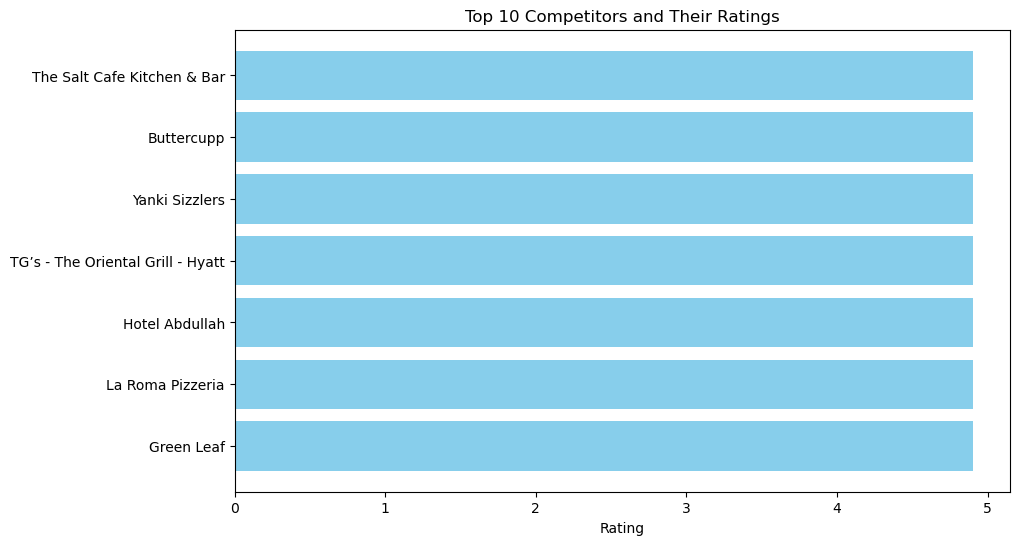

In [139]:
# Plotting the data
plt.figure(figsize=(10, 6))
plt.barh(Major_Competitors['name'], Major_Competitors['aggregate_rating'], color='skyblue')
plt.xlabel('Rating')
plt.title('Top 10 Competitors and Their Ratings')
plt.gca().invert_yaxis()  # Invert y-axis to display highest rating at the top
plt.show()

In [102]:
# Assuming 'top_performers' contains the DataFrame of top performers

# Define the criteria for strengths based on the given columns
def determine_strengths(row):
    strengths = []
    if row['aggregate_rating'] >= 4.0:
        strengths.append('High aggregate rating')
    if row['price_range'] == 3:  # Assuming 3 indicates a higher price range
        strengths.append('Higher price range')
    if 'Italian' in row['cuisines']:  # Example: Italian cuisine is popular
        strengths.append('Popular Italian cuisine')
    if 'Outdoor Seating' in row['highlights']:  # Example: Outdoor seating is a positive feature
        strengths.append('Outdoor seating available')
    return ', '.join(strengths)

# Apply the function to each row to determine strengths
top_performers['Strengths'] = top_performers.apply(determine_strengths, axis=1)

table_headers = ["Competitor", "Strengths"]
table = tabulate(top_performers[['name', 'Strengths']], headers=table_headers, tablefmt="grid")

# Print the table
print(table)

+----+---------------------------------------+-----------------------------------------------------------------------------------------------+
|    | Competitor                            | Strengths                                                                                     |
+====+=======================================+===============================================================================================+
|  0 | Bikanervala                           | High aggregate rating                                                                         |
+----+---------------------------------------+-----------------------------------------------------------------------------------------------+
|  1 | Mama Chicken Mama Franky House        | High aggregate rating                                                                         |
+----+---------------------------------------+-----------------------------------------------------------------------------------------------+

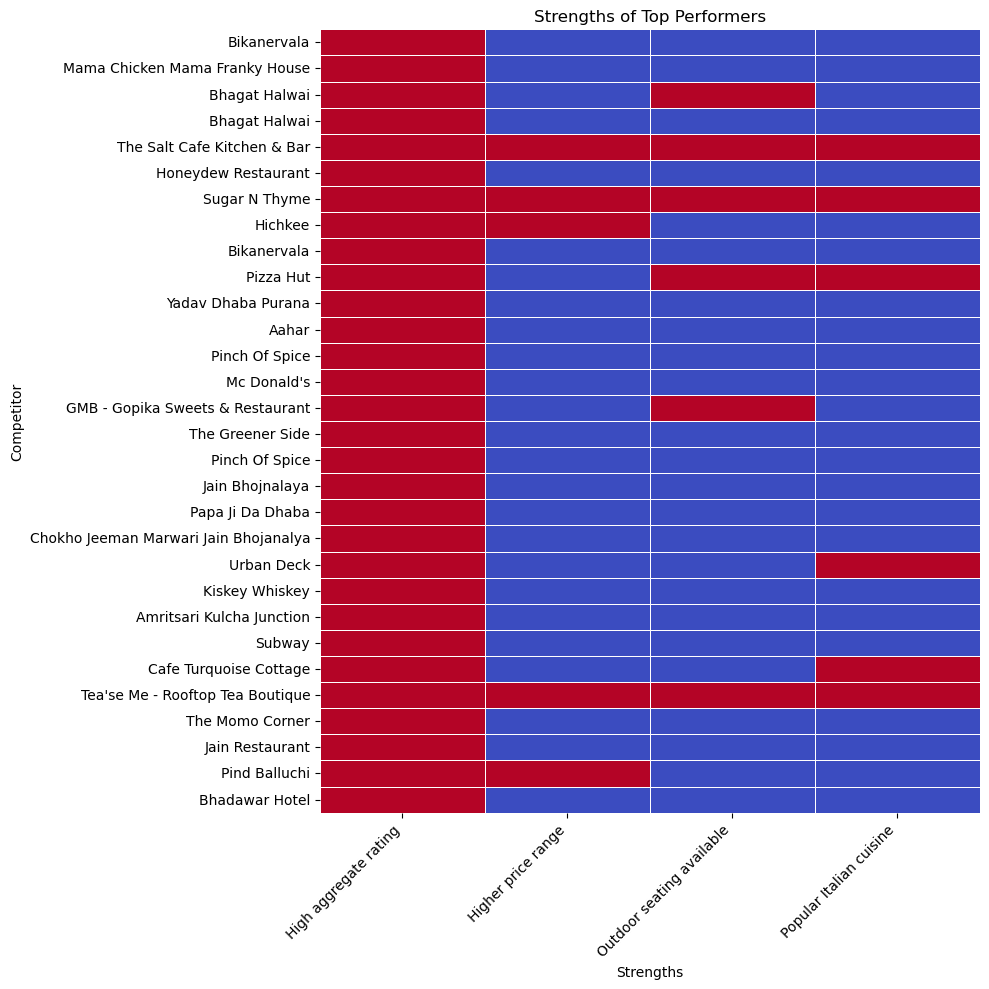

In [104]:
import seaborn as sns

# Create a matrix indicating the presence of strengths for each competitor
strengths_matrix = top_performers['Strengths'].str.get_dummies(sep=', ')
strengths_matrix['Competitor'] = top_performers['name']
strengths_matrix.set_index('Competitor', inplace=True)

# Plot the heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(strengths_matrix, cmap='coolwarm', cbar=False, linewidths=0.5)
plt.title('Strengths of Top Performers')
plt.xlabel('Strengths')
plt.ylabel('Competitor')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


# Market Gap Analysis:

In [113]:
# Define a threshold for underrepresentation
cuisine_threshold = 10  # For example, if a cuisine appears less than 10 times, consider it underrepresented

# Analyze cuisines
cuisine_counts = df['cuisines'].str.split(', ').explode().value_counts()
underrepresented_cuisines = cuisine_counts[cuisine_counts < cuisine_threshold]


# Convert underrepresented cuisines and price ranges to DataFrames
underrepresented_cuisines_df = underrepresented_cuisines.reset_index().rename(columns={'index': 'Cuisine', 0: 'Count'})

# Display the DataFrames
print("Underrepresented Cuisines:")
print(underrepresented_cuisines_df.to_string(index=False))


Underrepresented Cuisines:
         cuisines  count
         Armenian      9
            Grill      9
   South American      7
           Panini      7
       Sri Lankan      7
          Russian      6
        Himachali      6
    Fried Chicken      5
   Coffee and Tea      5
         Oriental      4
        Brazilian      4
        Cafe Food      4
           Crepes      3
          Afghani      3
          Falafel      3
        Pakistani      3
         Peruvian      2
Modern Australian      2
            Bohri      2
           Fusion      2
          African      2
            Irish      2
        Pan Asian      2
             Cake      2
         Garhwali      2
    International      1
          Swedish      1
            Vegan      1
            Mandi      1



Knowing which cuisines are not widely represented can help restaurants adjust their menus to better suit specific dietary preferences, cultural backgrounds, or emerging food trends.

Analysis of Dining Establishment Distribution Across Regions:

In [130]:
from tabulate import tabulate

# Group the dataset by region or city
region_groups = df.groupby('city')

# Calculate the count of restaurants in each region
restaurant_counts = region_groups.size().reset_index(name='restaurant_count')

# Optionally, filter the data to focus on specific types of establishments
# For example, to count cafes:
# cafe_counts = df[df['establishment'] == 'Café'].groupby('city').size().reset_index(name='cafe_count')


# Convert restaurant counts dataframe to a table
table = tabulate(restaurant_counts, headers='keys', tablefmt='grid')

# Print the table
print(table)


# Print the counts of restaurants in each region
print(restaurant_counts)


+----+---------------+--------------------+
|    | city          |   restaurant_count |
+====+===============+====================+
|  0 | Agra          |                892 |
+----+---------------+--------------------+
|  1 | Ahmedabad     |               1329 |
+----+---------------+--------------------+
|  2 | Ajmer         |                470 |
+----+---------------+--------------------+
|  3 | Alappuzha     |                267 |
+----+---------------+--------------------+
|  4 | Allahabad     |                567 |
+----+---------------+--------------------+
|  5 | Amravati      |                440 |
+----+---------------+--------------------+
|  6 | Amritsar      |                692 |
+----+---------------+--------------------+
|  7 | Aurangabad    |                693 |
+----+---------------+--------------------+
|  8 | Bangalore     |               2365 |
+----+---------------+--------------------+
|  9 | Bhopal        |                971 |
+----+---------------+----------

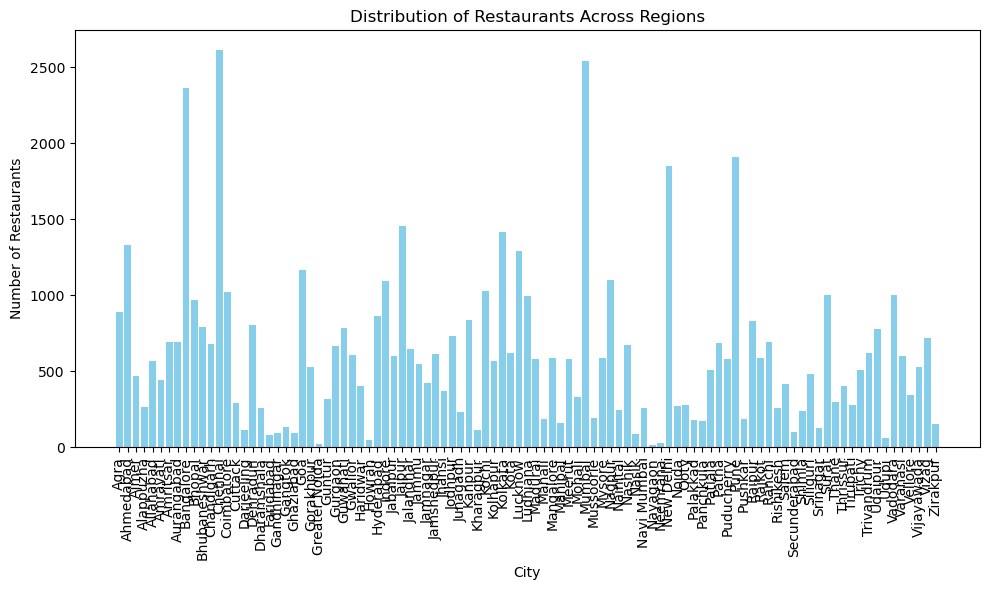

In [131]:
import matplotlib.pyplot as plt

# Plot the distribution of restaurants across regions
plt.figure(figsize=(10, 6))
plt.bar(restaurant_counts['city'], restaurant_counts['restaurant_count'], color='skyblue')
plt.xlabel('City')
plt.ylabel('Number of Restaurants')
plt.title('Distribution of Restaurants Across Regions')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Through this visual representation, we highlighted regions where the density of restaurants was low, indicating potential areas with limited dining options.

This analysis allows business to pinpoint areas where there may be opportunities for expansion or where they can tailor their offerings to meet unmet consumer needs. 